# Diagnosis of Chronic Kidney Disease

 #### 1. Recognizing Variables the In Dataset

age		-	age

bp		-	blood pressure

sg		-	specific gravity (concentration of urine)

al		-   albumin (Albumin is a protein made by your liver. Albumin enters your 
bloodstream and helps keep fluid from leaking out)

su		-	sugar

rbc		-	red blood cells

pc		-	pus cell  (Pus cells are a collection of dead white blood cells )

pcc		-	pus cell clumps ( can cause the urine to look cloudy or as if it contains pus)


ba		-	bacteria

bgr		-	blood glucose random

bu		-	blood urea (Urea nitrogen is a waste product that your kidneys remove from your blood)

sc		-	serum creatinine (Creatinine is a waste product in your blood that comes from your muscles)

sod		-	sodium

pot		-	potassium

hemo	-   hemoglobin    (Hemoglobin is a protein in your red blood cells that 
carries oxygen to your body's organs and tissues)

pcv		-	packed cell volume   (the volume percentage of red blood cells in 

blood, measured as part of a blood test )

wc		-	white blood cell count


rc		-	red blood cell count

htn		-	hypertension (High blood pressure)

dm		-	diabetes mellitus (  group of diseases that affect how the body uses blood sugar (glucose) )

cad		-	coronary artery disease

appet	-	appetite

pe		-	pedal edema (cardinal signs of congestive heart failure)

ane		-	anemia (Anemia is a condition in which you lack enough healthy red 

blood cells to carry adequate oxygen to your tissues)

class	-	class ( ckd & notckd)

In [1]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
%matplotlib inline
# get rid of annoying seaborn and scikit learn errors
def ignore_warn(*args, **kwargs):
    pass
warnings.warn = ignore_warn

In [2]:
#Importing the dataset
df = pd.read_csv('chronic_kidney_disease.csv')
df.head()

age  bp     sg al su     rbc        pc         pcc          ba  bgr  ...  \
0  48  80  1.020  1  0       ?    normal  notpresent  notpresent  121  ...   
1   7  50  1.020  4  0       ?    normal  notpresent  notpresent    ?  ...   
2  62  80  1.010  2  3  normal    normal  notpresent  notpresent  423  ...   
3  48  70  1.005  4  0  normal  abnormal     present  notpresent  117  ...   
4  51  80  1.010  2  0  normal    normal  notpresent  notpresent  106  ...   

  pcv  wbcc rbcc  htn   dm cad appet   pe  ane class  
0  44  7800  5.2  yes  yes  no  good   no   no   ckd  
1  38  6000    ?   no   no  no  good   no   no   ckd  
2  31  7500    ?   no  yes  no  poor   no  yes   ckd  
3  32  6700  3.9  yes   no  no  poor  yes  yes   ckd  
4  35  7300  4.6   no   no  no  good   no   no   ckd  

[5 rows x 25 columns]

In [3]:
#Renaming column names to better understand the data
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']

In [4]:
#shape of the dataset
df.shape

(400, 25)

In [5]:
#Replacing every ?  with NaN to identify rows with null values and to transform the numerical variables
df.replace(to_replace ="?",value =np.nan,inplace=True)

In [6]:
#numerical columns
num_col = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium','potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count']
len(num_col)

14

In [7]:
#transforming necessary columns to numerical type
for i in num_col :
    df[i] = df[i].astype('float64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   age                      391 non-null    float64
 1   blood_pressure           388 non-null    float64
 2   specific_gravity         353 non-null    float64
 3   albumin                  354 non-null    float64
 4   sugar                    351 non-null    float64
 5   red_blood_cells          248 non-null    object 
 6   pus_cell                 335 non-null    object 
 7   pus_cell_clumps          396 non-null    object 
 8   bacteria                 396 non-null    object 
 9   blood_glucose_random     356 non-null    float64
 10  blood_urea               381 non-null    float64
 11  serum_creatinine         383 non-null    float64
 12  sodium                   313 non-null    float64
 13  potassium                312 non-null    float64
 14  haemoglobin              3

In [9]:
df.describe()

age  blood_pressure  specific_gravity     albumin       sugar  \
count  391.000000      388.000000        353.000000  354.000000  351.000000   
mean    51.483376       76.469072          1.017408    1.016949    0.450142   
std     17.169714       13.683637          0.005717    1.352679    1.099191   
min      2.000000       50.000000          1.005000    0.000000    0.000000   
25%     42.000000       70.000000          1.010000    0.000000    0.000000   
50%     55.000000       80.000000          1.020000    0.000000    0.000000   
75%     64.500000       80.000000          1.020000    2.000000    0.000000   
max     90.000000      180.000000          1.025000    5.000000    5.000000   

       blood_glucose_random  blood_urea  serum_creatinine      sodium  \
count            356.000000  381.000000        383.000000  313.000000   
mean             148.036517   57.425722          3.072454  137.528754   
std               79.281714   50.503006          5.741126   10.408752   
min               22.000000    1.500000          0.400000    4.500000   
25%               99.000000   27.000000          0.900000  135.000000   
50%              121.000000   42.000000          1.300000  138.000000   
75%              163.000000   66.000000          2.800000  142.000000   
max              490.000000  391.000000         76.000000  163.000000   

        potassium  haemoglobin  packed_cell_volume  white_blood_cell_count  \
count  312.000000   348.000000          329.000000              294.000000   
mean     4.627244    12.526437           38.884498             8406.122449   
std      3.193904     2.912587            8.990105             2944.474190   
min      2.500000     3.100000            9.000000             2200.000000   
25%      3.800000    10.300000           32.000000             6500.000000   
50%      4.400000    12.650000           40.000000             8000.000000   
75%      4.900000    15.000000           45.000000             9800.000000   
max     47.000000    17.800000           54.000000            26400.000000   

       red_blood_cell_count  
count            269.000000  
mean               4.707435  
std                1.025323  
min                2.100000  
25%                3.900000  
50%                4.800000  
75%                5.400000  
max                8.000000

### 2.Checking for missing Values

In [10]:
#Examining missing values
is_null_values = []
for i in df.columns:
    x = df[i].isnull().sum()
    is_null_values.append(x)
pd.DataFrame(is_null_values,index=df.columns,columns=["Total missing values"])

Total missing values
age                                         9
blood_pressure                             12
specific_gravity                           47
albumin                                    46
sugar                                      49
red_blood_cells                           152
pus_cell                                   65
pus_cell_clumps                             4
bacteria                                    4
blood_glucose_random                       44
blood_urea                                 19
serum_creatinine                           17
sodium                                     87
potassium                                  88
haemoglobin                                52
packed_cell_volume                         71
white_blood_cell_count                    106
red_blood_cell_count                      131
hypertension                                2
diabetes_mellitus                           2
coronary_artery_disease                     2
appetite                                    1
peda_edema                                  1
aanemia                                     1
class                                       0

In [11]:
#Plotting missing values
#import missingno
#missingno.bar(df,color="r")

#### Label Feature 'CLASS'
### Check label inbalance

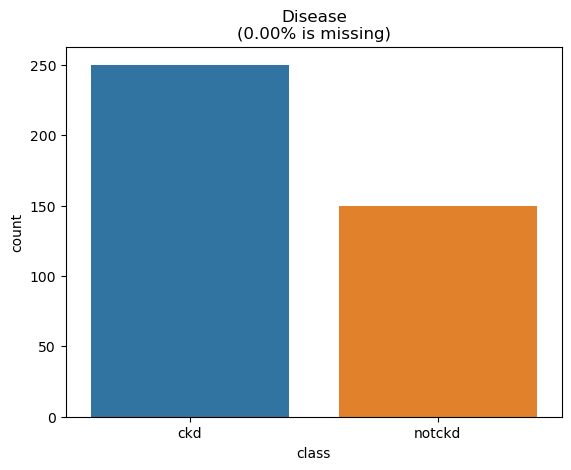

In [12]:
miss_perc="%.2f"%(100*(1-(df['class'].dropna().shape[0])/df.shape[0]))

label="Disease\n(missing:\n{}%)".format(miss_perc)
fig=sns.countplot(x=df['class'],label=label)
plt.title("Disease\n({}% is missing)".format(miss_perc))
plt.show()

In [13]:
#Examining unique values
unique_values = []
for i in df.columns:
    x = df[i].value_counts().count()
    unique_values.append(x)
pd.DataFrame(unique_values,index=df.columns,columns=["Unique values"])

Unique values
age                                 76
blood_pressure                      10
specific_gravity                     5
albumin                              6
sugar                                6
red_blood_cells                      2
pus_cell                             2
pus_cell_clumps                      2
bacteria                             2
blood_glucose_random               146
blood_urea                         118
serum_creatinine                    84
sodium                              34
potassium                           40
haemoglobin                        115
packed_cell_volume                  42
white_blood_cell_count              89
red_blood_cell_count                45
hypertension                         2
diabetes_mellitus                    2
coronary_artery_disease              2
appetite                             2
peda_edema                           2
aanemia                              2
class                                2

### 3. separating numerical and categorical features

In [14]:
numerical_features = list(df.select_dtypes(include=['float64']))
categorical_features = list(df.select_dtypes(exclude=['float64']))

In [15]:
#q1
numerical_features = [x for x in numerical_features  if x not in ['specific_gravity','albumin','sugar']]

In [16]:
#q2
categorical_features.extend(['specific_gravity','albumin','sugar'])

#### Unique variables in the categorical features

In [17]:
for i in categorical_features :
    print(f"unique values in {i} : {df[i].unique()}")

unique values in red_blood_cells : [nan 'normal' 'abnormal']
unique values in pus_cell : ['normal' 'abnormal' nan]
unique values in pus_cell_clumps : ['notpresent' 'present' nan]
unique values in bacteria : ['notpresent' 'present' nan]
unique values in hypertension : ['yes' 'no' nan]
unique values in diabetes_mellitus : ['yes' 'no' nan]
unique values in coronary_artery_disease : ['no' 'yes' nan]
unique values in appetite : ['good' 'poor' nan]
unique values in peda_edema : ['no' 'yes' nan]
unique values in aanemia : ['no' 'yes' nan]
unique values in class : ['ckd' 'notckd']
unique values in specific_gravity : [1.02  1.01  1.005 1.015   nan 1.025]
unique values in albumin : [ 1.  4.  2.  3.  0. nan  5.]
unique values in sugar : [ 0.  3.  4.  1. nan  2.  5.]


## Exploratory Data Analysis (EDA)


### 4.Uni-variate analysis

#### 4.1 distribution of the numerical variables

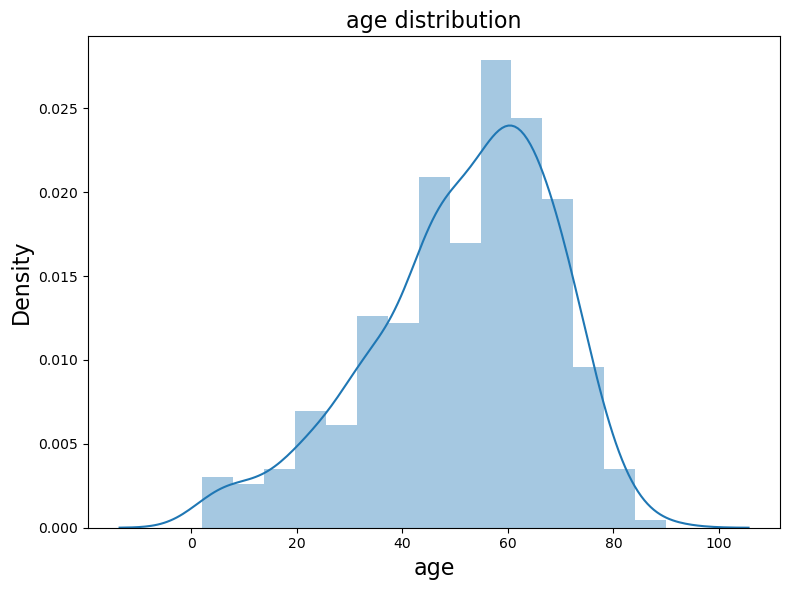

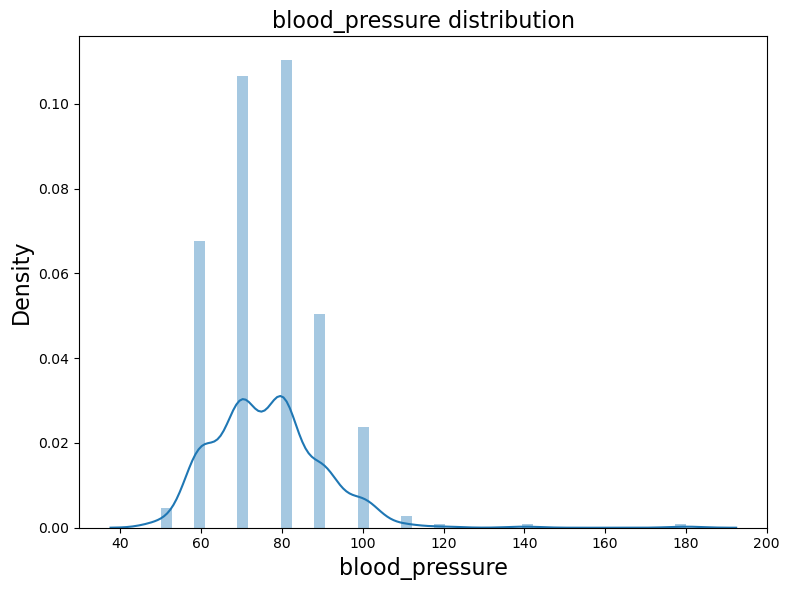

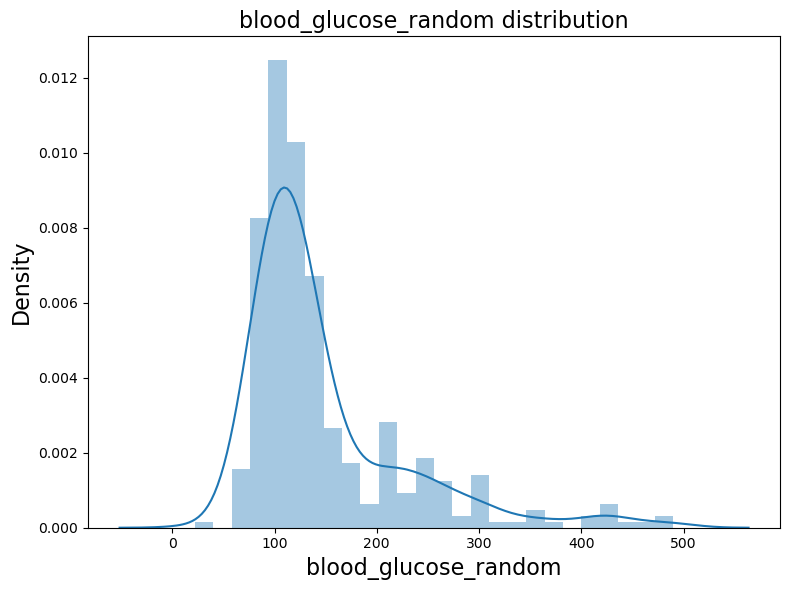

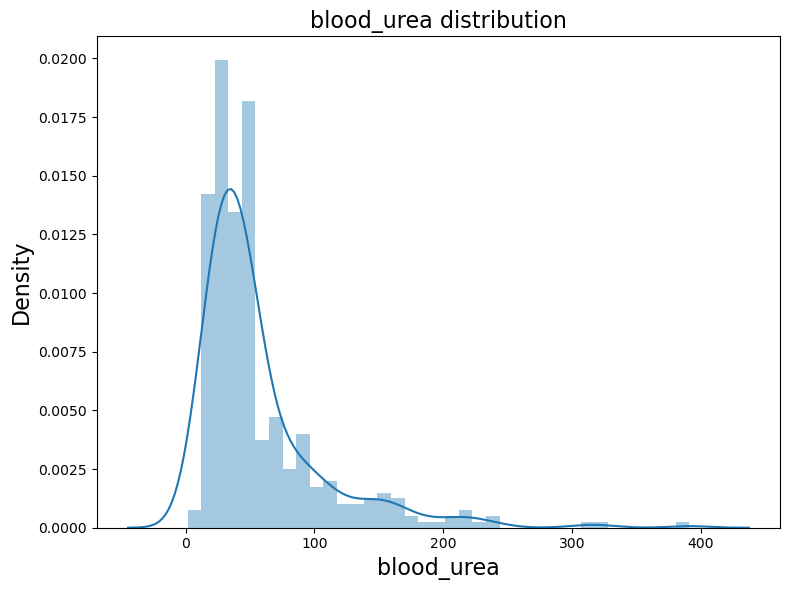

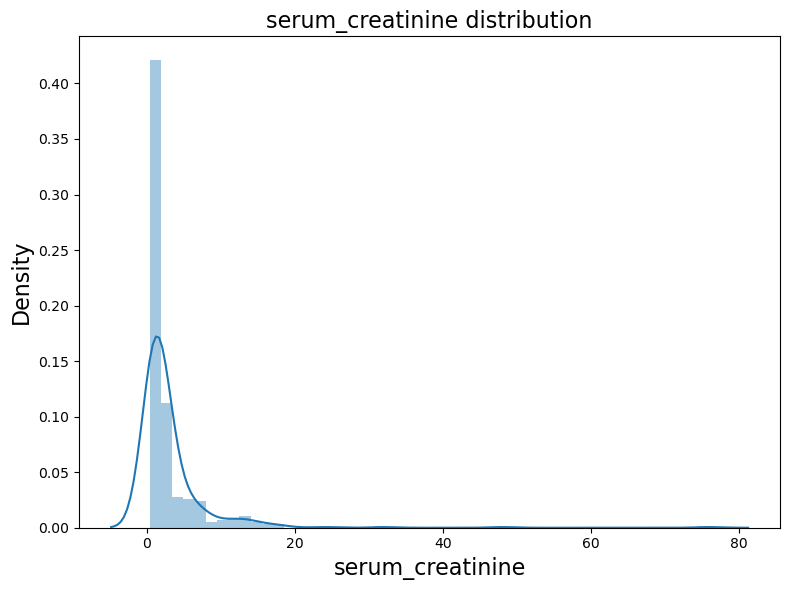

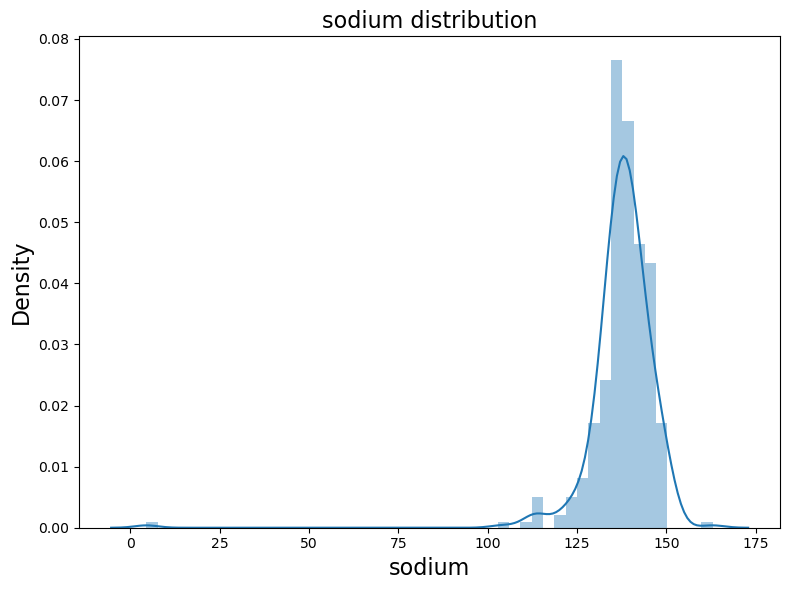

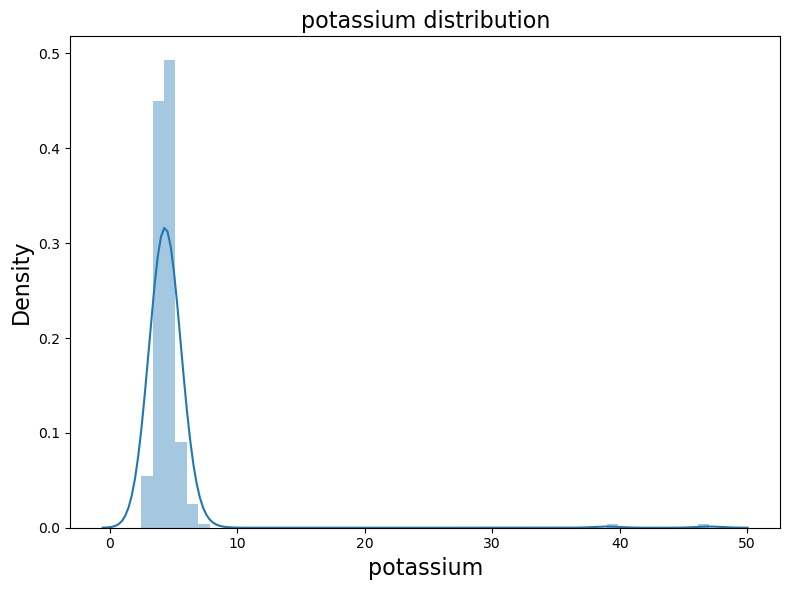

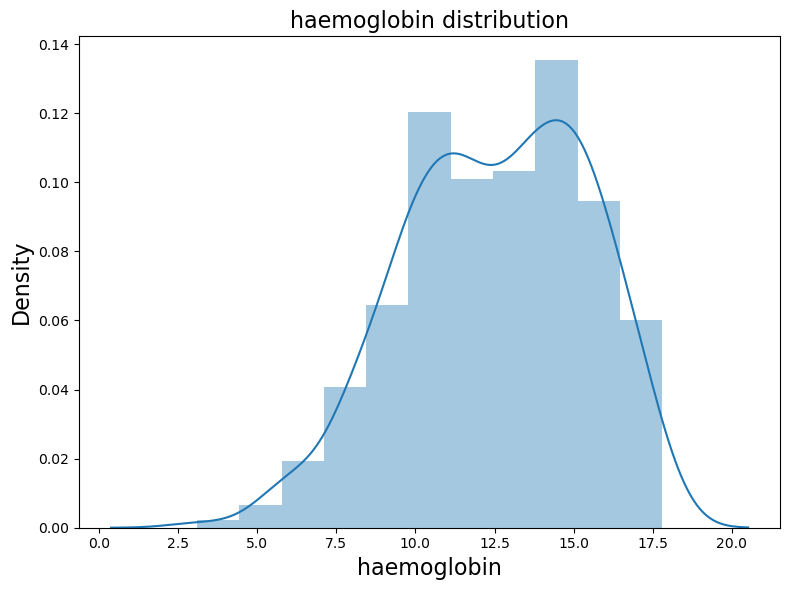

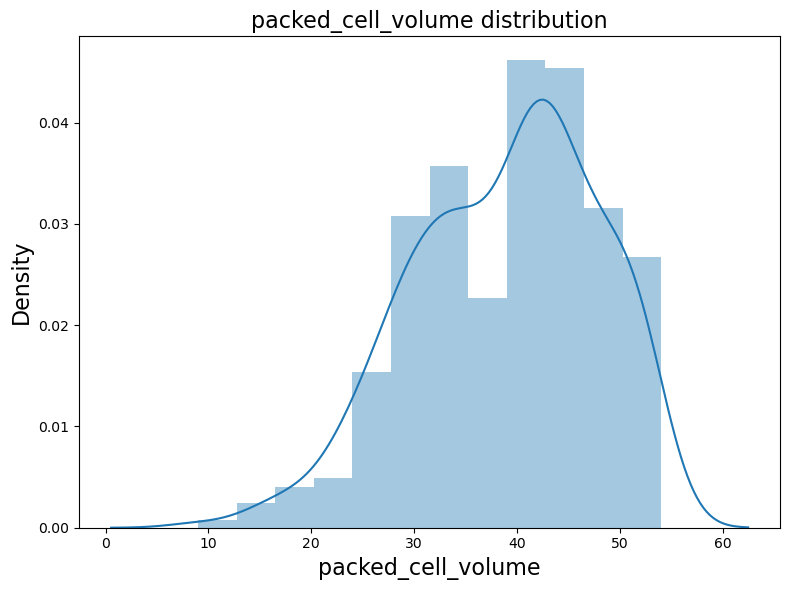

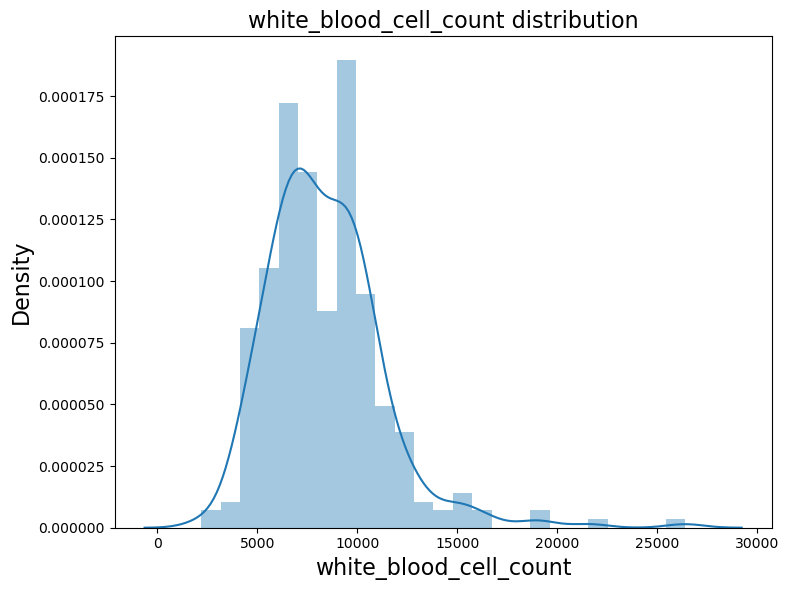

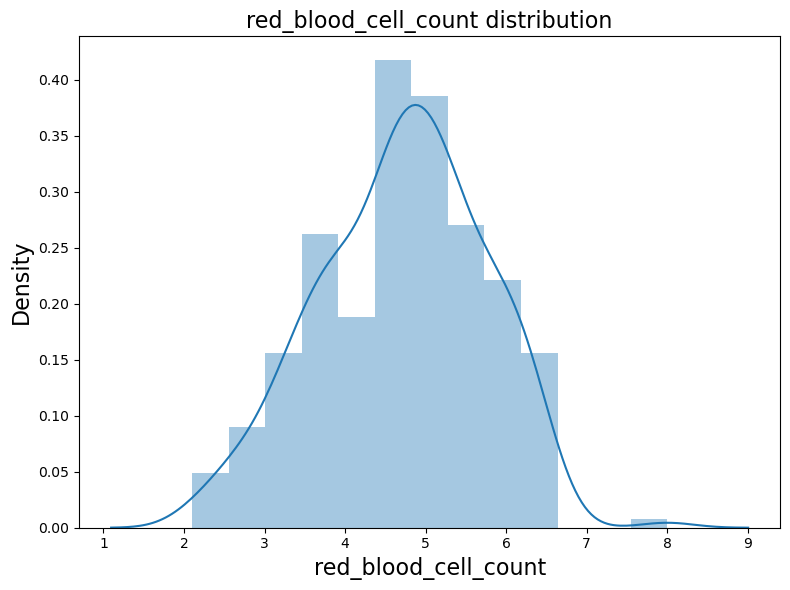

In [18]:
title_font = {"size":16}
for column in numerical_features:
        plt.figure(figsize = (8, 6))
        sns.distplot(df[column])
        plt.xlabel(column,fontdict = title_font)
        plt.ylabel("Density",fontdict = title_font)
        plt.title(column+" distribution",fontdict = title_font)
        plt.tight_layout()
        plt.show()

####  4.2.Frequency of categories in categorical variables

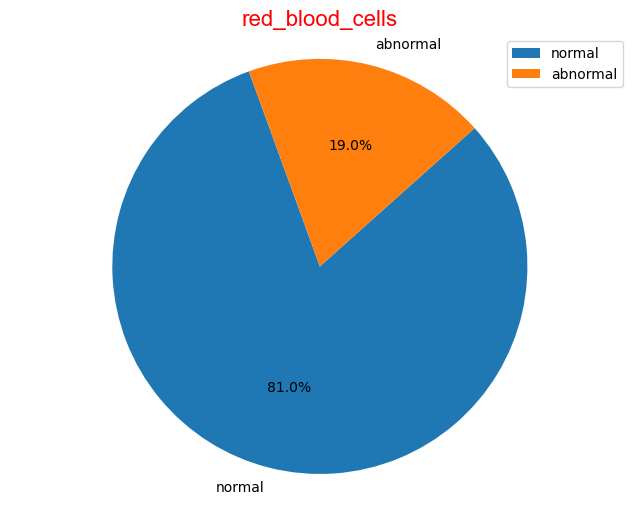

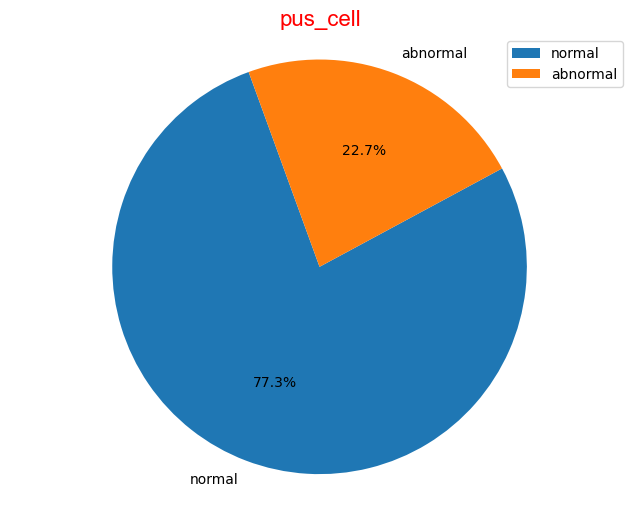

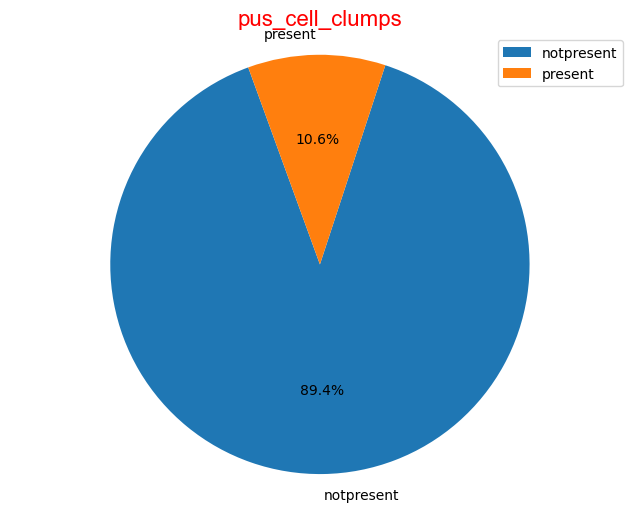

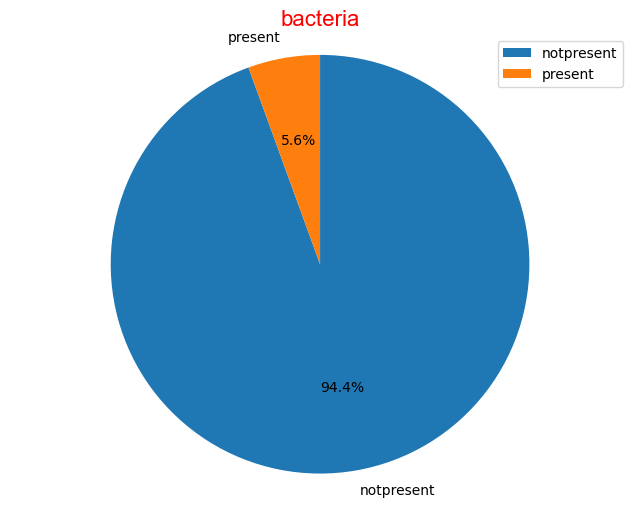

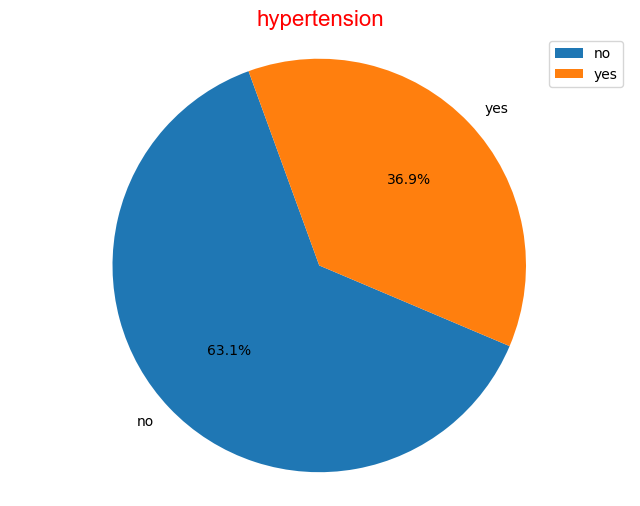

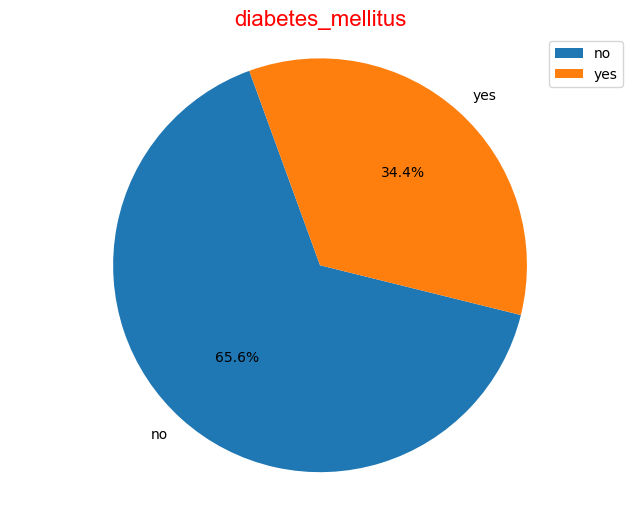

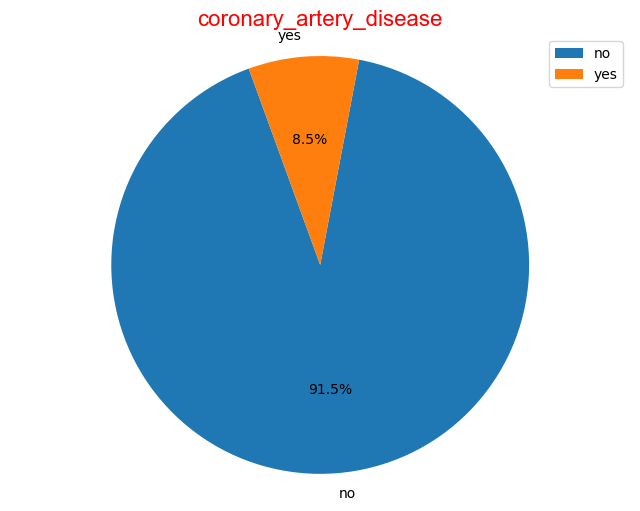

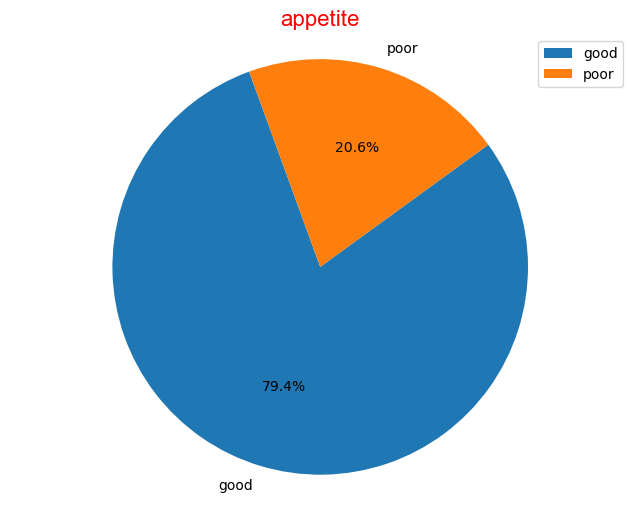

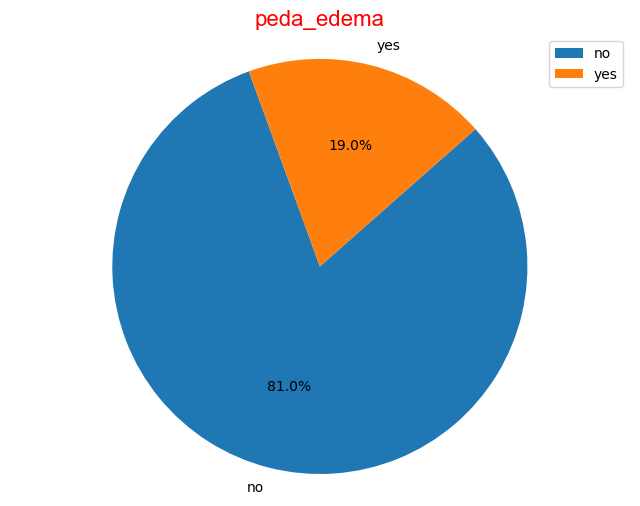

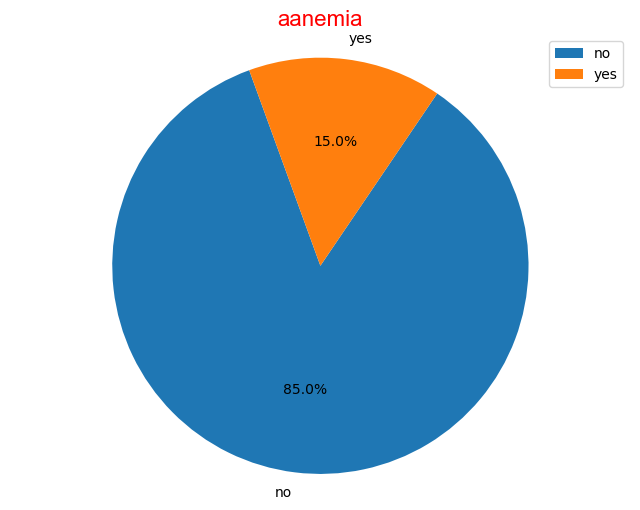

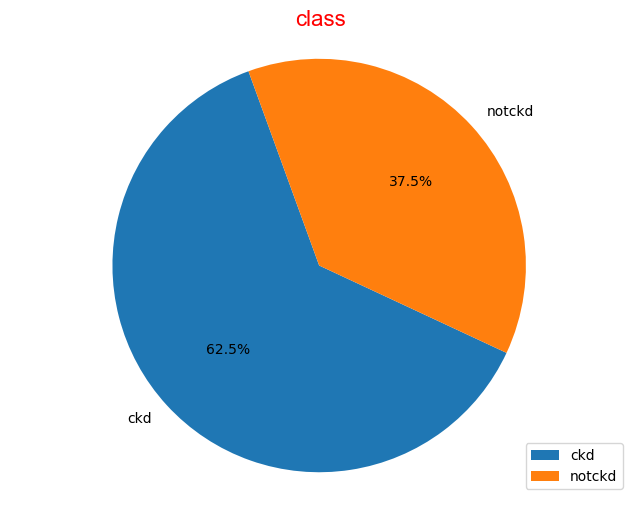

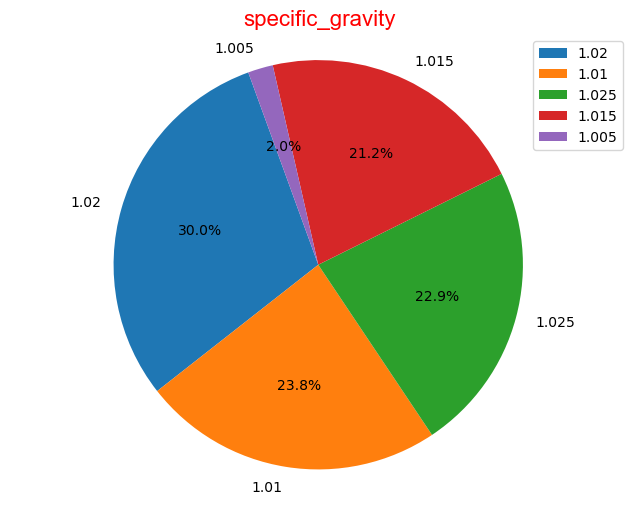

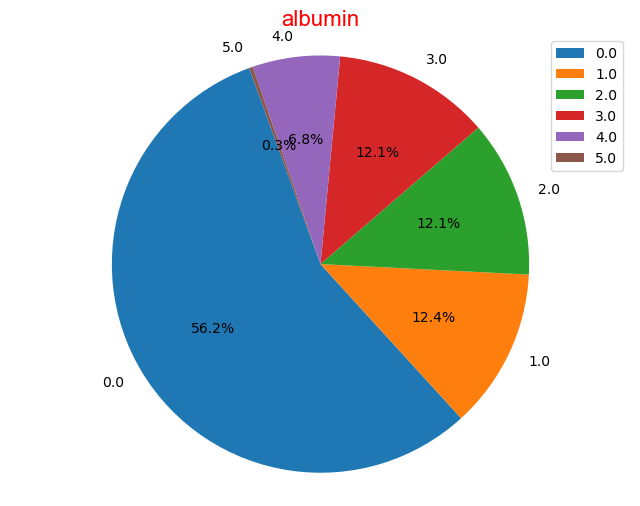

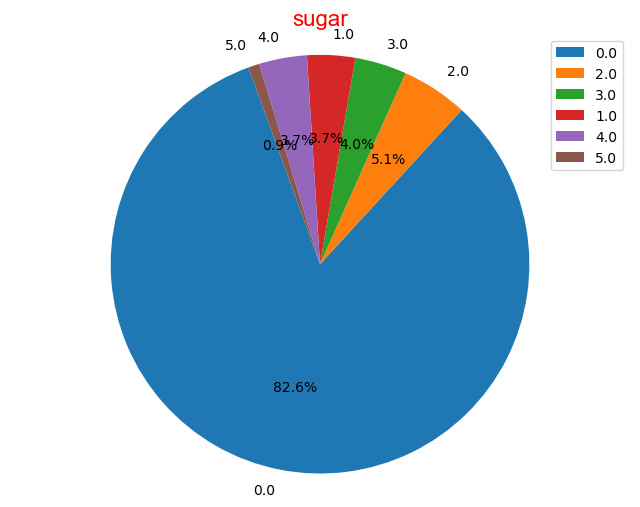

In [19]:
title_font2 = {"family":"arial","color":"red","size":16}
colors = sns.color_palette('bright')
for column in categorical_features:
    fig , ax = plt.subplots(figsize=(8,6))
    observation_values = list(df[column].value_counts().index)
    total_observation_values = list(df[column].value_counts())
    ax.pie(total_observation_values,labels=observation_values,autopct='%1.1f%%',startangle=110,labeldistance=1.1)
    ax.axis("equal")
    plt.title(column,fontdict = title_font2)
    plt.legend()
    plt.show()

## 5. By-Variate Analysis

#### 5.1 Numerical variables - Target variable (Analysis with kdeplot)

In [20]:
n = numerical_features

In [21]:
#adding the class in the n variable for visualization purposes (hue)
n.append("class")

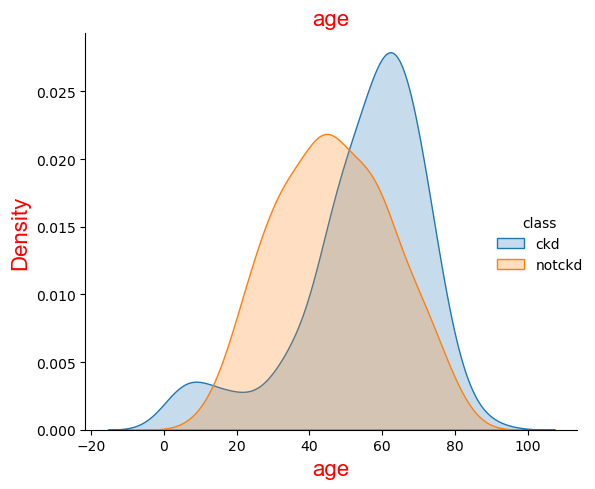

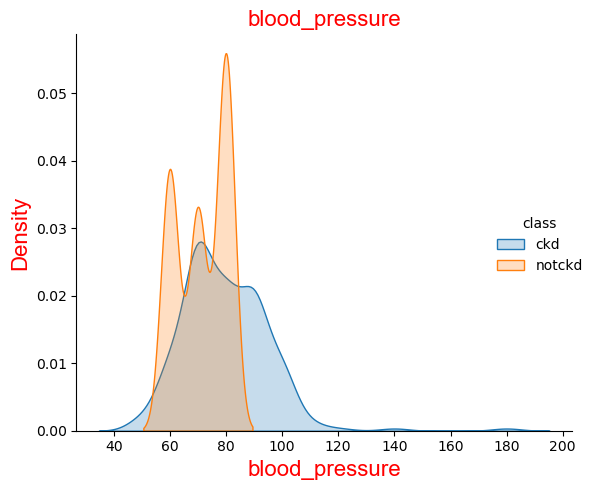

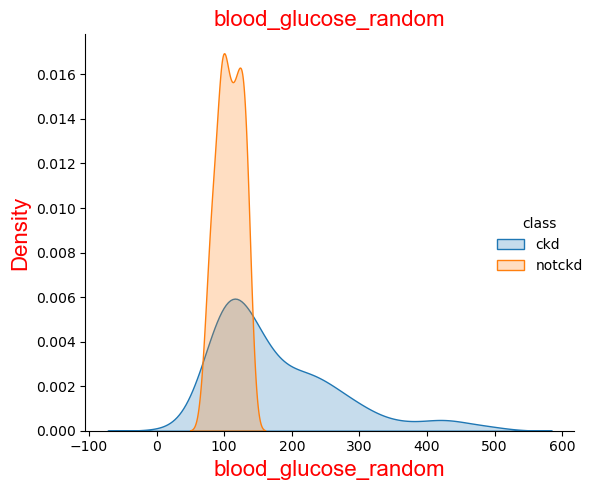

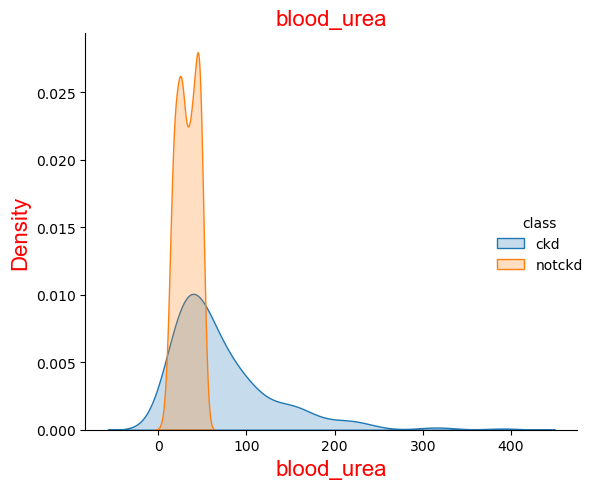

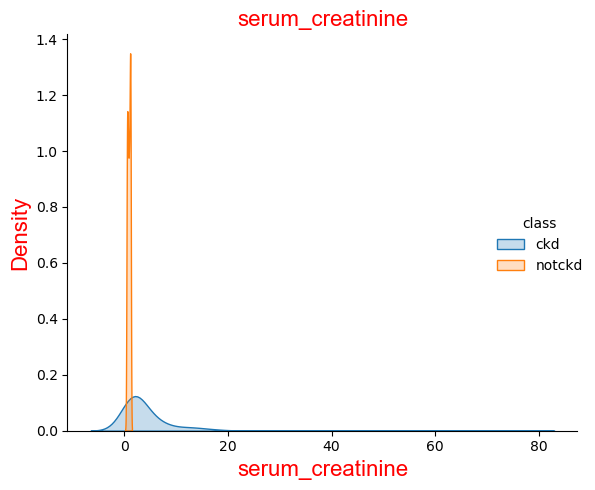

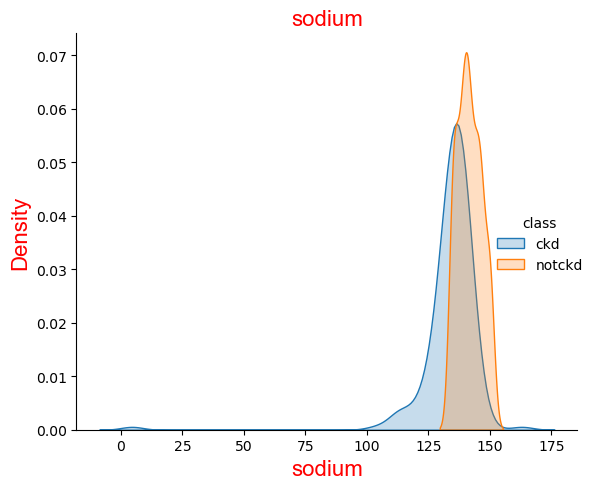

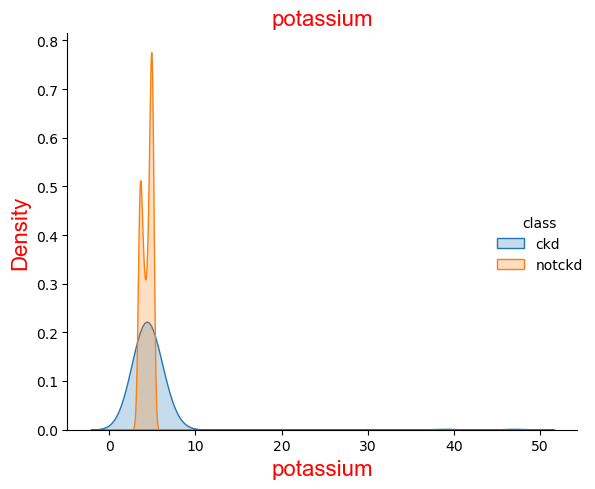

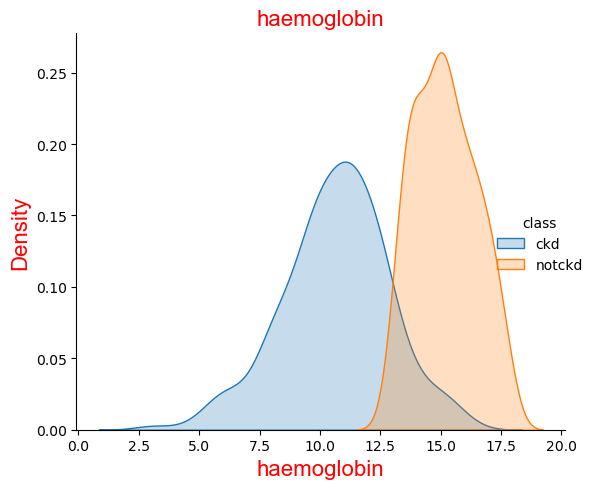

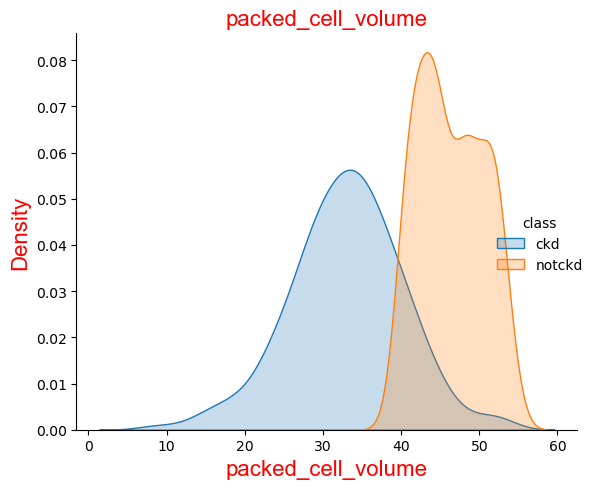

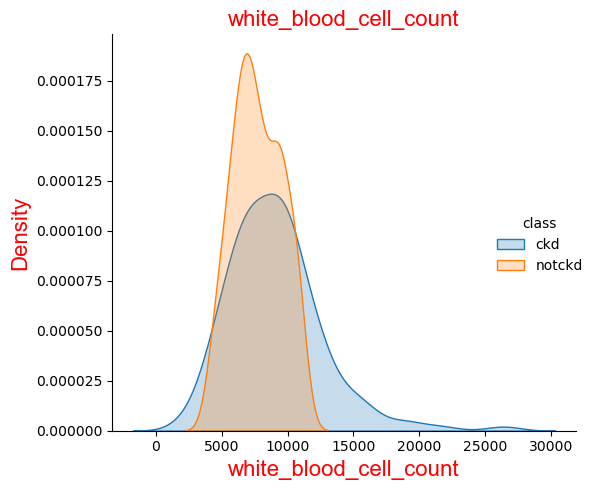

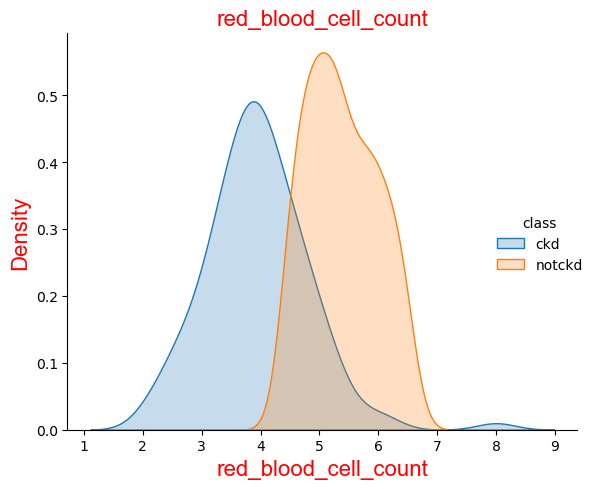

In [22]:
title_font2 = {"family":"arial","color":"red","size":16}
colors = sns.color_palette('bright')
for column in n[:-1]:
    graph = sns.FacetGrid(df[n], hue="class", height=5)
    graph.map(sns.kdeplot,column,shade=True)
    graph.add_legend()
    plt.title(column,fontdict = title_font2)
    plt.ylabel("Density",fontdict=title_font2)
    plt.xlabel(column,fontdict=title_font2)
    plt.tight_layout()
    plt.show()


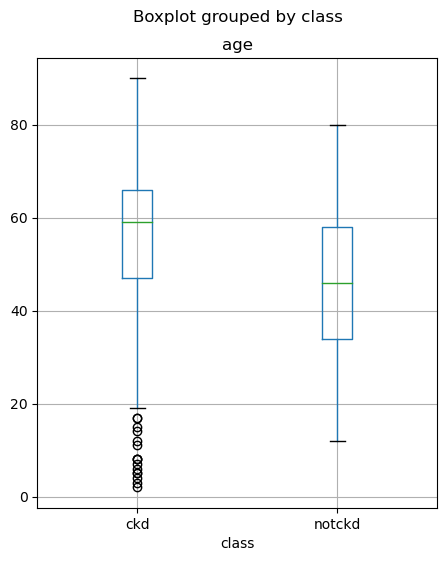

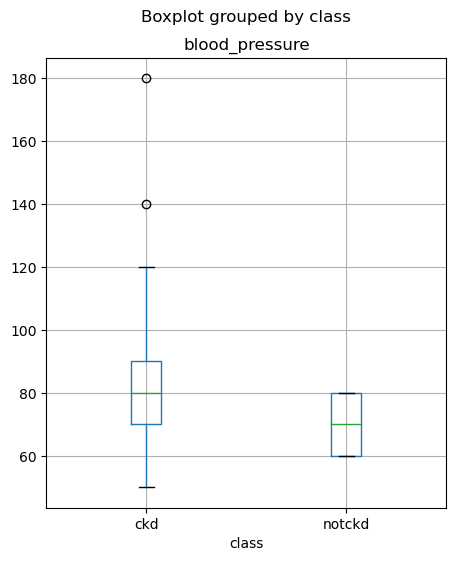

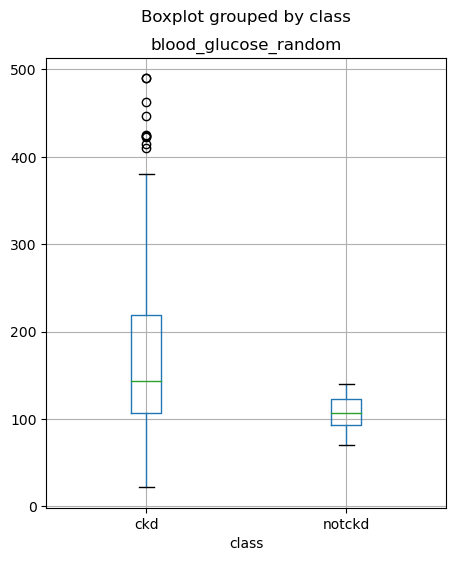

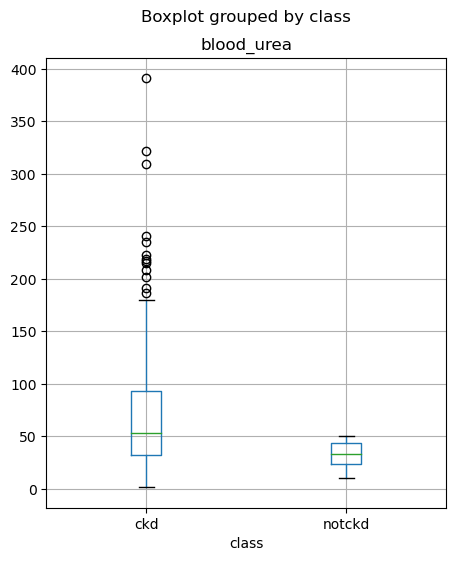

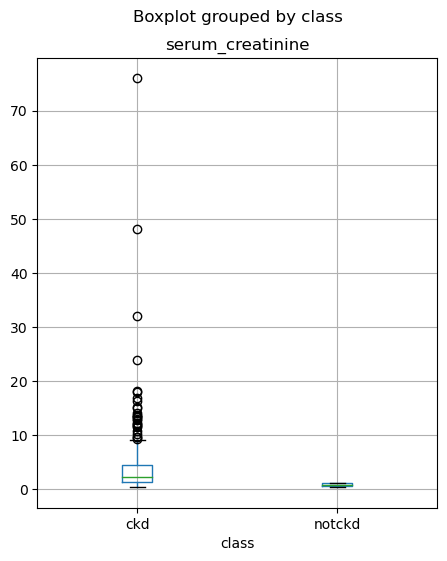

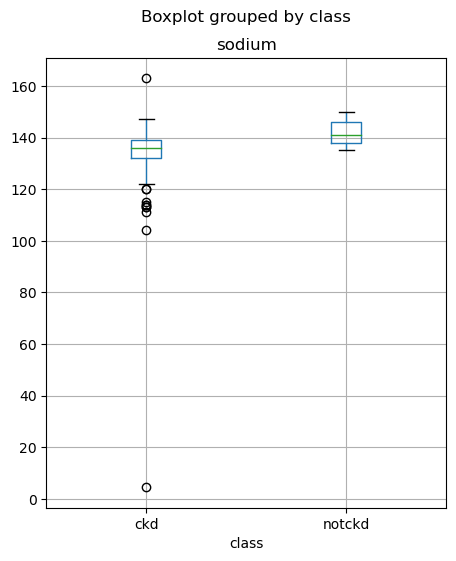

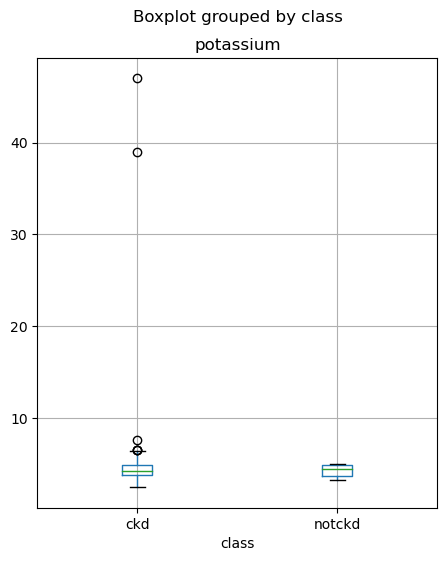

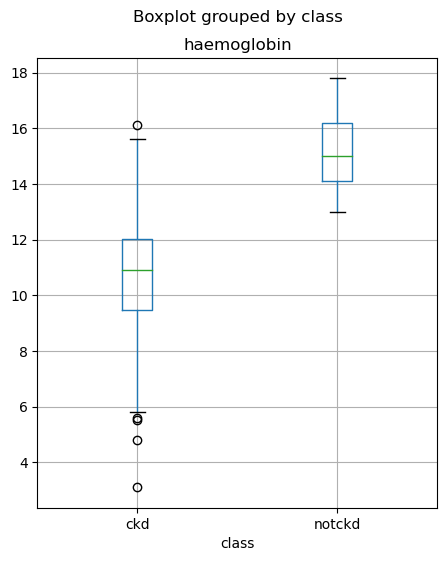

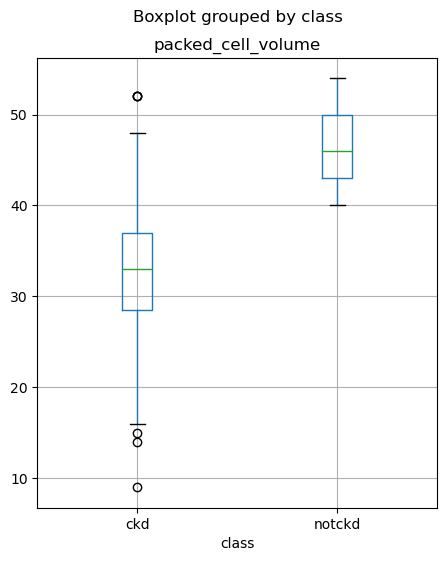

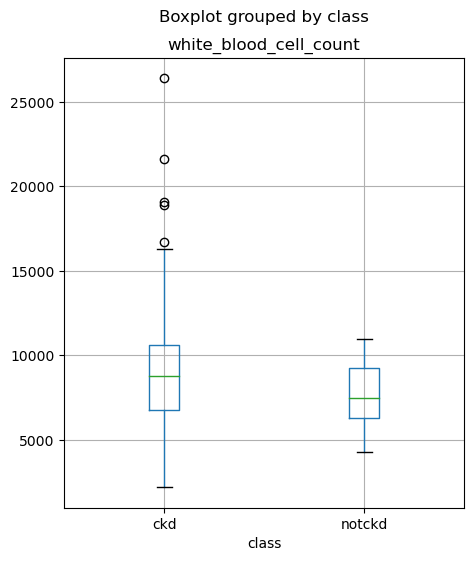

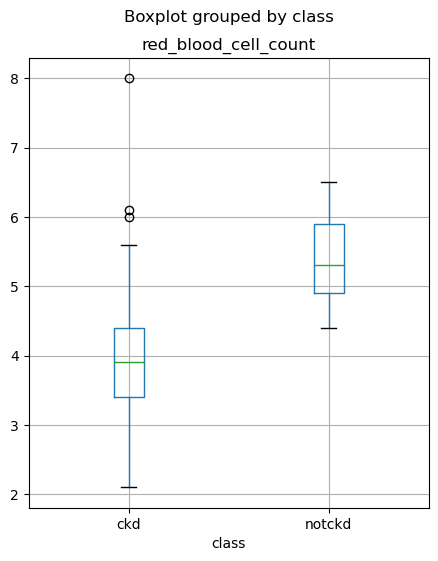

In [23]:
#Relationship between the numeric inependant features and the dependent feature (categorical)
#boxplot
# Generating boxplot for CarPrice Vs FuelType
plotnumber=1
for col in numerical_features:

    if plotnumber <= 11:
        df.boxplot(column=col, by='class', figsize=(5,6))
    plotnumber += 1

### 5.2 Categorical features - Target Variable (Analysis with countplot)

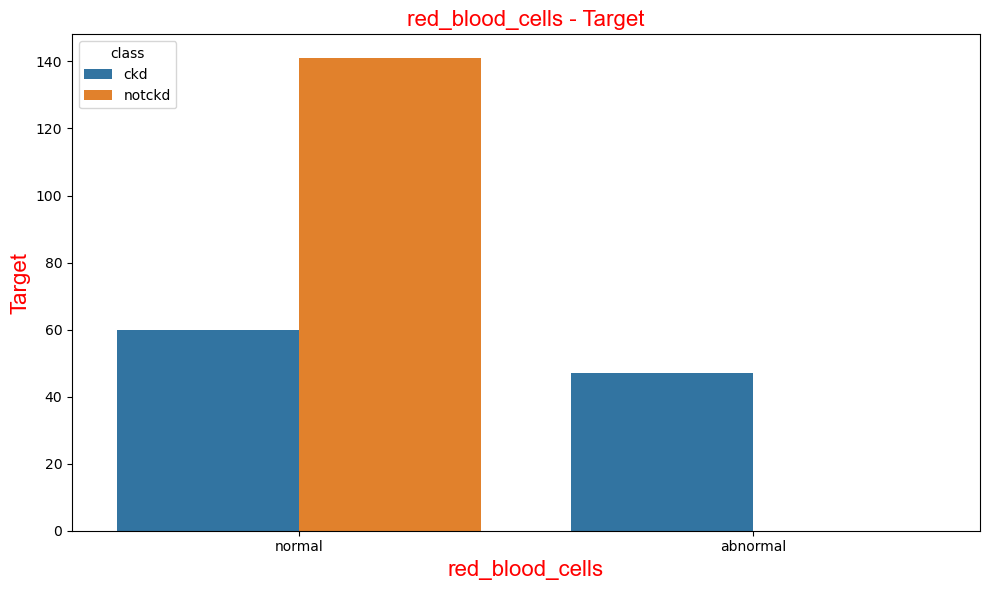

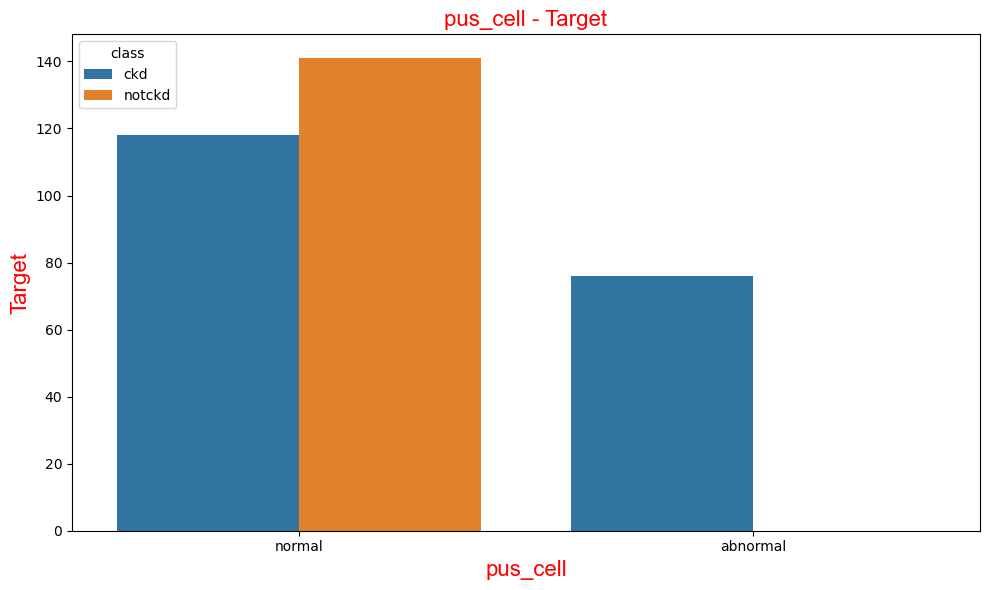

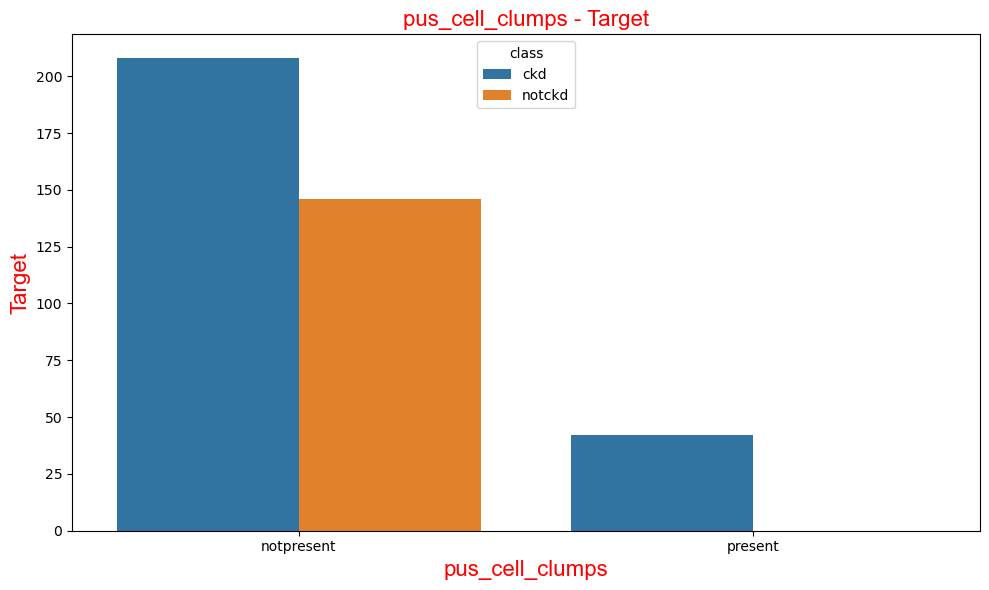

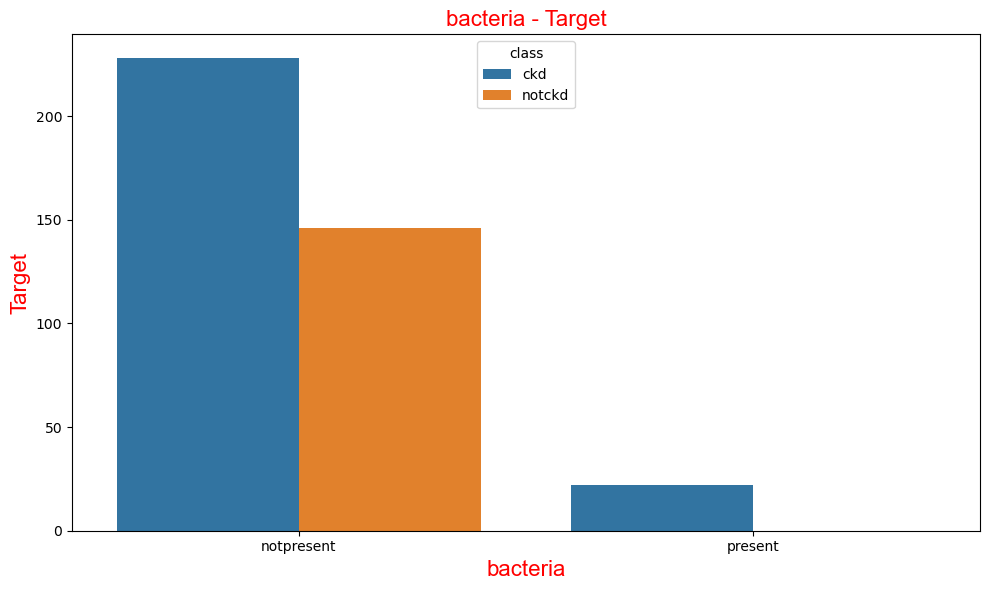

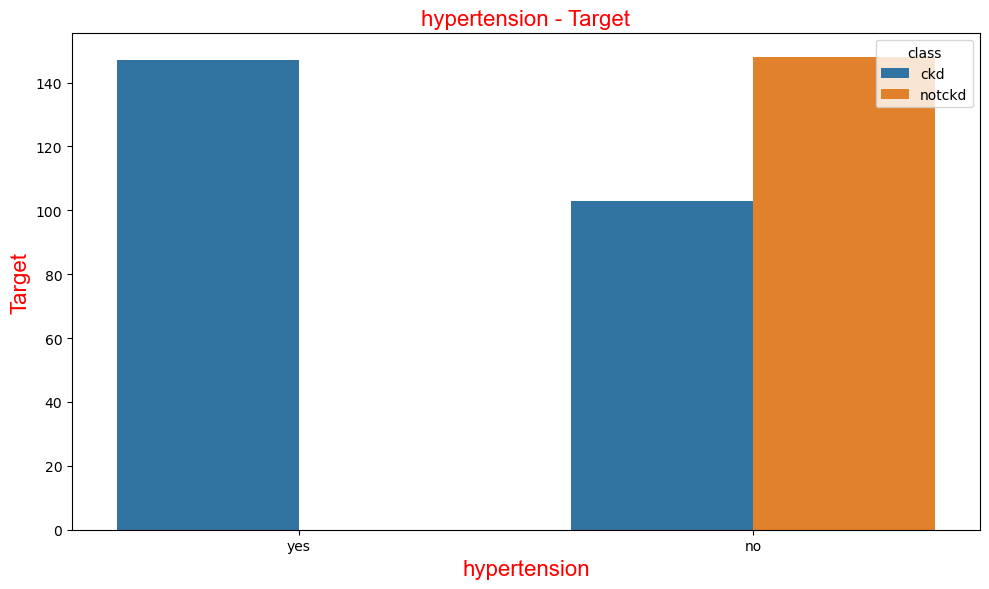

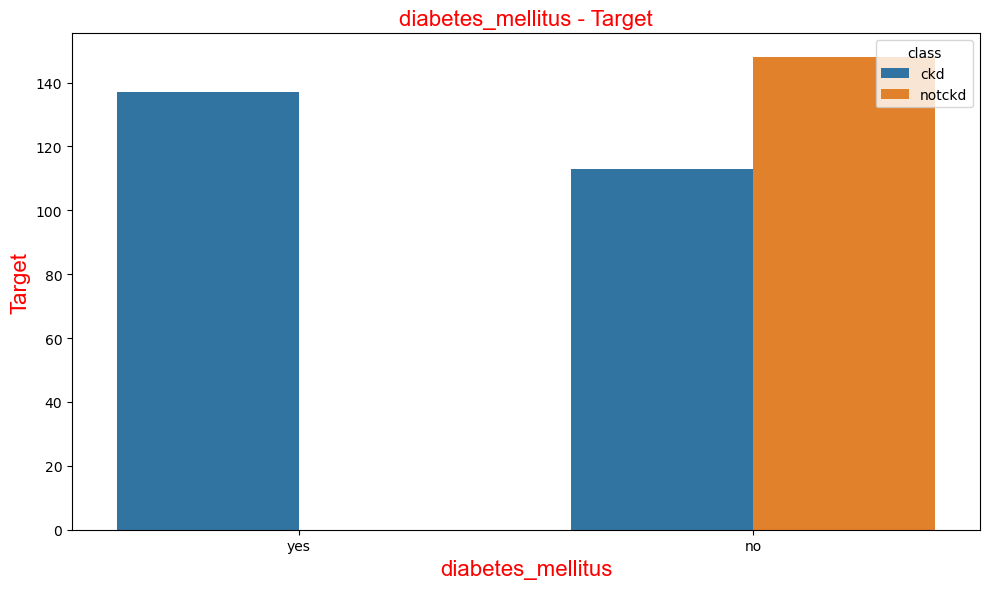

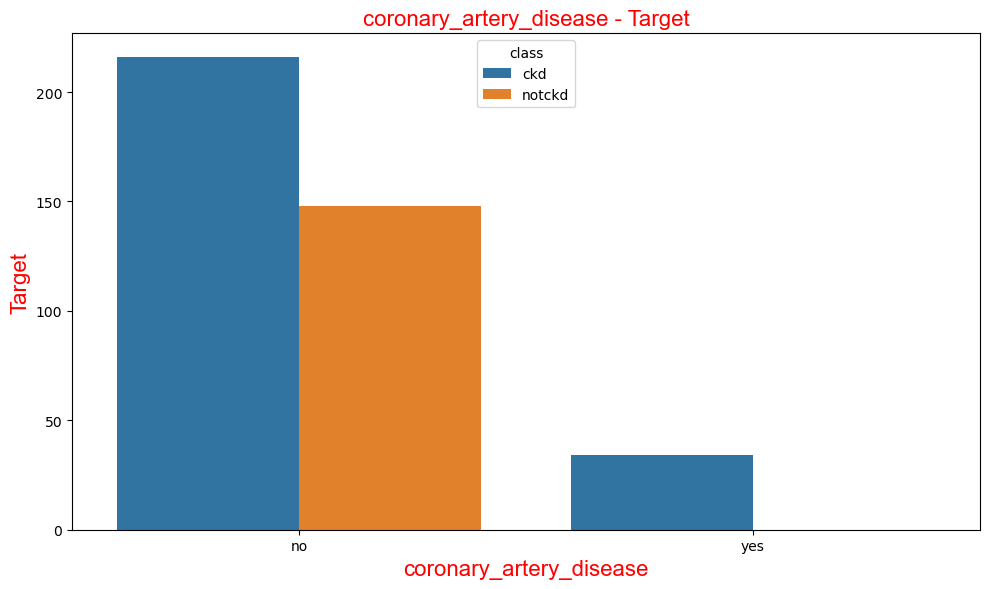

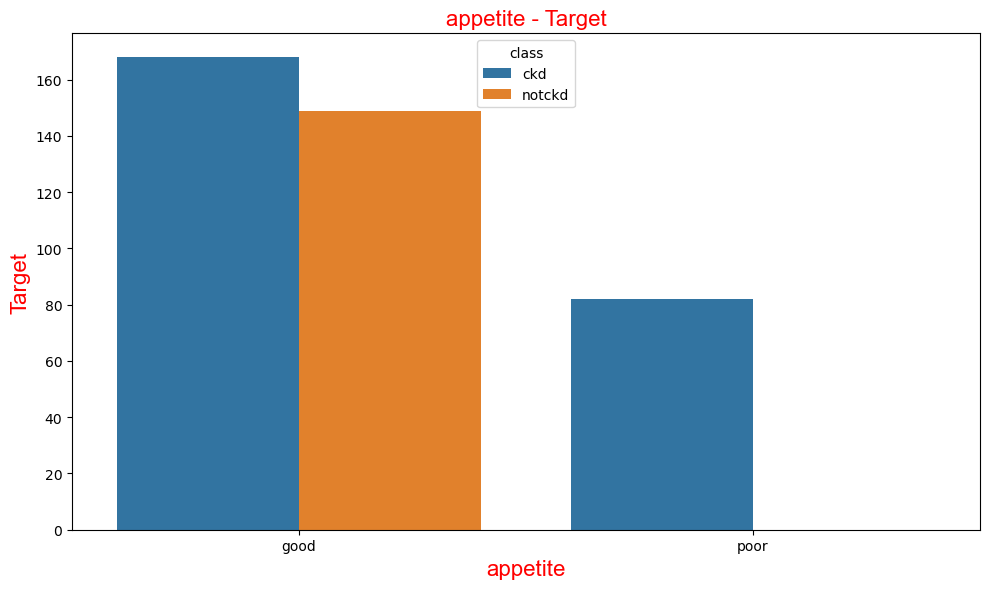

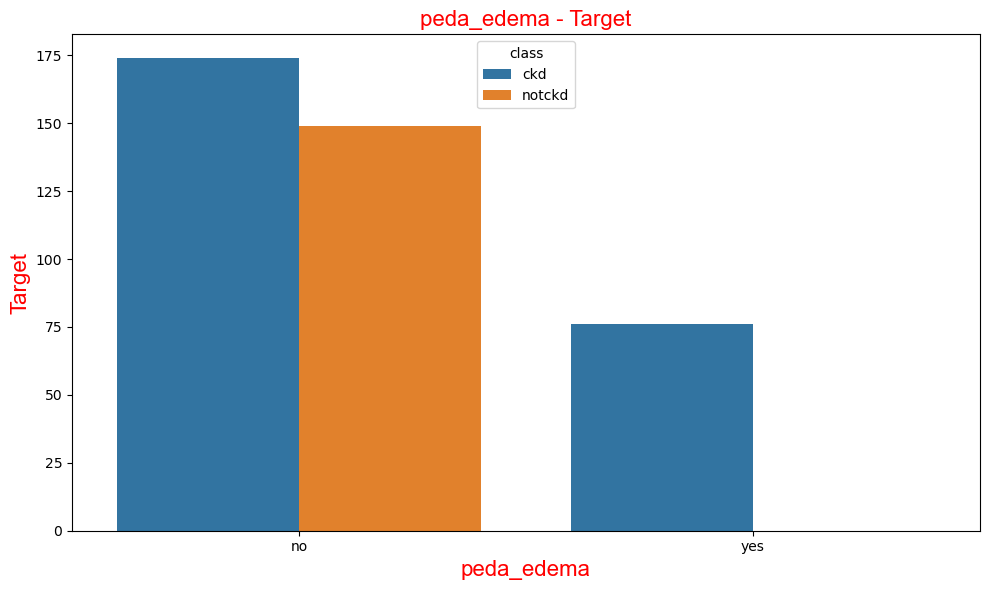

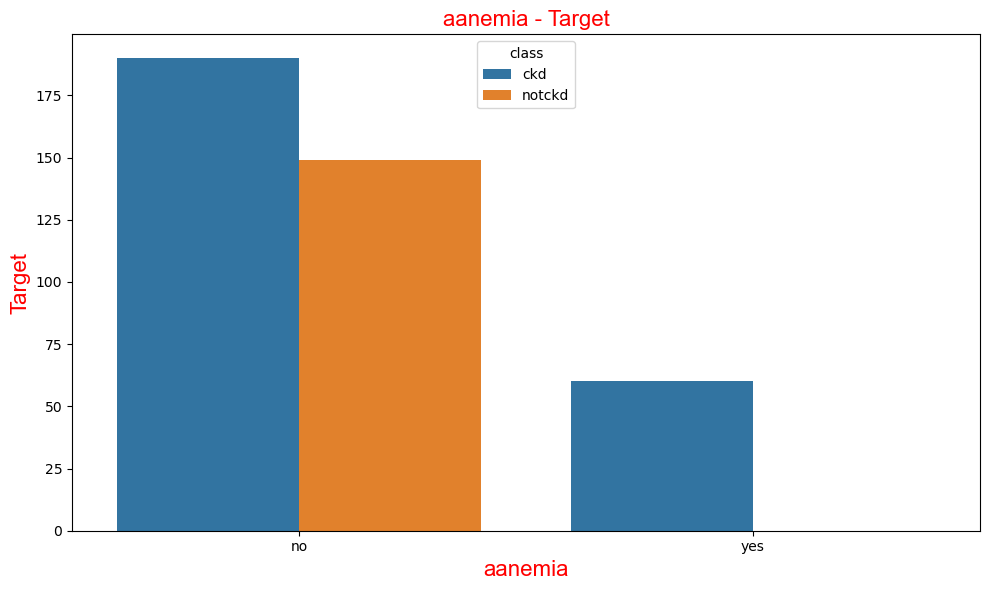

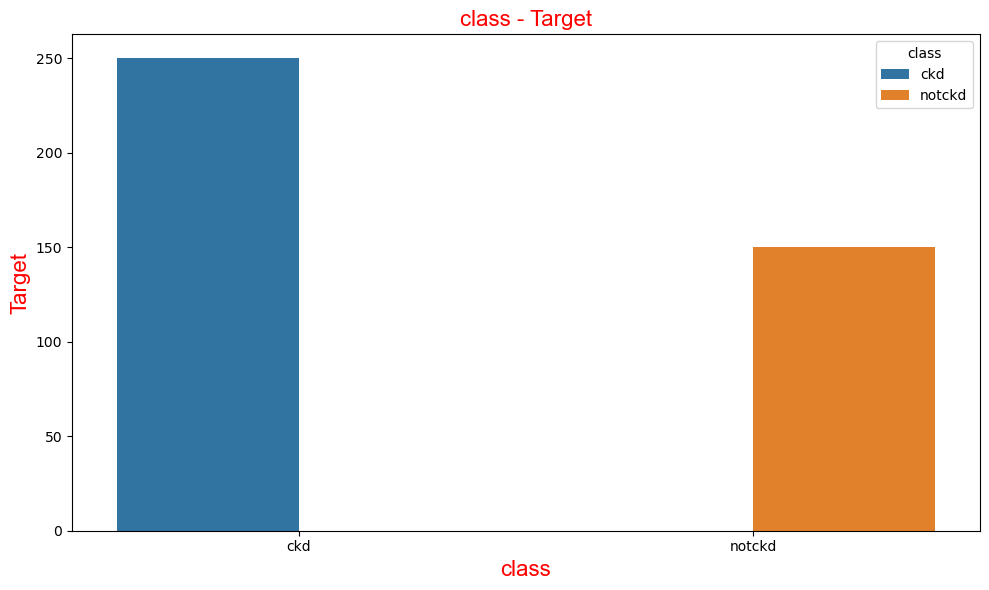

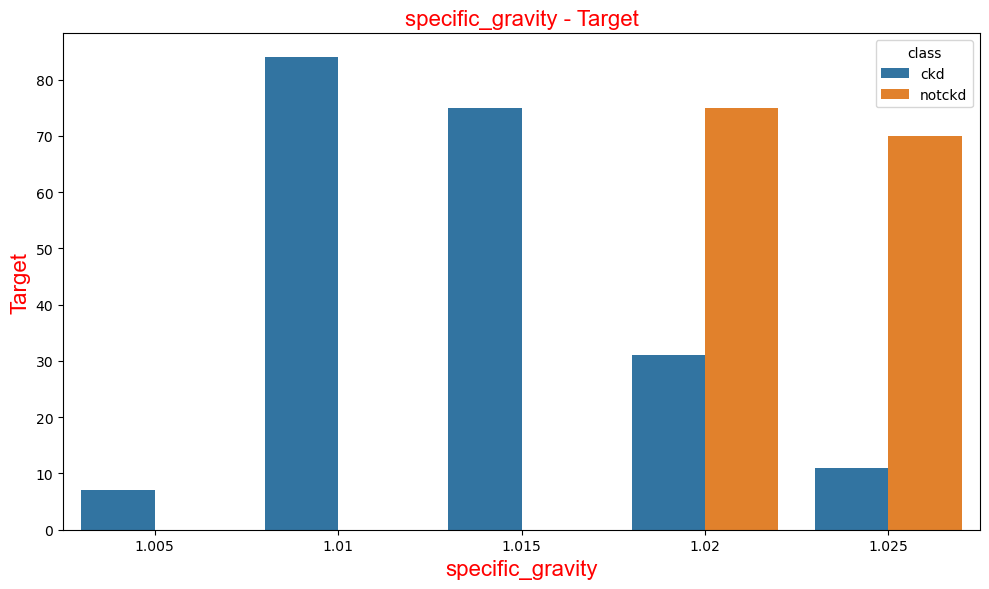

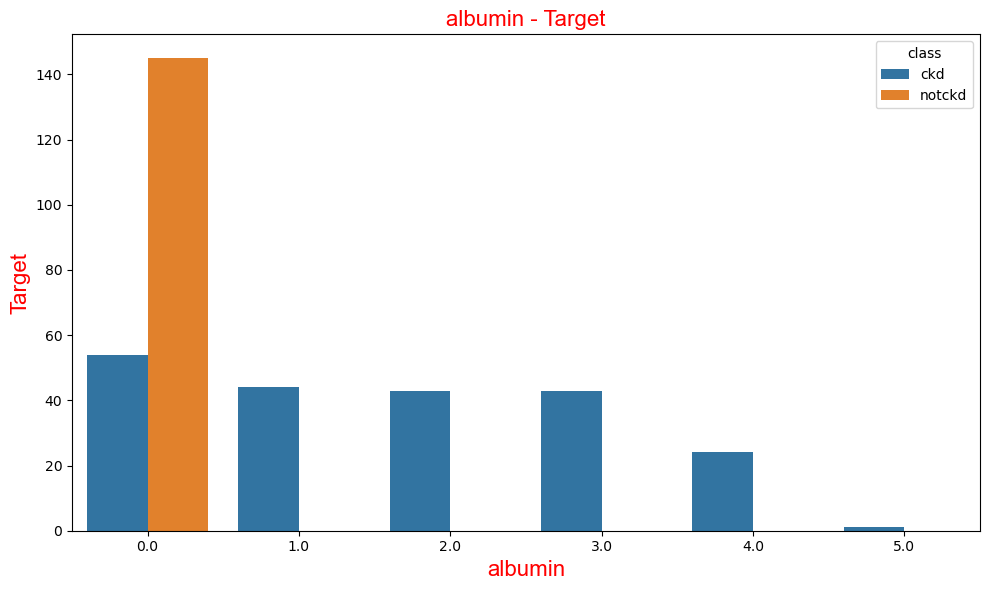

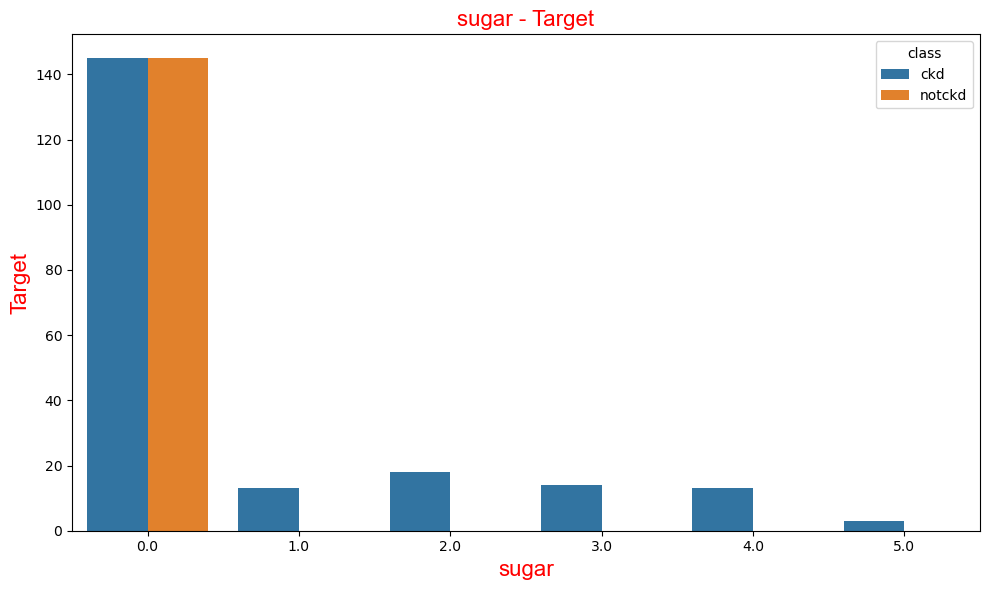

In [24]:
fotitle_font2 = {"family":"arial","color":"red","size":16}
colors = sns.color_palette('bright')
for column in categorical_features:
    plt.figure(figsize=(10,6))
    sns.countplot(column, data =df[categorical_features],hue="class")
    plt.title(column + " - Target",fontdict = title_font2)
    plt.ylabel("Target",fontdict=title_font2)
    plt.xlabel(column,fontdict=title_font2)
    plt.tight_layout()
    plt.show()


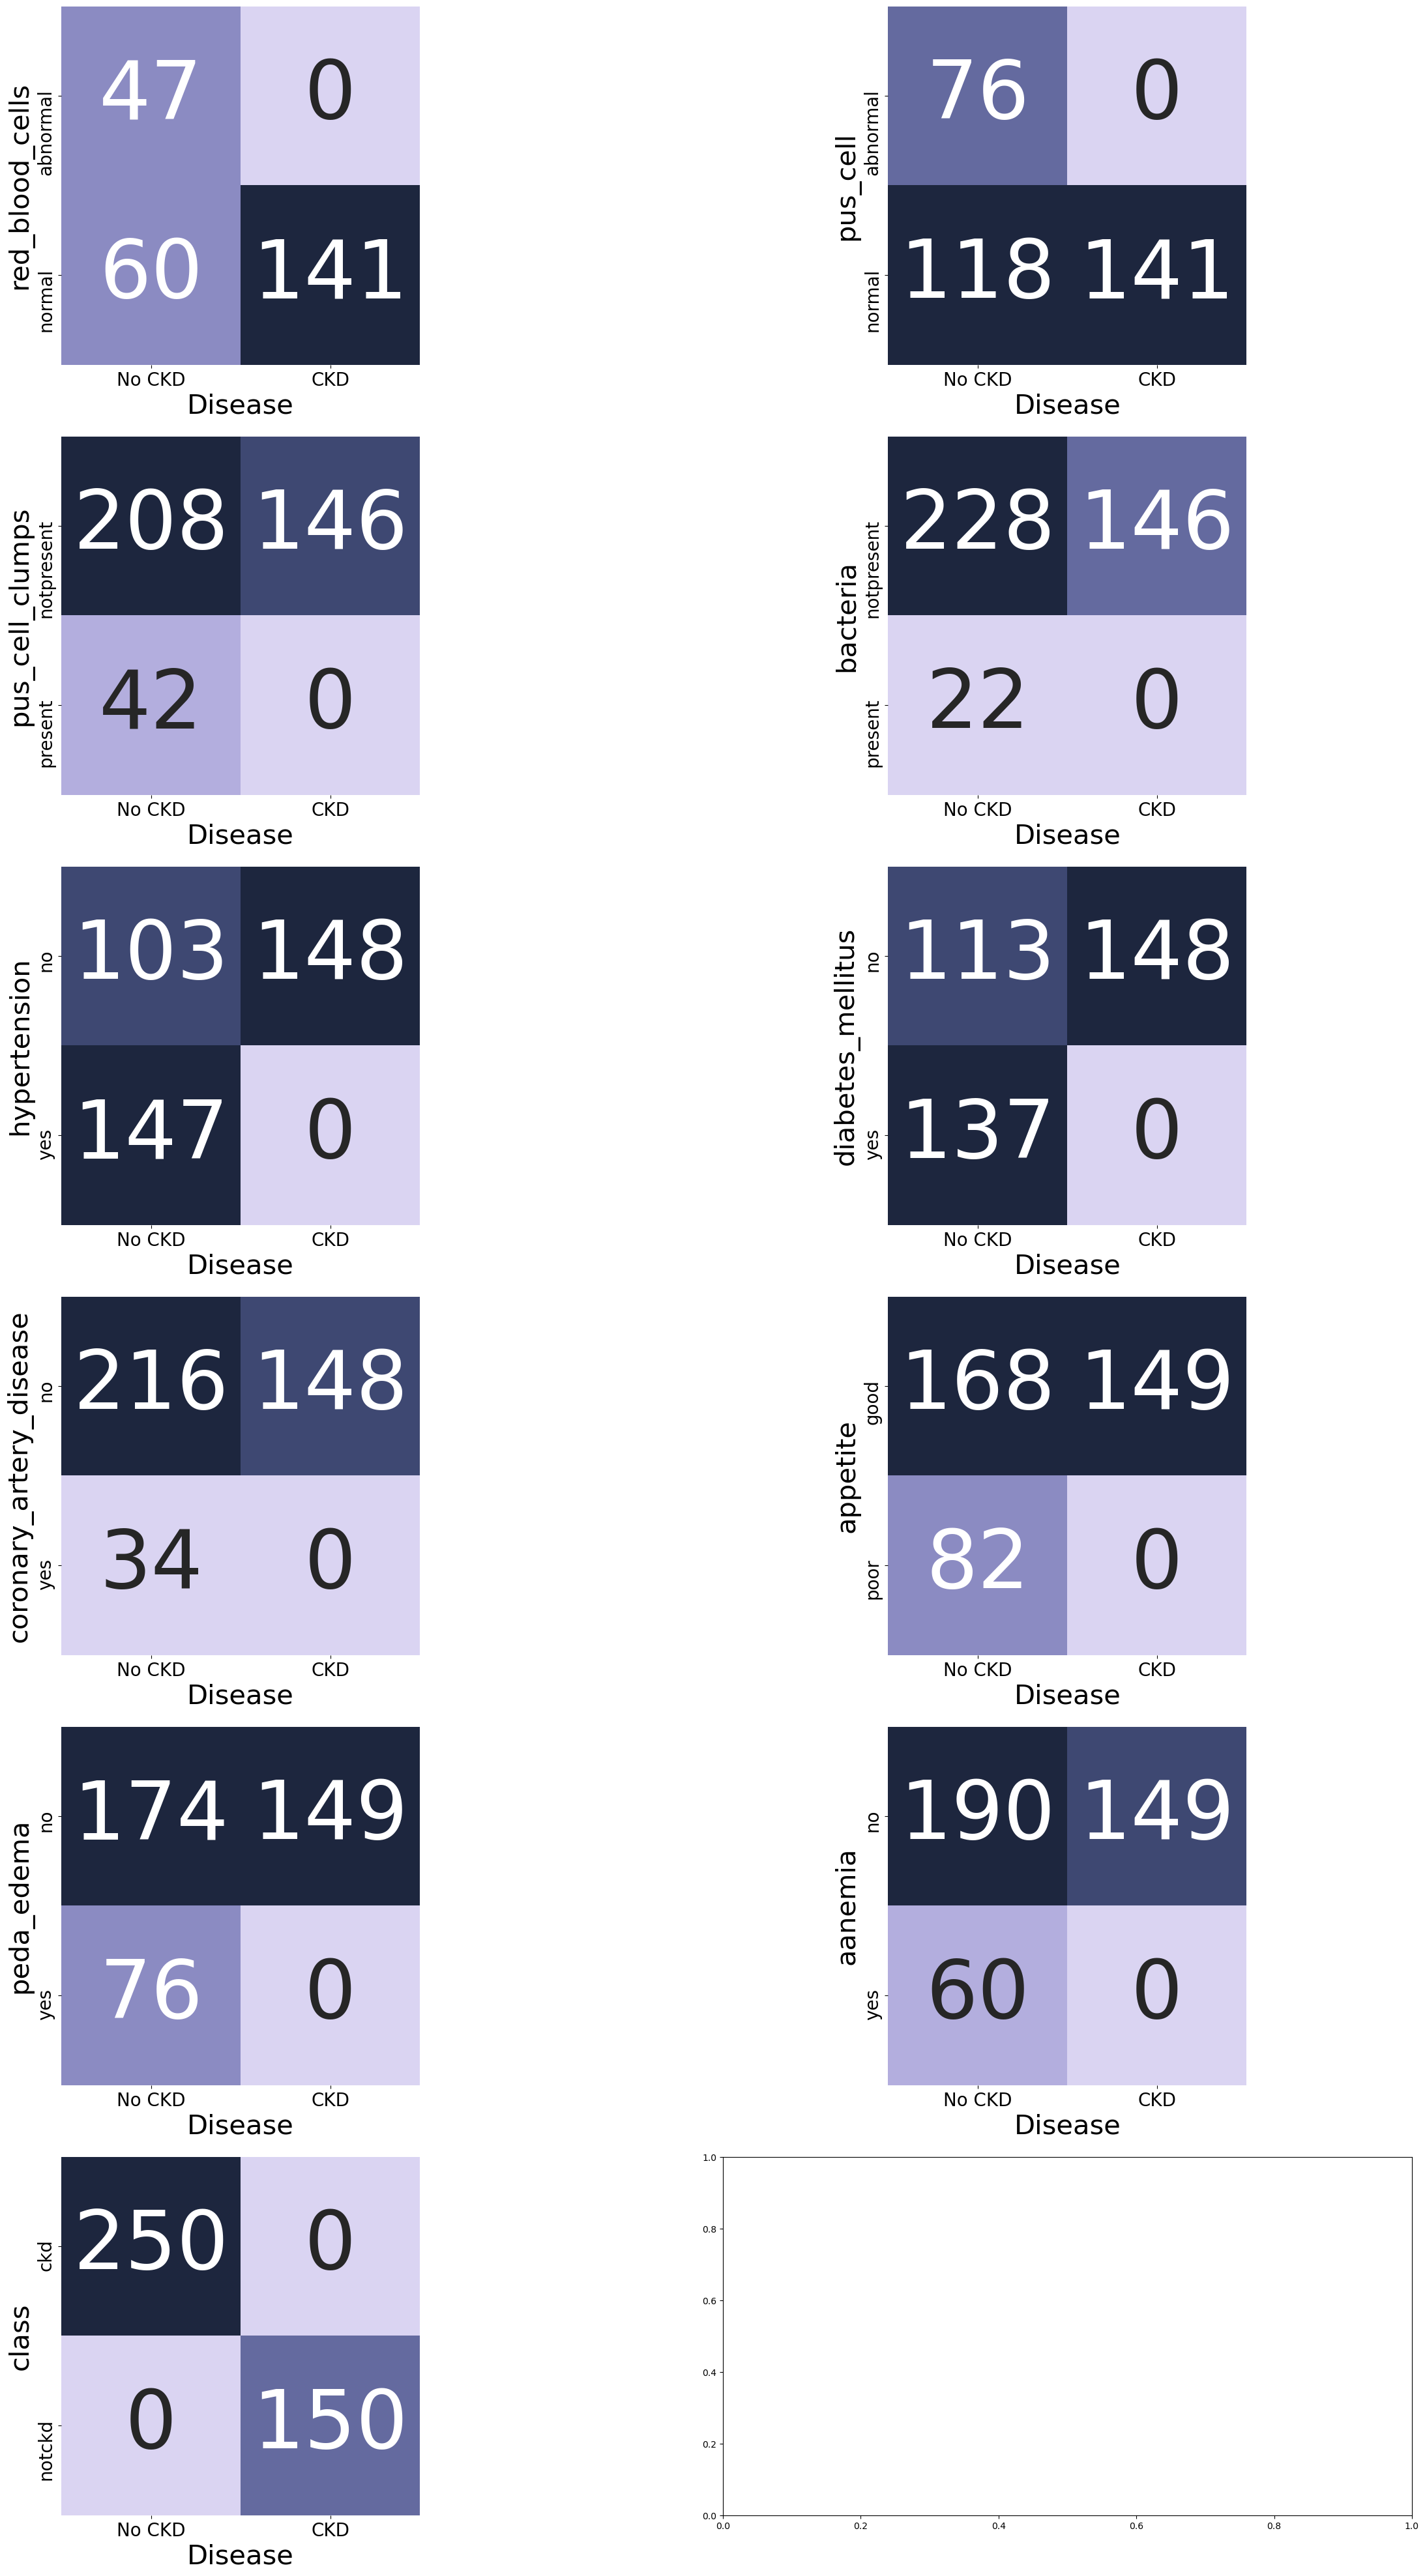

In [25]:
#Relationship between the categorical inependant features and the dependent feature (categorical)
#crosstab and heatmap
figure, axes = plt.subplots(nrows=6, ncols=2,figsize=(30, 50))
#figure.suptitle('\n\nCategorical Features\nVS\nTarget Variable', fontsize=50)
cat_f=df[categorical_features].drop(["specific_gravity","albumin","sugar"],axis=1)
for index, col in enumerate(cat_f):
    i,j = (index // 2), (index % 2)
    sns.heatmap(pd.crosstab(df[col],df['class']),
                ax=axes[i,j],
                cmap=sns.cubehelix_palette(start=2.8, rot=.1),
                square='True',
                cbar=False,
                annot=True,
                annot_kws={'fontsize':90},
                fmt='d')
    axes[i,j].set_xlabel("Disease", fontsize=30)
    axes[i,j].set_ylabel(col,fontsize=30)
    axes[i,j].set_yticklabels(axes[i,j].get_yticklabels(),fontsize=20)
    axes[i,j].set_xticklabels(["No CKD","CKD"],fontsize=20)

plt.show()

## 6. Relationship between numeric variables and the target variable ( swarm plot)

In [26]:
numerical_features.remove("class")

In [27]:
#q3
from sklearn.preprocessing import RobustScaler
robust_scaler = RobustScaler()
scaled_data = robust_scaler.fit_transform(df[numerical_features])
df_scaled = pd.DataFrame(scaled_data, columns = numerical_features)
df_scaled

age  blood_pressure  blood_glucose_random  blood_urea  \
0   -0.311111             0.0              0.000000   -0.153846   
1   -2.133333            -3.0                   NaN   -0.615385   
2    0.311111             0.0              4.718750    0.282051   
3   -0.311111            -1.0             -0.062500    0.358974   
4   -0.177778             0.0             -0.234375   -0.410256   
..        ...             ...                   ...         ...   
395  0.000000             0.0              0.296875    0.179487   
396 -0.577778            -1.0             -0.718750   -0.282051   
397 -1.911111             0.0             -0.328125   -0.410256   
398 -1.688889            -2.0             -0.109375    0.205128   
399  0.133333             0.0              0.156250   -0.615385   

     serum_creatinine    sodium  potassium  haemoglobin  packed_cell_volume  \
0           -0.052632       NaN        NaN     0.585106            0.307692   
1           -0.263158       NaN        NaN    -0.287234           -0.153846   
2            0.263158       NaN        NaN    -0.648936           -0.692308   
3            1.315789 -3.857143  -1.727273    -0.308511           -0.615385   
4            0.052632       NaN        NaN    -0.223404           -0.384615   
..                ...       ...        ...          ...                 ...   
395         -0.421053  1.714286   0.454545     0.648936            0.538462   
396         -0.052632  0.428571  -0.818182     0.819149            1.076923   
397         -0.368421 -0.142857   0.000000     0.670213            0.692308   
398         -0.157895 -0.428571   0.454545     0.329787            0.846154   
399         -0.105263  0.428571  -0.818182     0.670213            1.000000   

     white_blood_cell_count  red_blood_cell_count  
0                 -0.060606              0.266667  
1                 -0.606061                   NaN  
2                 -0.151515                   NaN  
3                 -0.393939             -0.600000  
4                 -0.212121             -0.133333  
..                      ...                   ...  
395               -0.393939              0.066667  
396               -0.060606              0.933333  
397               -0.424242              0.400000  
398               -0.242424              0.733333  
399               -0.363636              0.866667  

[400 rows x 11 columns]

In [28]:
# Creating a new dataframe with the melt function
df_new = pd.concat([df_scaled, df.loc[:, "class"]], axis = 1)
melted_data = pd.melt(df_new, id_vars = "class", var_name = "variables", value_name = "value")
melted_data

class             variables     value
0        ckd                   age -0.311111
1        ckd                   age -2.133333
2        ckd                   age  0.311111
3        ckd                   age -0.311111
4        ckd                   age -0.177778
...      ...                   ...       ...
4395  notckd  red_blood_cell_count  0.066667
4396  notckd  red_blood_cell_count  0.933333
4397  notckd  red_blood_cell_count  0.400000
4398  notckd  red_blood_cell_count  0.733333
4399  notckd  red_blood_cell_count  0.866667

[4400 rows x 3 columns]

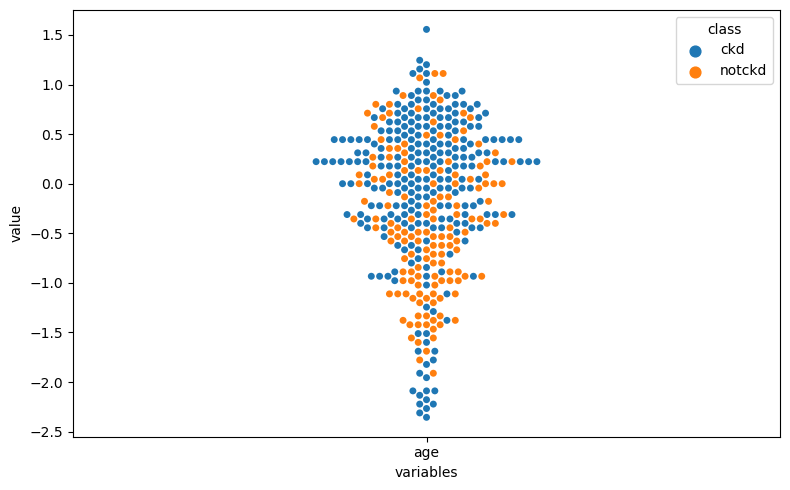

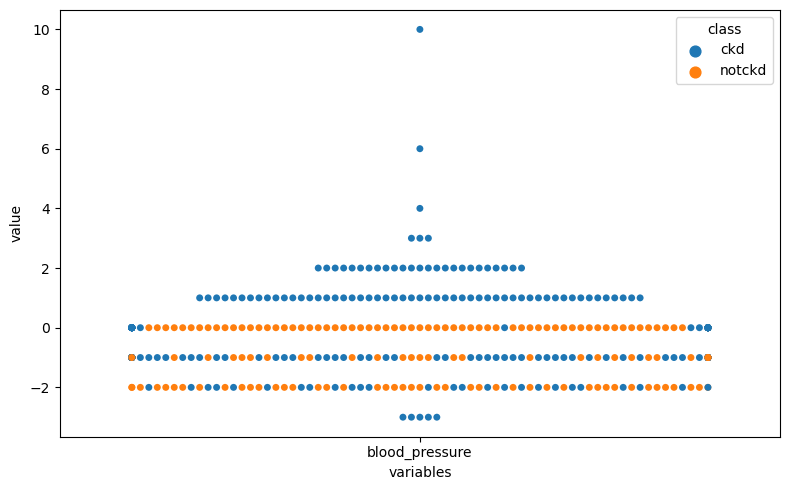

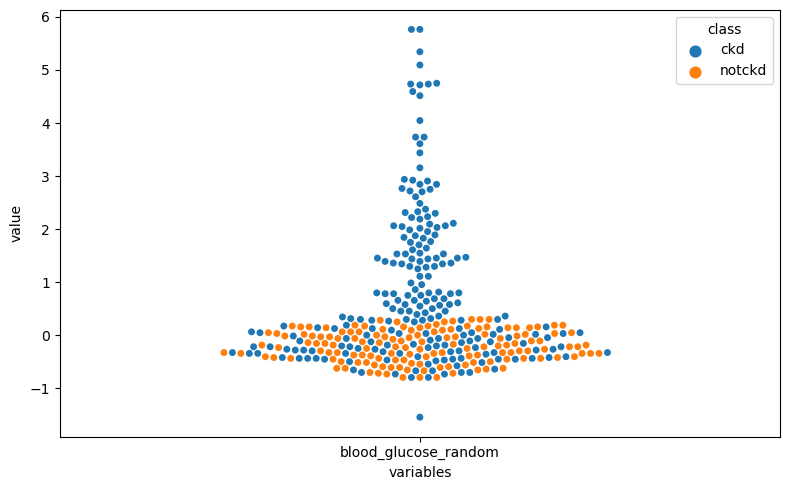

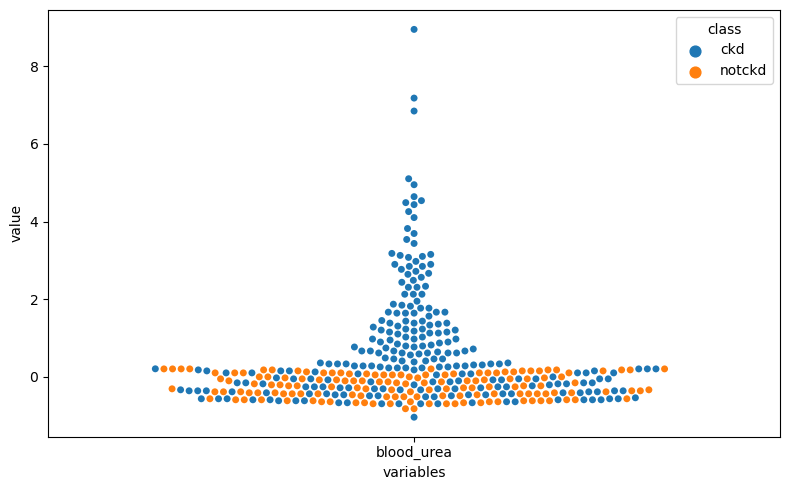

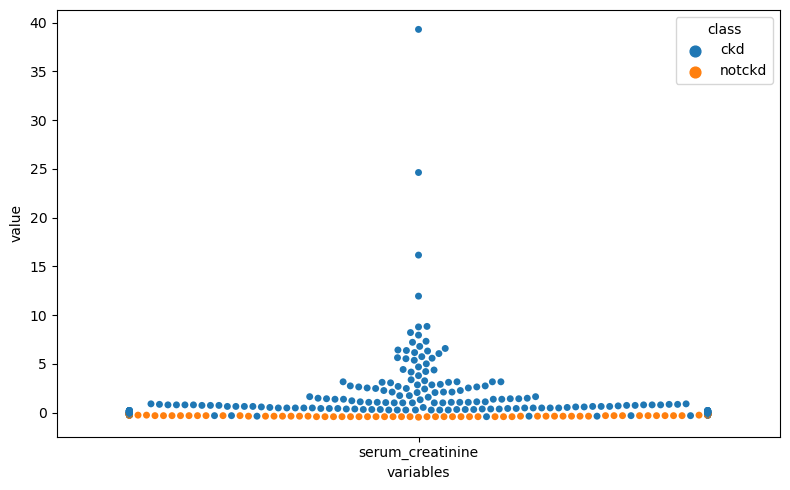

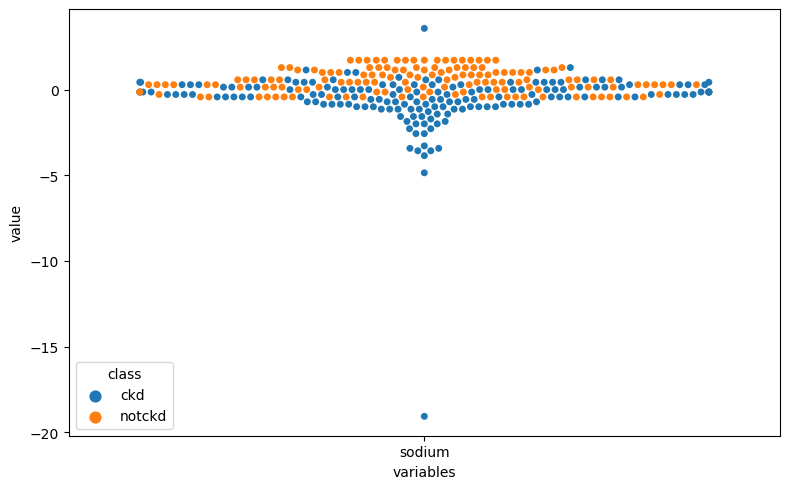

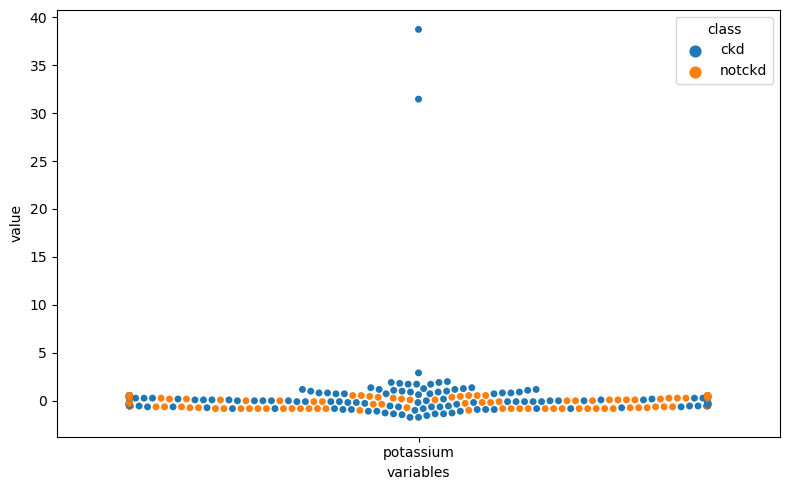

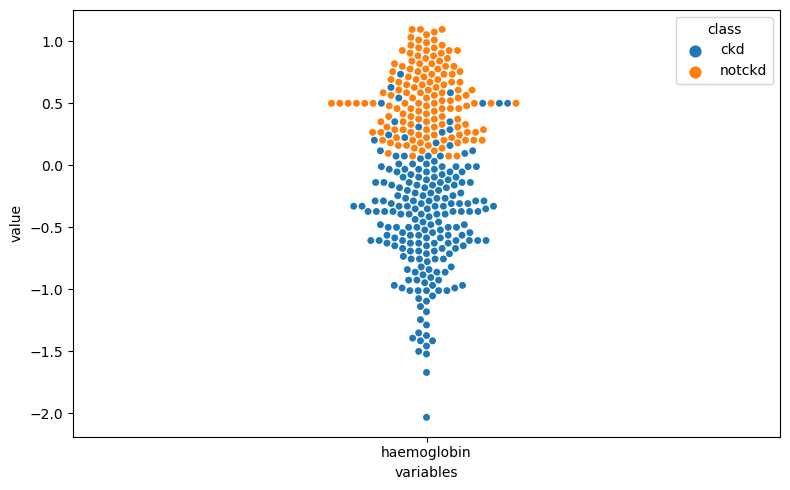

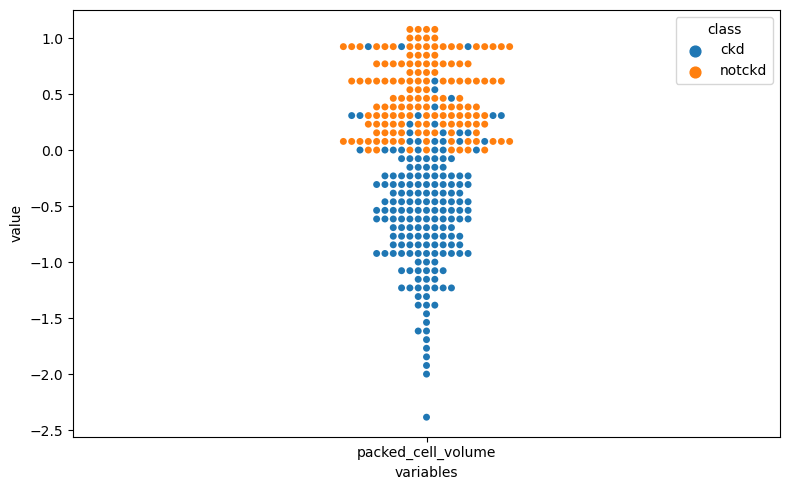

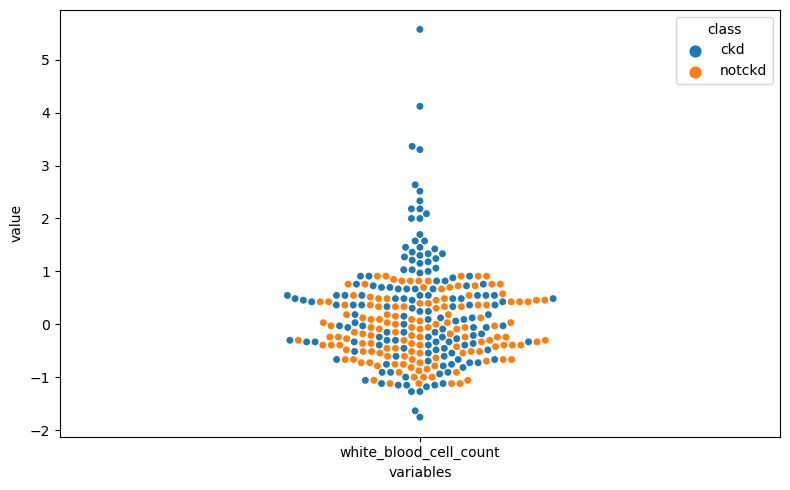

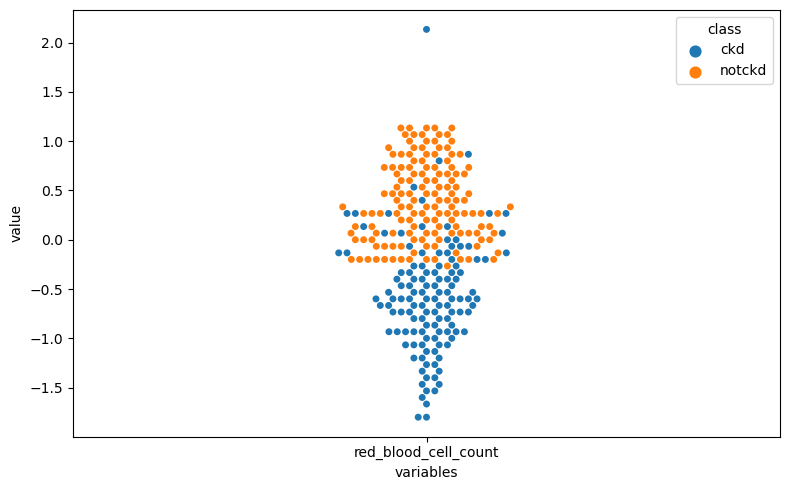

In [29]:
for column in numerical_features :
    plt.figure(figsize = (8, 5))
    melted_data2 = melted_data[melted_data['variables']==column]
    sns.swarmplot(x = "variables", y = "value", hue = "class", data = melted_data2)
    plt.tight_layout()
    plt.show()

## 7. Data preprocessing

### 7.1 Dealing with missing values in both categorical and numerical features (mean & mode imputation )

In [30]:
df2 = df.copy()

In [31]:
print(f"total missing values in categorical features : {df2[categorical_features].isnull().sum().sum()}")
print(f"total missing values in numerical features : {df2[numerical_features].isnull().sum().sum()}")

total missing values in categorical features : 376
total missing values in numerical features : 636


In [32]:
# Missing values in numerical features
missing_values_num = [var for var in numerical_features if df2[var].isnull().mean()>0]
missing_values_cat = [var for var in categorical_features if df2[var].isnull().mean()>0]

In [33]:
#Imputing missing values in the categorical features with the mode
for col in missing_values_cat:
    df2[col] = df2[col].fillna(df2[col].mode()[0])

In [34]:
# Imputing missing values in the numerical features with the mean
for col in missing_values_num:
    df2[col] = df2[col].fillna(df2[col].mean())

In [35]:
print(f"total missing values in categorical features : {df2[categorical_features].isnull().sum().sum()}")
print(f"total missing values in numerical features : {df2[numerical_features].isnull().sum().sum()}")

total missing values in categorical features : 0
total missing values in numerical features : 0


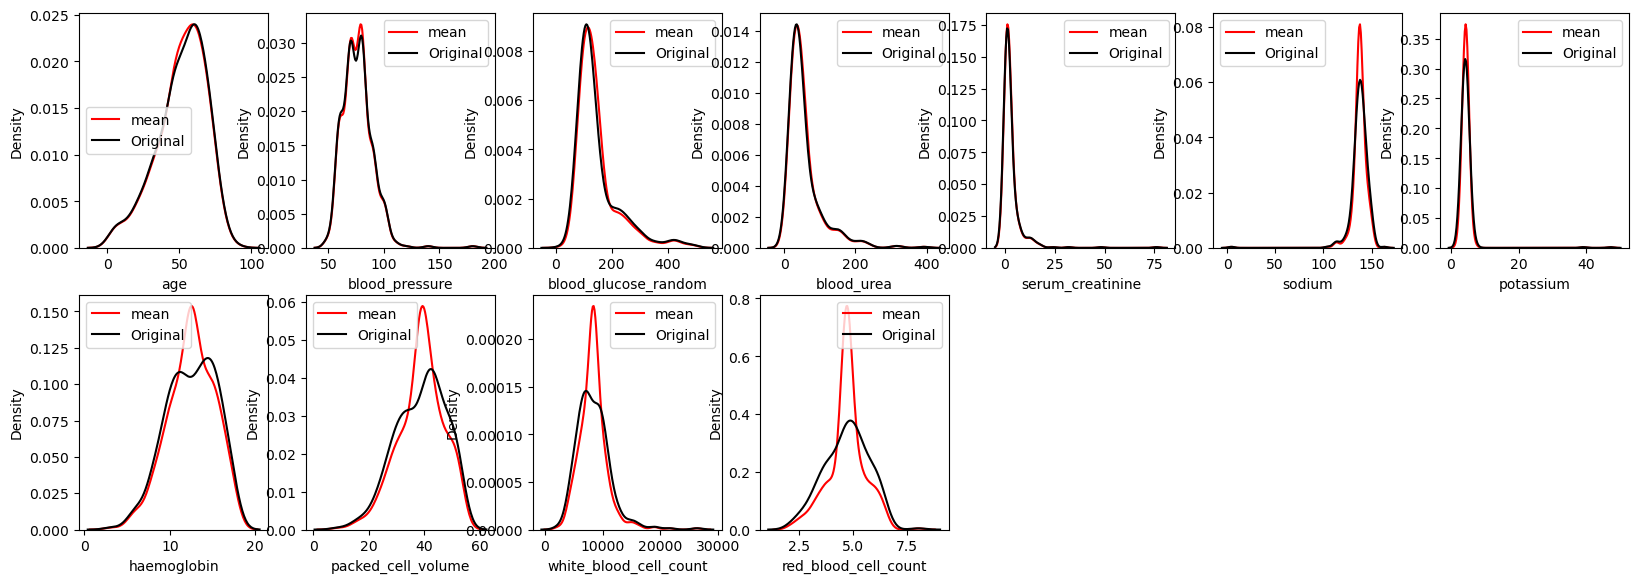

In [36]:
# Mean imputation impact
plt.figure(figsize = (20, 25))
i = 1
for col in df2[numerical_features].columns:
    if i<=14:
        axi= plt.subplot(7,7,i)
        sns.kdeplot(df2[col],color='red',label='mean')
        sns.kdeplot(df[col],color='black',label='Original')
        i +=1
        plt.legend()

### 7.2 Feature encoding

In [37]:
categorical_features2 = [x for x in categorical_features  if x not in ['specific_gravity','albumin','sugar']]

In [38]:
categorical_features2

['red_blood_cells',
 'pus_cell',
 'pus_cell_clumps',
 'bacteria',
 'hypertension',
 'diabetes_mellitus',
 'coronary_artery_disease',
 'appetite',
 'peda_edema',
 'aanemia',
 'class']

In [39]:
for col in categorical_features2:
    print(f"{col} has {df2[col].nunique()} categories\n")

red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories

class has 2 categories



In [40]:
categorical_features2.remove("class")

In [41]:
#Encoding the class variable ( target variable )
df2['class'] = np.where(df2['class']== 'ckd',1,0)

In [42]:
#Encoding all the other categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_features2:
    df2[col] = encoder.fit_transform(df2[col])

In [43]:
df2[categorical_features]

red_blood_cells  pus_cell  pus_cell_clumps  bacteria  hypertension  \
0                  1         1                0         0             1   
1                  1         1                0         0             0   
2                  1         1                0         0             0   
3                  1         0                1         0             1   
4                  1         1                0         0             0   
..               ...       ...              ...       ...           ...   
395                1         1                0         0             0   
396                1         1                0         0             0   
397                1         1                0         0             0   
398                1         1                0         0             0   
399                1         1                0         0             0   

     diabetes_mellitus  coronary_artery_disease  appetite  peda_edema  \
0                    1                        0         0           0   
1                    0                        0         0           0   
2                    1                        0         1           0   
3                    0                        0         1           1   
4                    0                        0         0           0   
..                 ...                      ...       ...         ...   
395                  0                        0         0           0   
396                  0                        0         0           0   
397                  0                        0         0           0   
398                  0                        0         0           0   
399                  0                        0         0           0   

     aanemia  class  specific_gravity  albumin  sugar  
0          0      1             1.020      1.0    0.0  
1          0      1             1.020      4.0    0.0  
2          1      1             1.010      2.0    3.0  
3          1      1             1.005      4.0    0.0  
4          0      1             1.010      2.0    0.0  
..       ...    ...               ...      ...    ...  
395        0      0             1.020      0.0    0.0  
396        0      0             1.025      0.0    0.0  
397        0      0             1.020      0.0    0.0  
398        0      0             1.025      0.0    0.0  
399        0      0             1.025      0.0    0.0  

[400 rows x 14 columns]

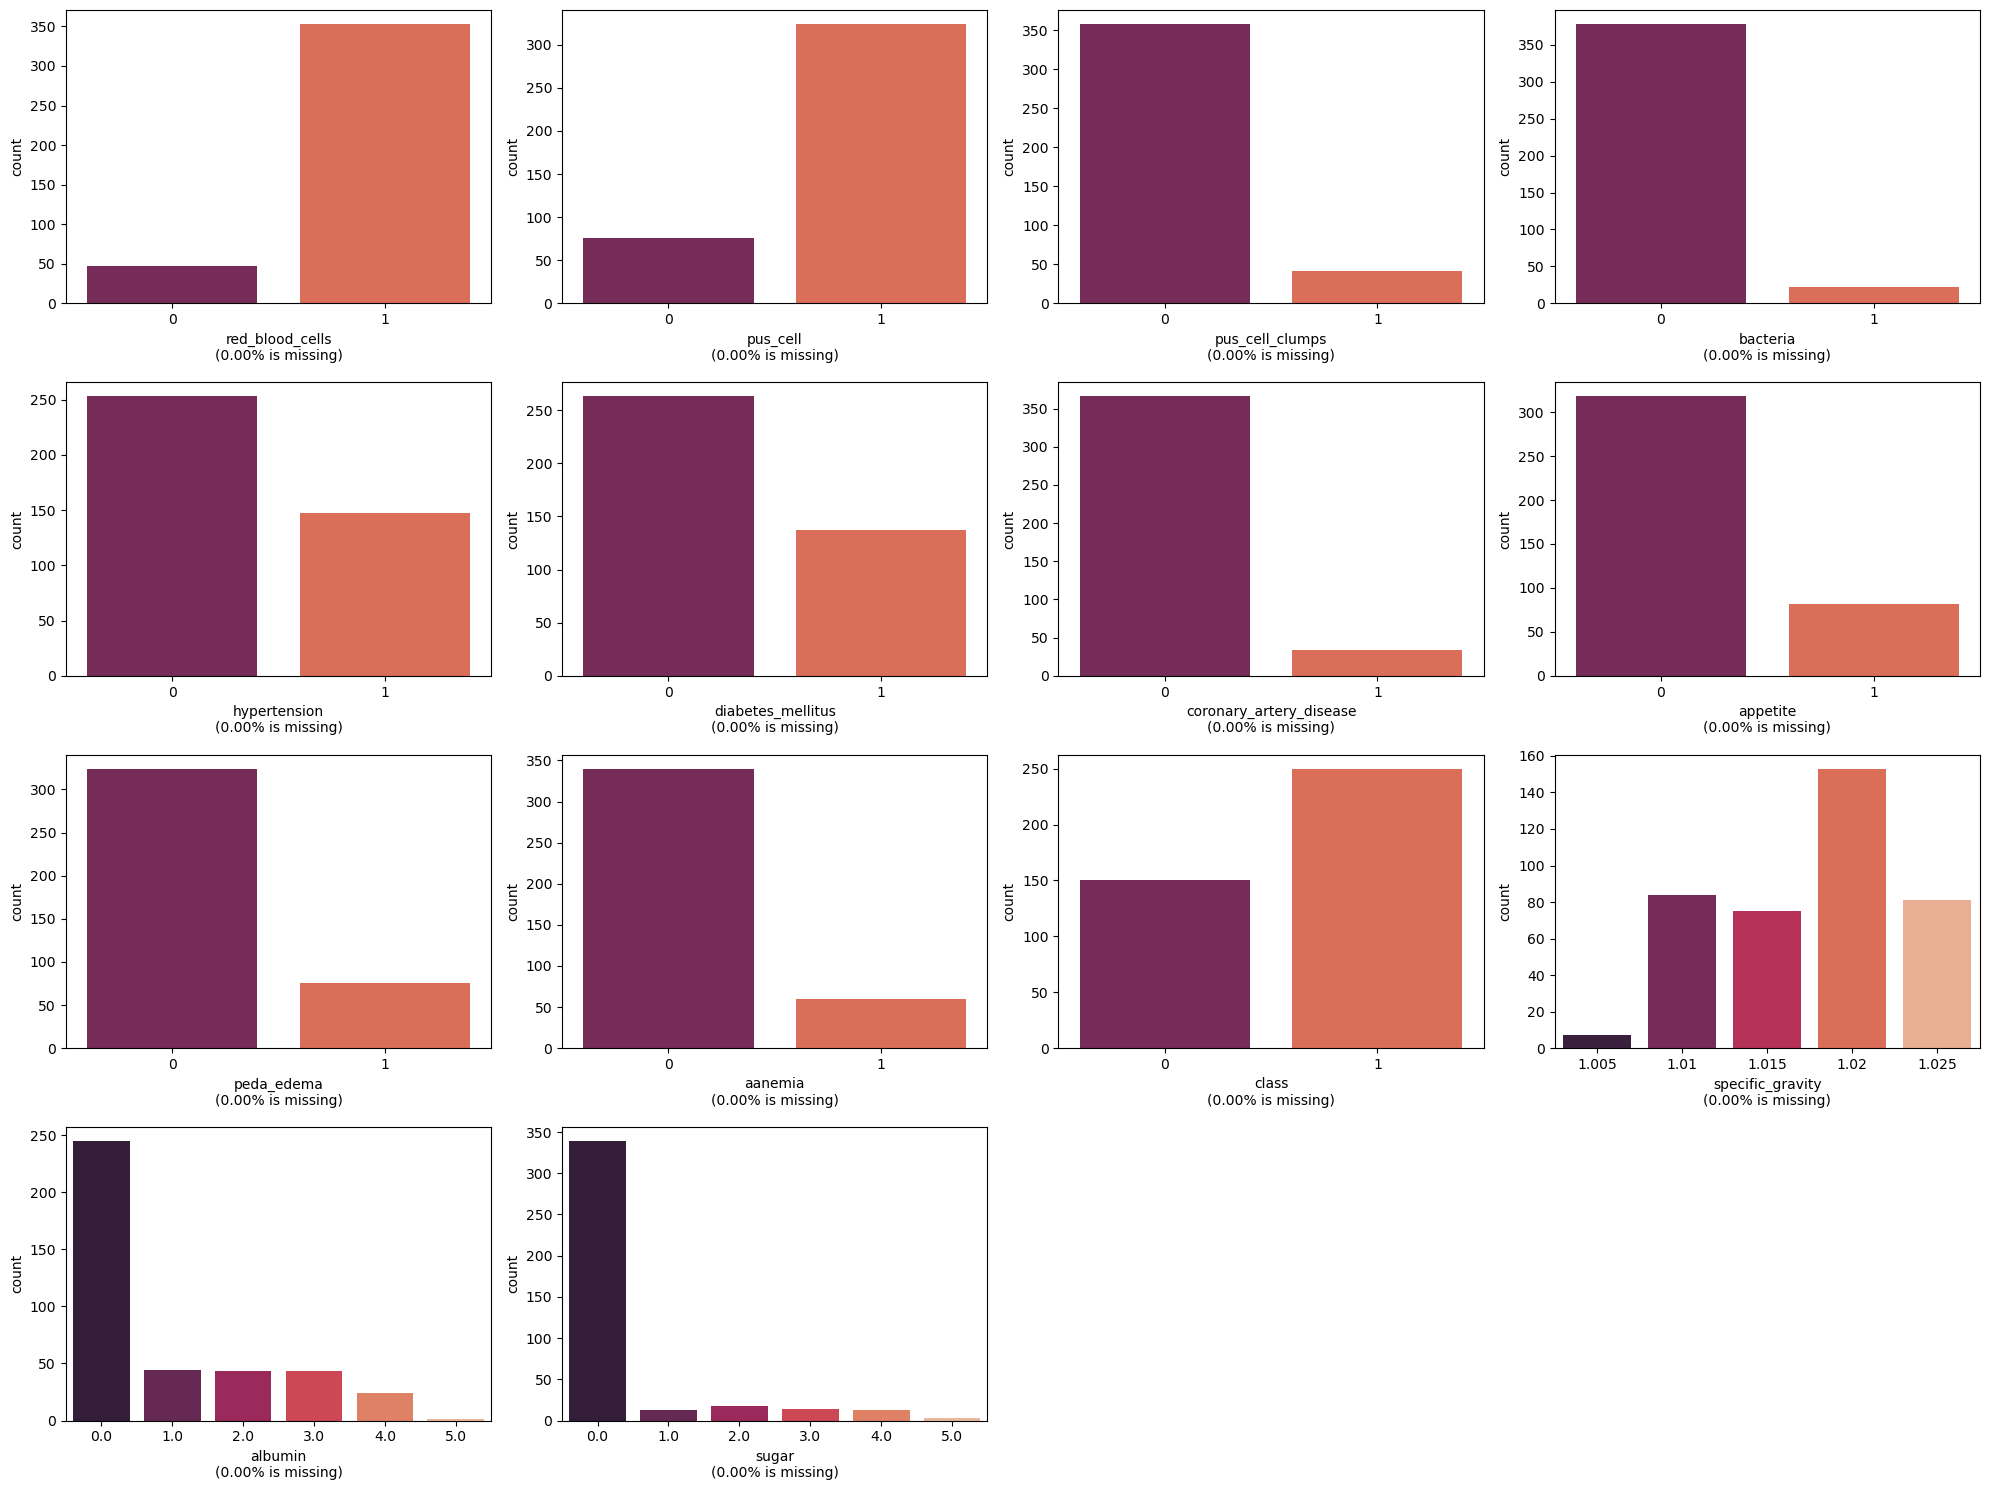

In [44]:
#looking at categorical columns

plt.figure(figsize = (20, 15))
plotnumber = 1

for column in df2[categorical_features]:
    if plotnumber <= 14:
        miss_perc="%.2f"%(100*(1-(df2[categorical_features][column].dropna().shape[0])/df2[categorical_features].shape[0]))
        ax = plt.subplot(4, 4, plotnumber)
        sns.countplot(df2[categorical_features][column], palette = 'rocket')
        plt.xlabel(column+"\n({}% is missing)".format(miss_perc))

    plotnumber += 1

plt.tight_layout()
plt.show()

### 7.3 Detecting Correlations

<AxesSubplot:>

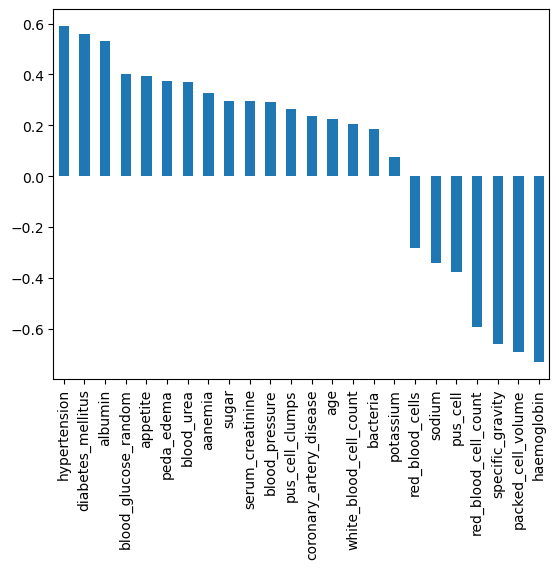

In [45]:
#Detecting the most correlated variables with the target variable
df2.corr()['class'].sort_values(ascending=False).drop('class').plot(kind='bar')

<AxesSubplot:>

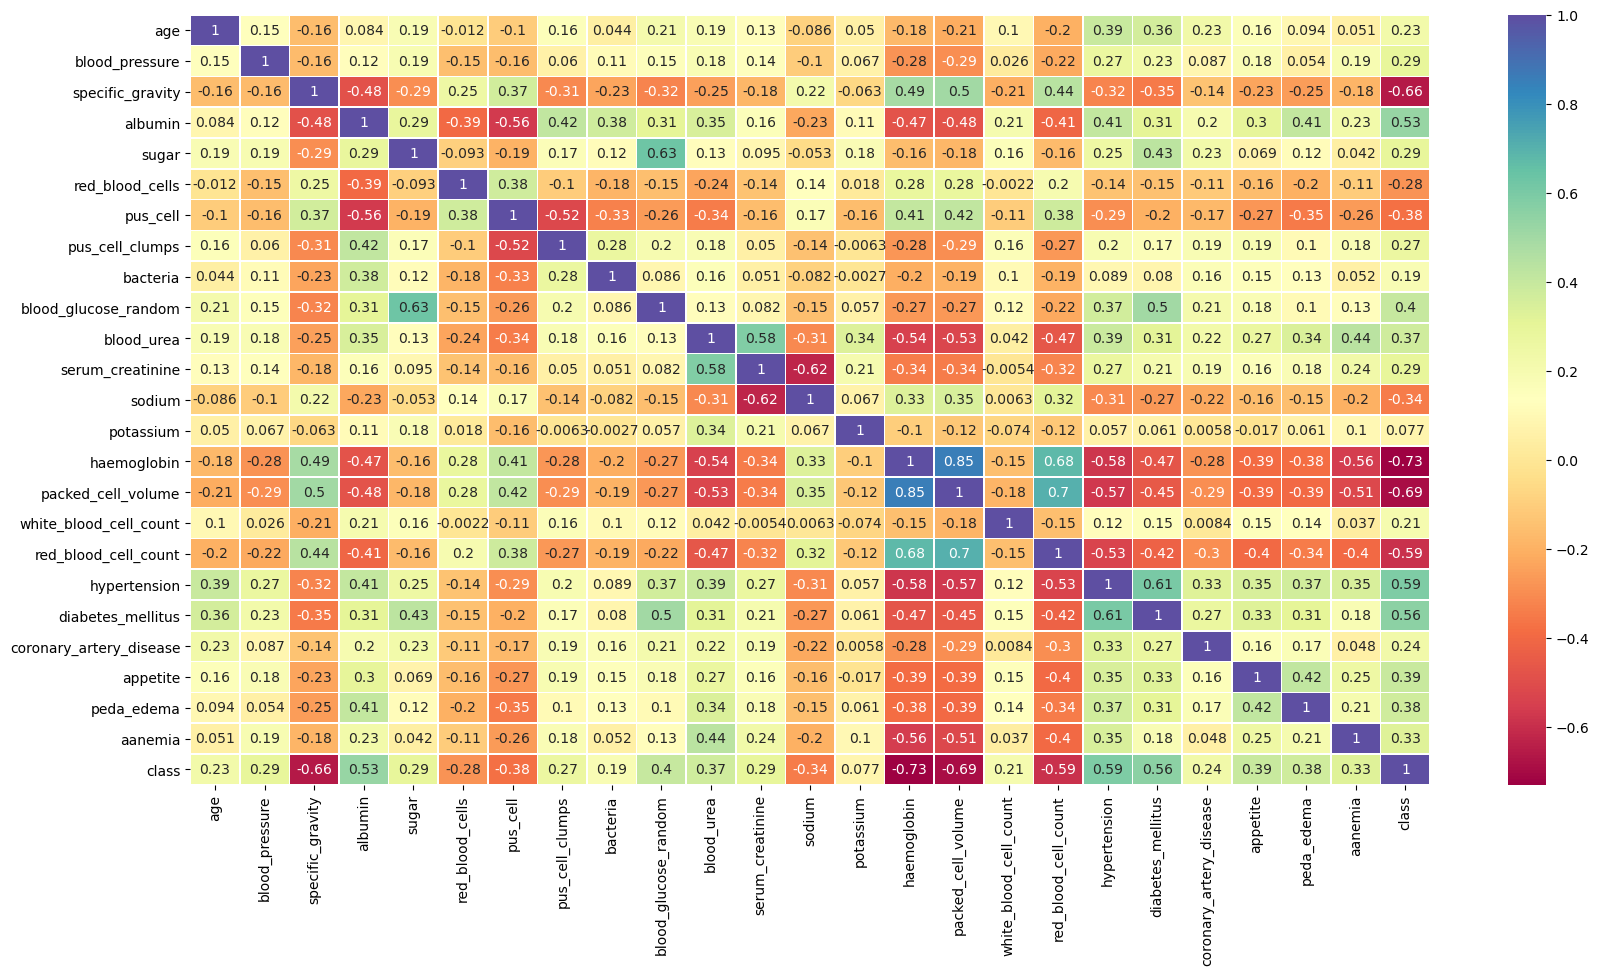

In [46]:
plt.figure(figsize=(20,10))
sns.heatmap(df2.corr(),annot=True, linewidths=0.5,cmap="Spectral")

In [47]:
#q4
corr_features =[]
for i , r in df2.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.5:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['specific_gravity', 'packed_cell_volume', 0.5010642737013354],
 ['albumin', 'class', 0.5315619808967567],
 ['sugar', 'blood_glucose_random', 0.6298087065511954],
 ['blood_glucose_random', 'sugar', 0.6298087065511954],
 ['blood_glucose_random', 'diabetes_mellitus', 0.5006175578654293],
 ['blood_urea', 'serum_creatinine', 0.5812224717922313],
 ['serum_creatinine', 'blood_urea', 0.5812224717922313],
 ['haemoglobin', 'packed_cell_volume', 0.8549621427437394],
 ['haemoglobin', 'red_blood_cell_count', 0.6822567780772886],
 ['packed_cell_volume', 'specific_gravity', 0.5010642737013354],
 ['packed_cell_volume', 'haemoglobin', 0.8549621427437394],
 ['packed_cell_volume', 'red_blood_cell_count', 0.7036175365297874],
 ['red_blood_cell_count', 'haemoglobin', 0.6822567780772886],
 ['red_blood_cell_count', 'packed_cell_volume', 0.7036175365297874],
 ['hypertension', 'diabetes_mellitus', 0.6081176154224914],
 ['hypertension', 'class', 0.59043763497131],
 ['diabetes_mellitus', 'blood_glucose_random'

### 7.4 Dealing with the outliers

skewness of age is -0.675847993683851


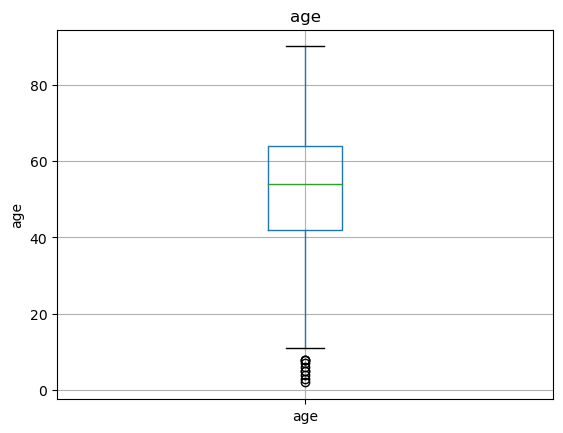

skewness of blood_pressure is 1.629875965898943


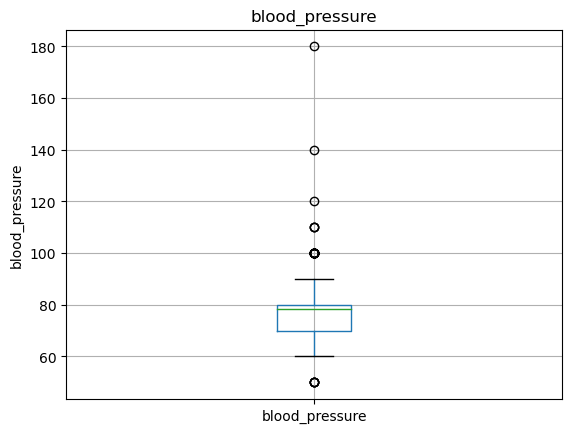

skewness of blood_glucose_random is 2.13042150297039


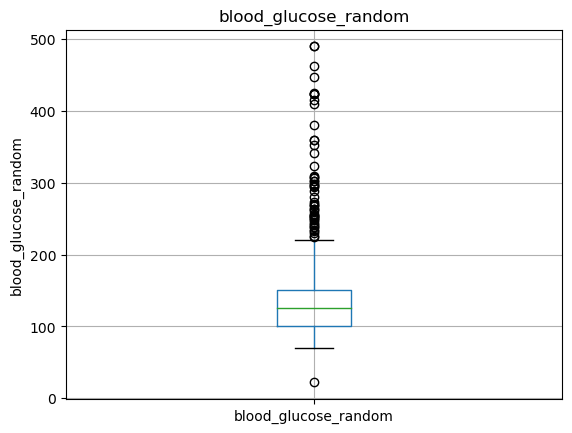

skewness of blood_urea is 2.6987540689296994


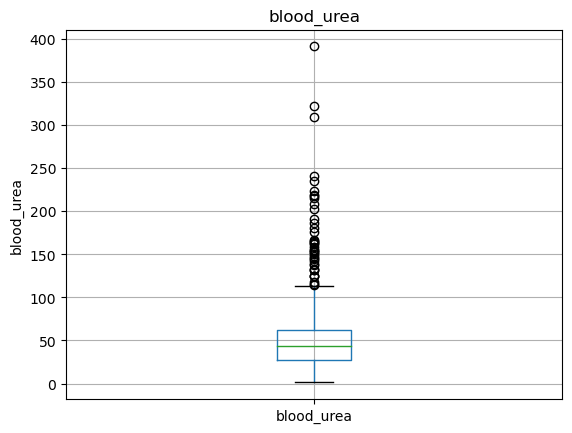

skewness of serum_creatinine is 7.6731046466181185


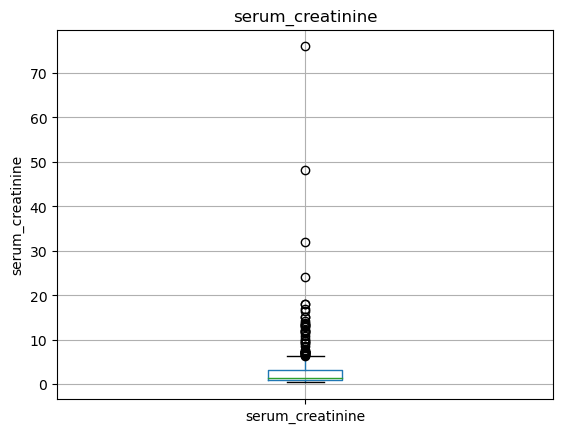

skewness of sodium is -7.901093766045826


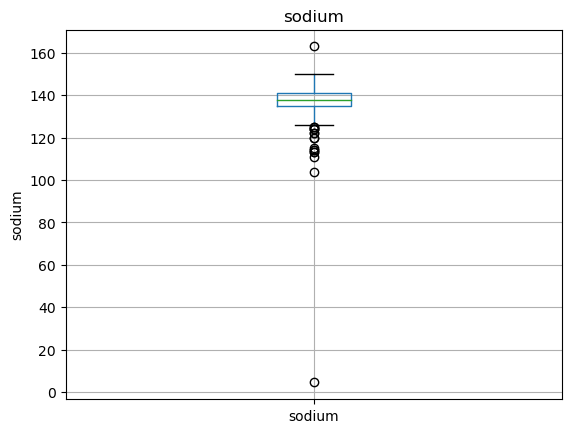

skewness of potassium is 13.101157345450702


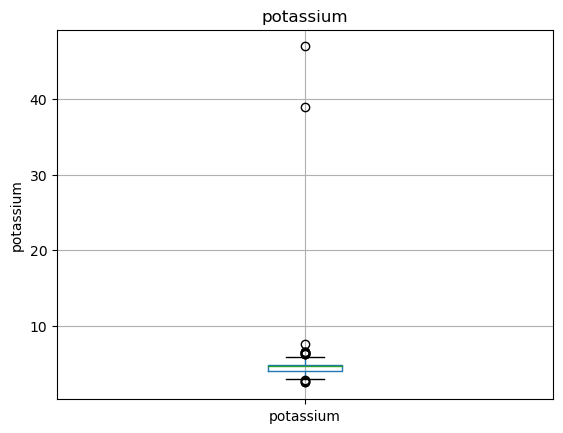

skewness of haemoglobin is -0.35905668459388623


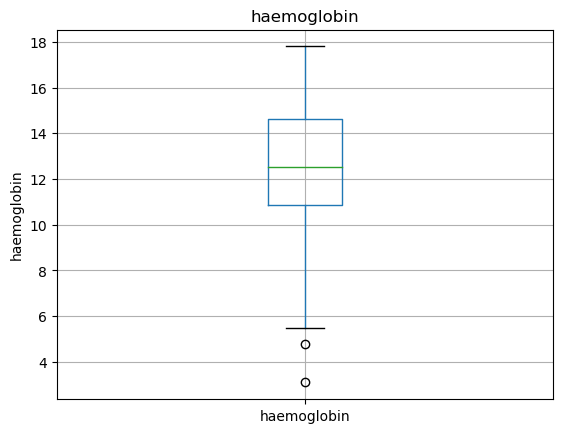

skewness of packed_cell_volume is -0.4778001587164466


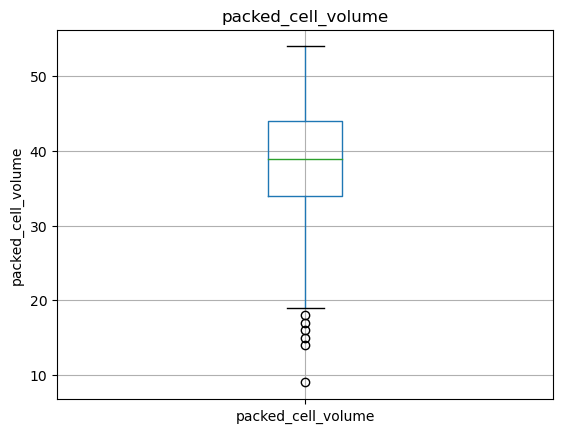

skewness of white_blood_cell_count is 1.888886954721049


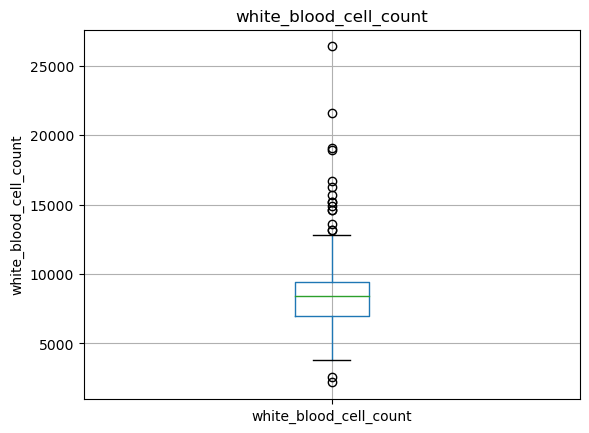

skewness of red_blood_cell_count is -0.22314485650675095


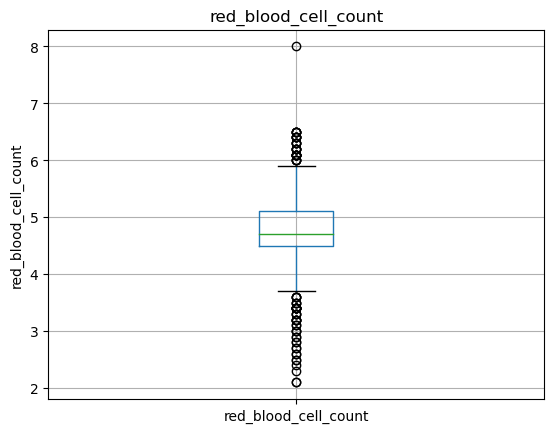

In [48]:
#Visualizing the outliers
for feature in df2[numerical_features]:
    df2.boxplot(column=feature)
    print(f"skewness of {feature} is {df2[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

In [49]:
df3 = df2.copy()

In [50]:
#capping the high outliers (> 95% of the data) or the low outliers ( %5< of the data) with the 95% and 5% values
for col in numerical_features:
    low, high = df3[col].quantile([0.05, 0.95])
    for i in df3[col].index:
        if (df3[col][i]<low):
            df3.loc[i, col] = low
        elif df3[col][i]>high:
            df3.loc[i, col] = high



skewness of age is -0.516991423594379


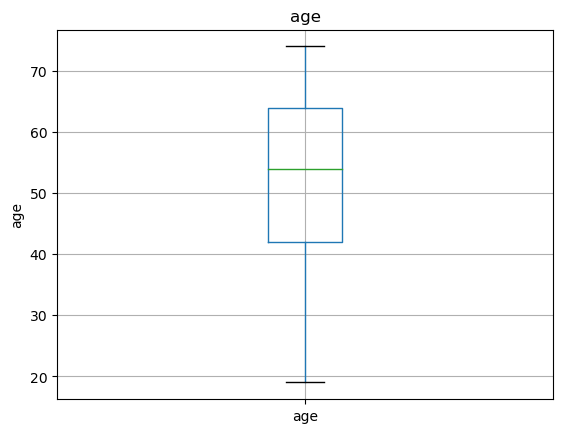

skewness of blood_pressure is 0.35406853235244967


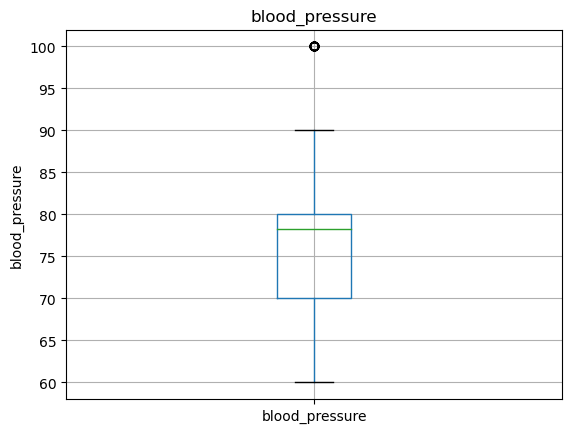

skewness of blood_glucose_random is 1.3702991521525498


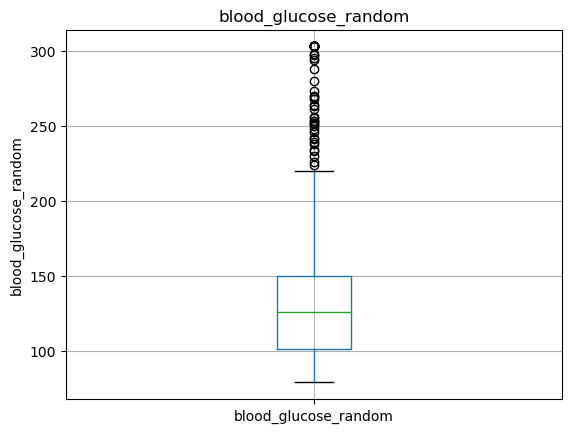

skewness of blood_urea is 1.4907063827862161


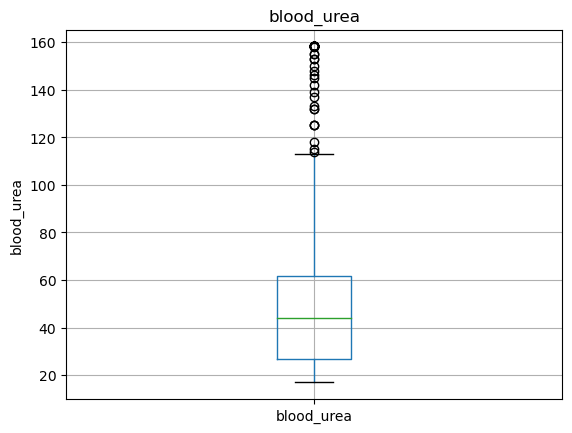

skewness of serum_creatinine is 2.0953324757226586


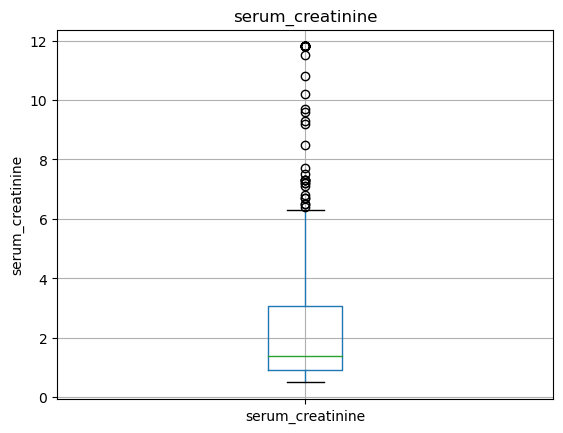

skewness of sodium is -0.14603060107639074


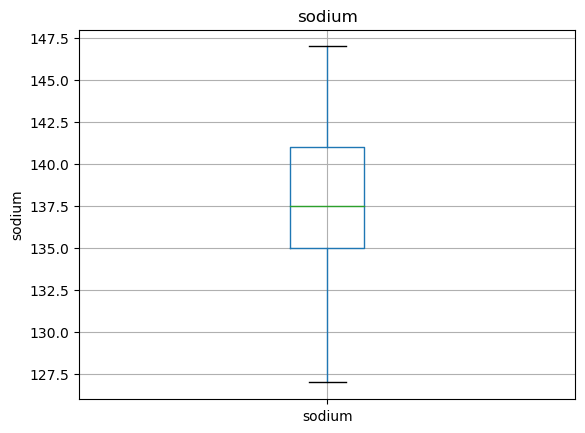

skewness of potassium is -0.16084736899428456


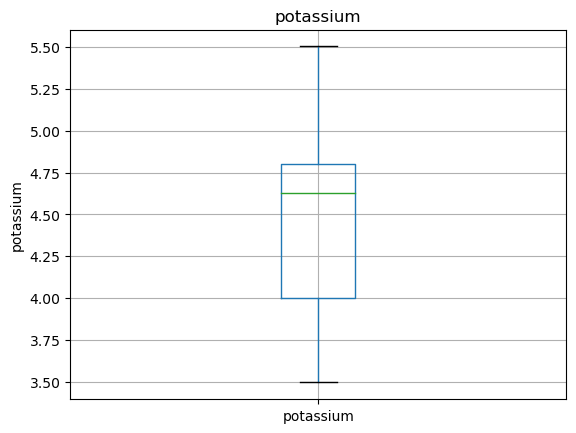

skewness of haemoglobin is -0.13456476873505757


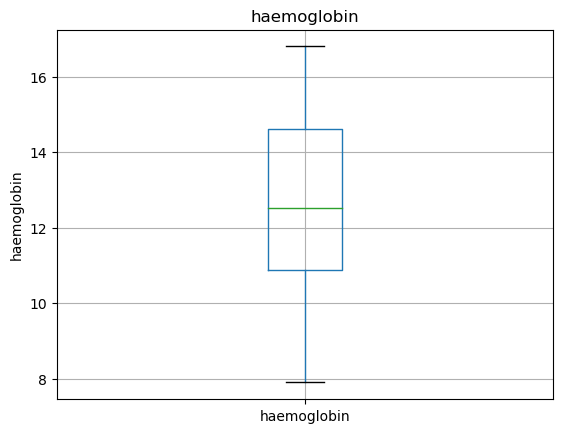

skewness of packed_cell_volume is -0.18866115443685716


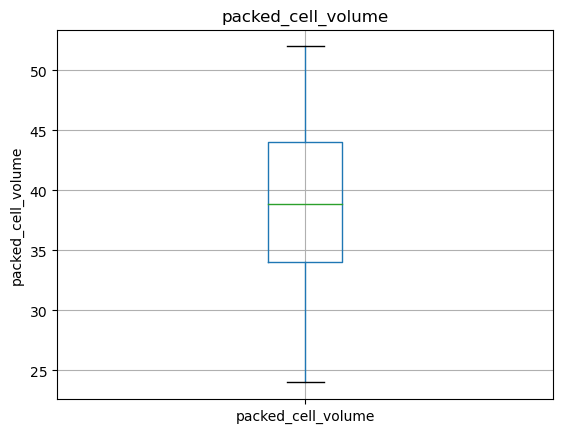

skewness of white_blood_cell_count is 0.17708193907037417


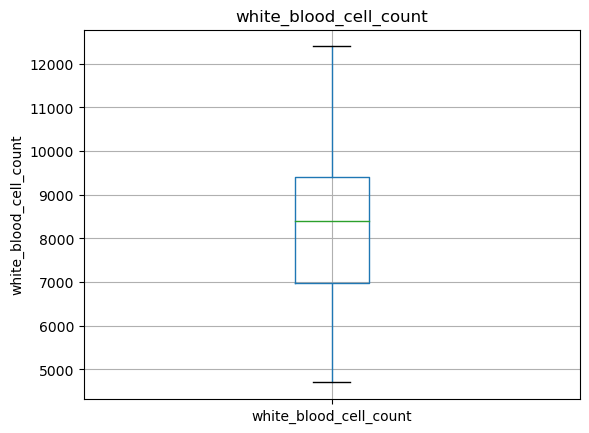

skewness of red_blood_cell_count is -0.1375558970358101


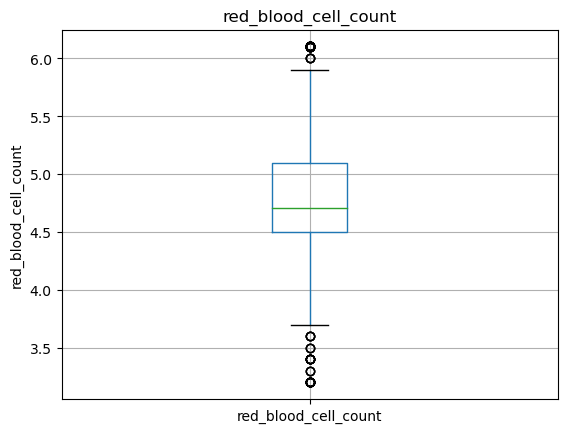

In [51]:
#Visualizing the outliers after capping them
for feature in df3[numerical_features]:
    df3.boxplot(column=feature)
    print(f"skewness of {feature} is {df3[feature].skew()}")
    plt.ylabel(feature)
    plt.title(feature)
    plt.show()

## 8. Modeling

In [52]:
#Necessary libraries for modeling
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import MinMaxScaler

In [53]:
#Splitting the independent features from the dependant feature
X = df3.drop(['class'],axis=1)
y = df3['class']

In [54]:
df3['class'].value_counts(normalize=True) * 100

1    62.5
0    37.5
Name: class, dtype: float64

In [55]:
# # Balancing the dataset
# from imblearn.over_sampling import SMOTE
# oversample = SMOTE()
# X, y = oversample.fit_resample(X, y)

In [56]:
X.shape

(400, 24)

### 8.1 Splitting the data into train set  and test set

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [58]:
#Feature scaling
standard_scaler = StandardScaler()
X_train= standard_scaler.fit_transform(X_train)
X_test= standard_scaler.transform(X_test)

###  8.2 KNN Algorithm

In [59]:
#q5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)


scores = cross_val_score(knn, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
# accuracy score, confusion matrix and classification report of knn

knn_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test,y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

Cross-validation scores:[0.9        1.         0.96666667 0.93333333 0.96666667 1.
 1.         1.         0.96666667 0.9       ]
Average cross-validation score: 0.9633333333333333
Training Accuracy of KNN is 0.9633333333333334
Test Accuracy of KNN is 0.98 

Confusion Matrix :- 
[[35  0]
 [ 2 63]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



In [60]:
#Dictionnary of  Hyperparameters that we want to tune.
grid_params = { 'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan'],
                'leaf_size': [1,5,8,10,15],
                'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                'p':[1,2]}
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, grid_params, cv=10,n_jobs=-1,verbose=1)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])

Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Best leaf_size: 1
Best p: 2
Best n_neighbors: 1


In [61]:
# best estimator

knn_best = clf.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

knn_acc = accuracy_score(y_test, knn_best.predict(X_test))
print(f"Training Accuracy of knn is {accuracy_score(y_train, knn_best.predict(X_train))}")
print(f"Test Accuracy of knn  is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn_best.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn_best.predict(X_test))}")

Training Accuracy of knn is 1.0
Test Accuracy of knn  is 0.98 

Confusion Matrix :- 
[[35  0]
 [ 2 63]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



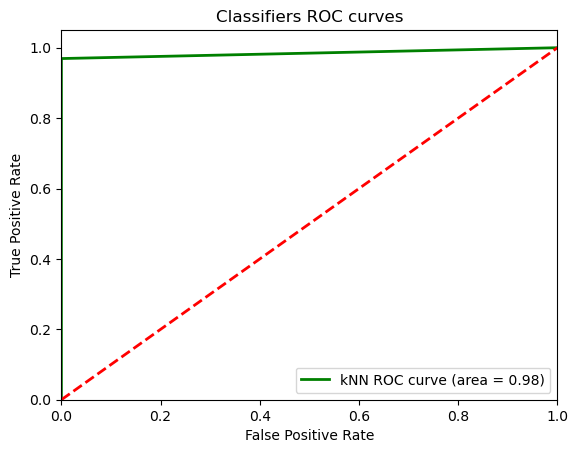

In [62]:
from sklearn.metrics import roc_curve,auc

fpr2, tpr2, threshold2 = roc_curve(y_test, knn_best.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

plt.figure()

plt.plot(fpr2, tpr2, color='green', lw=2, label='kNN ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

###  8.3 Random Forest Algorithm

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

rc = RandomForestClassifier()
rc.fit(X_train, y_train)
# accuracy score, confusion matrix and classification report of decision tree
scores = cross_val_score(rc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
rc_acc = accuracy_score(y_test, rc.predict(X_test))
print(f"Training Accuracy of Random Forest Classifier is {accuracy_score(y_train, rc.predict(X_train))}")
print(f"Test Accuracy of Random Forest Classifier is {rc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, rc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, rc.predict(X_test))}")

Cross-validation scores:[0.96666667 1.         1.         1.         1.         1.
 1.         0.96666667 0.93333333 1.        ]
Average cross-validation score: 0.9866666666666667
Training Accuracy of Random Forest Classifier is 1.0
Test Accuracy of Random Forest Classifier is 1.0 

Confusion Matrix :- 
[[35  0]
 [ 0 65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



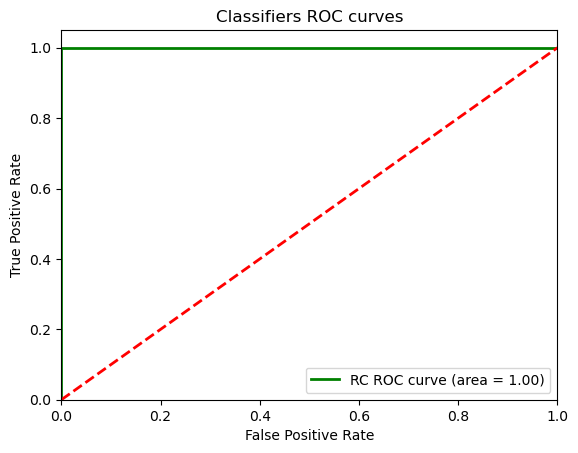

In [64]:
from sklearn.metrics import roc_curve,auc

fpr2, tpr2, threshold2 = roc_curve(y_test, rc.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

plt.figure()

plt.plot(fpr2, tpr2, color='green', lw=2, label='RC ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

#### 8.3.1 Most important features according to the random forest alogrithm

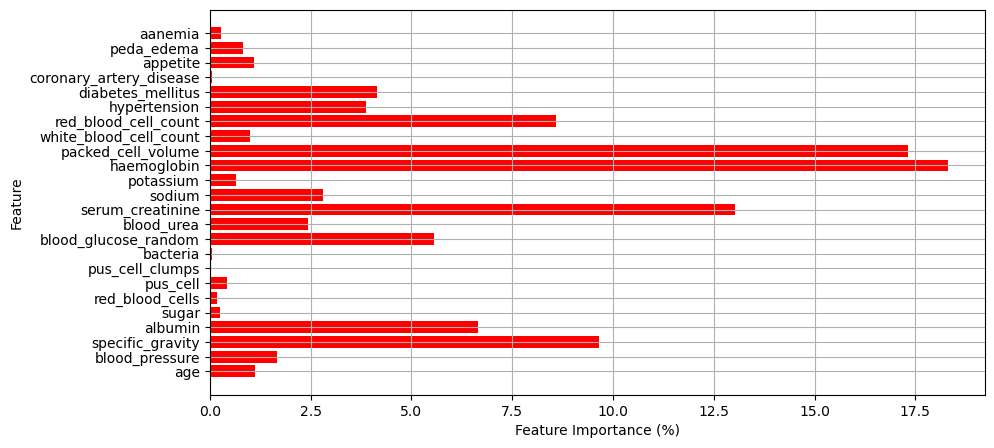

In [65]:
plt.figure(figsize=(10,5))
plt.barh(df3.drop(['class'],axis=1).columns.values,rc.feature_importances_*100,align='center', color='red')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

### 8.4 Decision Tree Algorithm

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Cross validation score
scores = cross_val_score(dtc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Cross-validation scores:[1.         1.         0.96666667 0.96666667 0.96666667 1.
 1.         0.96666667 0.9        0.9       ]
Average cross-validation score: 0.9666666666666668
Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[35  0]
 [ 0 65]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



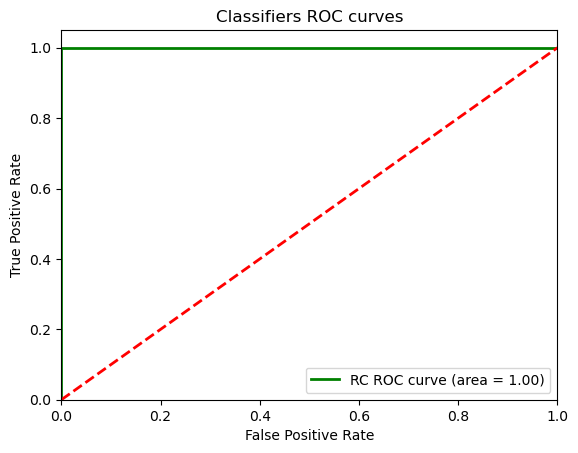

In [67]:
from sklearn.metrics import roc_curve,auc

fpr2, tpr2, threshold2 = roc_curve(y_test, dtc.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

plt.figure()

plt.plot(fpr2, tpr2, color='green', lw=2, label='RC ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

In [68]:
# # hyperparameter tuning of decision tree
#
#
# grid_param = {
#     'criterion' : ['gini', 'entropy'],
#     'max_depth' : [2,5,8,10,20],
#     'splitter' : ['best', 'random'],
#     'min_samples_leaf' : [5,10,20,50,100],
#     'min_samples_split' : [1, 2, 3, 5, 7],
#      'max_features' : ['auto', 'sqrt', 'log2']
# }
#
# grid_search_dtc = GridSearchCV(dtc, grid_param, cv = 10, n_jobs = -1, verbose = 1)
# grid_search_dtc.fit(X_train, y_train)

In [69]:
# # best parameters and best score
# print(grid_search_dtc.best_params_)
# print(grid_search_dtc.best_score_)

In [70]:
#  best estimator
#
# dtc = grid_search_dtc.best_estimator_
#
# # accuracy score, confusion matrix and classification report of decision tree
# # Cross validation score
# scores = cross_val_score(dtc, X_train, y_train, cv = 10, scoring='accuracy')
# print('Cross-validation scores:{}'.format(scores))
# print('Average cross-validation score: {}'.format(scores.mean()))
# dtc_acc2 = accuracy_score(y_test, dtc.predict(X_test))
#
# print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
# print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc2} \n")
#
# print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
# print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

In [71]:
from sklearn import tree


def get_dt_graph(dt_classifier):
    fig = plt.figure(figsize=(25,20))
    _ = tree.plot_tree(dt_classifier,
                       feature_names=X.columns,
                       class_names=[' Disease', " No Disease"],
                       filled=True)


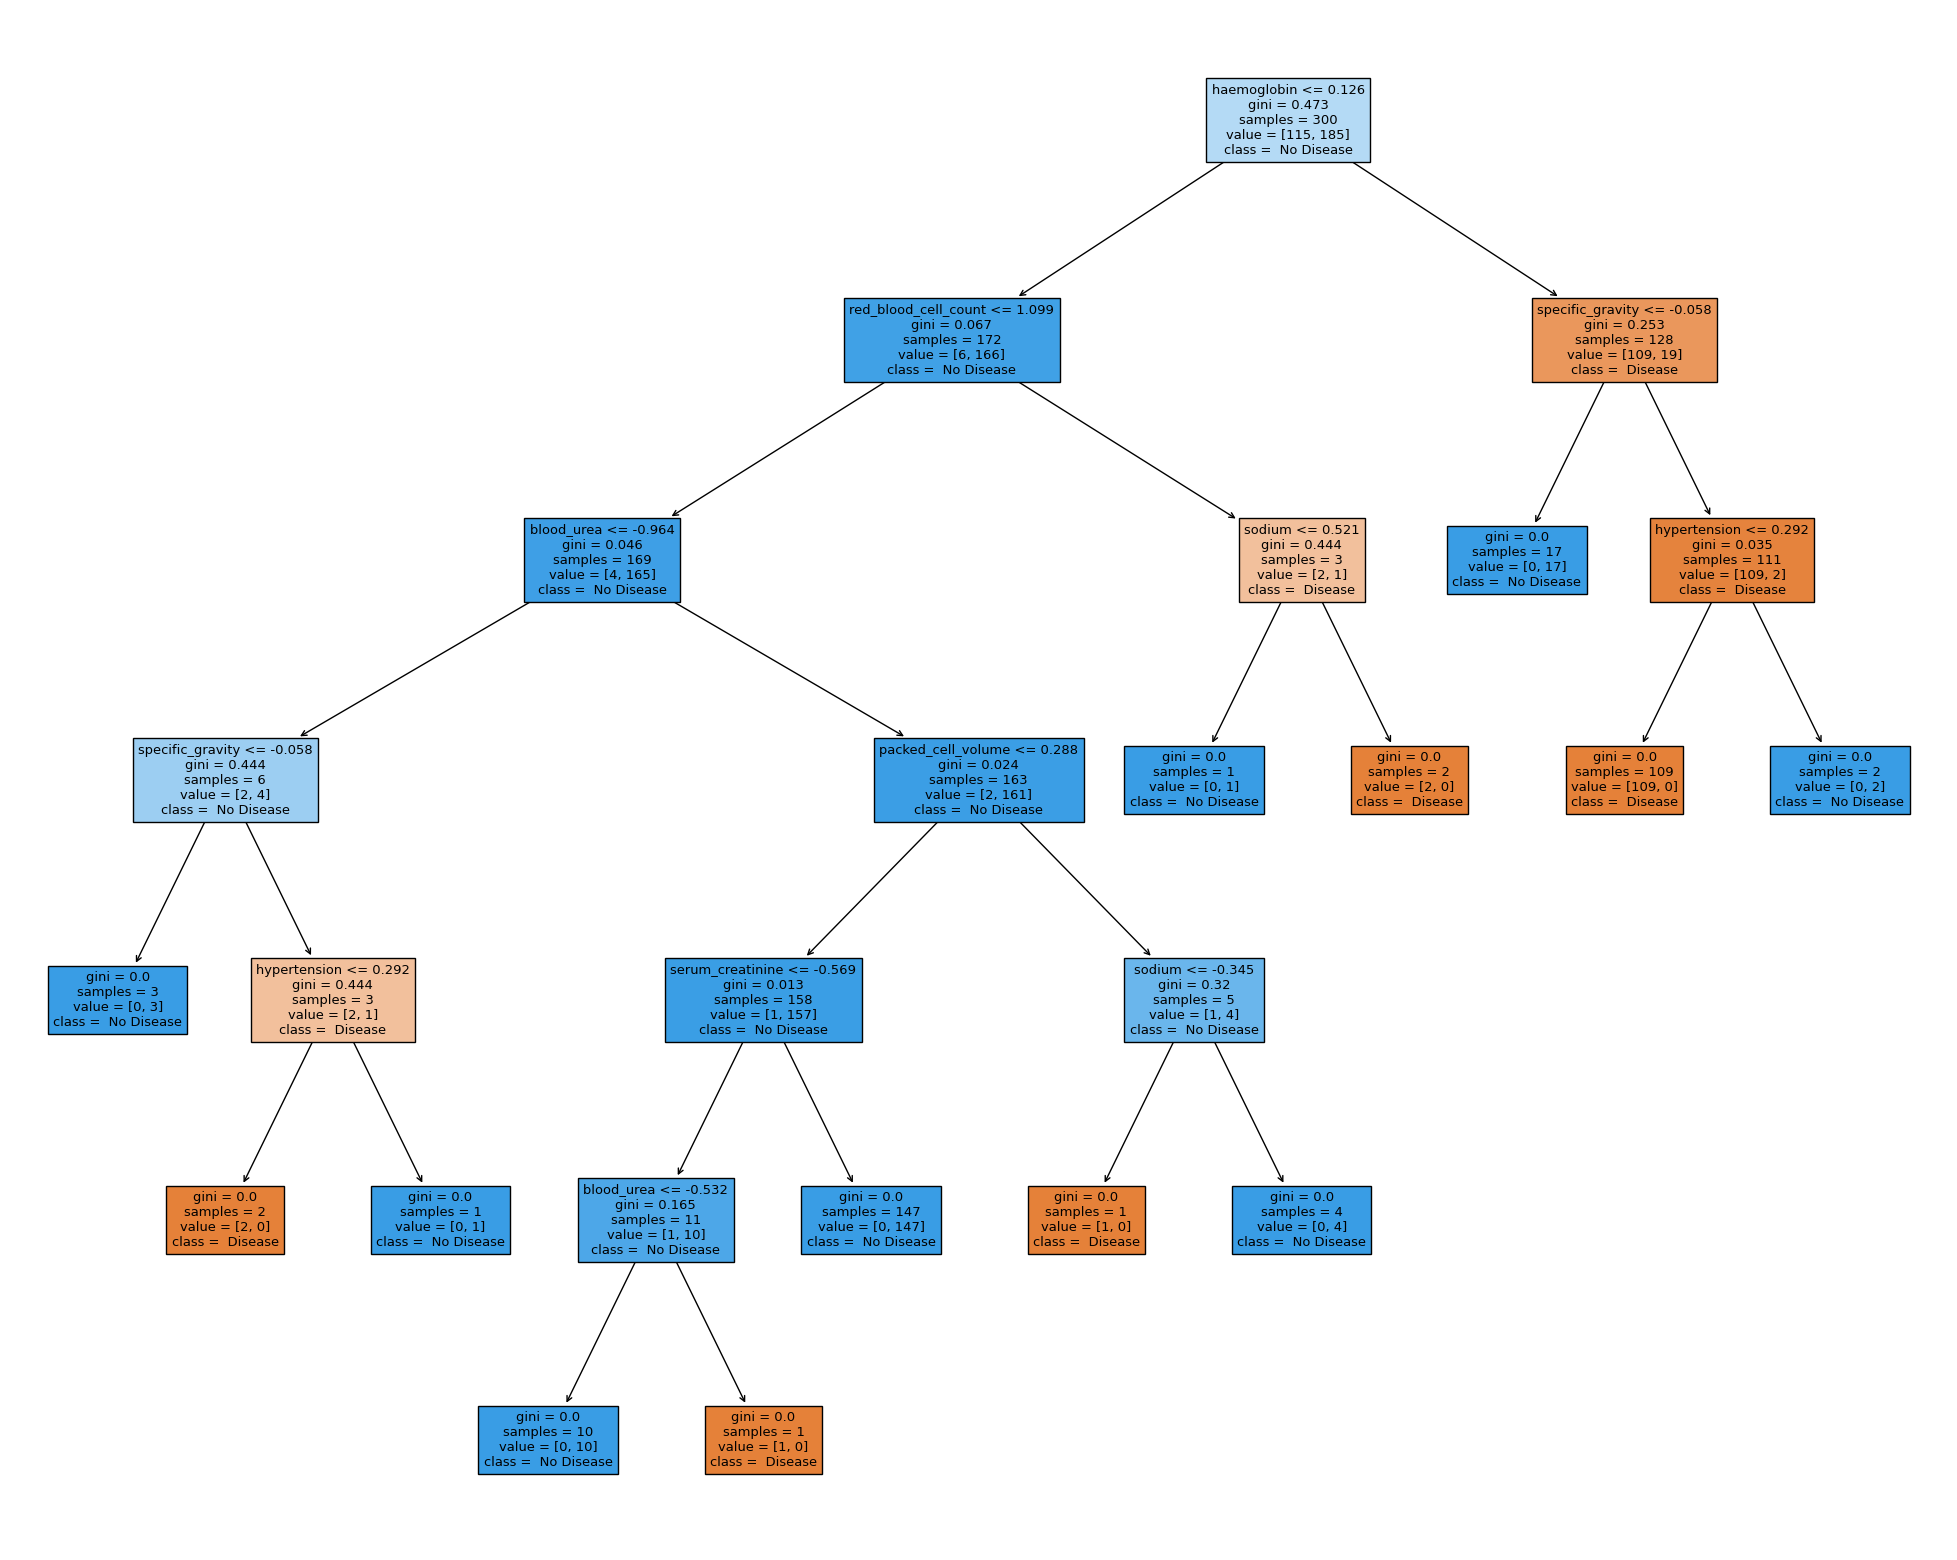

In [72]:
get_dt_graph(dtc)

####  8.4.1 Most important features according to the decision tree alogrithm

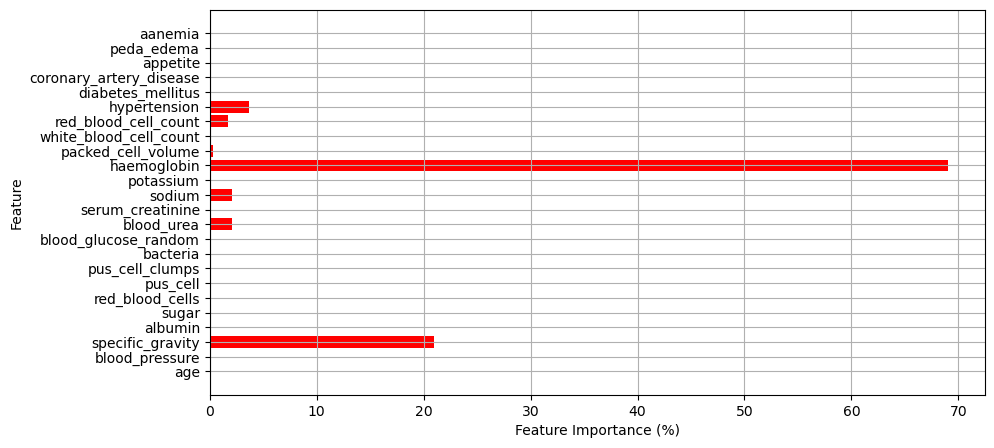

In [73]:
plt.figure(figsize=(10,5))
plt.barh(df3.drop(['class'],axis=1).columns.values,dtc.feature_importances_*100,align='center', color='red')
plt.xlabel("Feature Importance (%)")
plt.ylabel("Feature")
plt.grid(True)
plt.show()

### 8.5 SVC Algorithm

In [74]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [75]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
svm_acc = accuracy_score(y_test, y_pred)
scores = cross_val_score(rc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(f"Test SVM Classifier is {svm_acc} \n")
print(f"Classification Report :- \n {classification_report(y_test, classifier.predict(X_test))}")

[[35  0]
 [ 0 65]]
Cross-validation scores:[0.96666667 1.         1.         1.         1.         1.
 1.         1.         0.93333333 1.        ]
Average cross-validation score: 0.99
Test SVM Classifier is 1.0 

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        35
           1       1.00      1.00      1.00        65

    accuracy                           1.00       100
   macro avg       1.00      1.00      1.00       100
weighted avg       1.00      1.00      1.00       100



In [76]:

from sklearn.model_selection import GridSearchCV

# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf','linear']}

grid = GridSearchCV(SVC(), param_grid, refit = True, verbose = 3)

# fitting the model for grid search
grid.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 3/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 4/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 5/5] END ..................C=0.1, gamma=1, kernel=linear; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [77]:
# print best parameter after tuning
print(grid.best_params_)

# print how our model looks after hyper-parameter tuning
print(grid.best_estimator_)
svc = grid.best_estimator_


{'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
SVC(C=0.1, gamma=0.1)


In [78]:
grid_predictions = grid.predict(X_test)
print(accuracy_score(y_test,grid_predictions))
# print classification report
print(classification_report(y_test, grid_predictions))


0.99
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



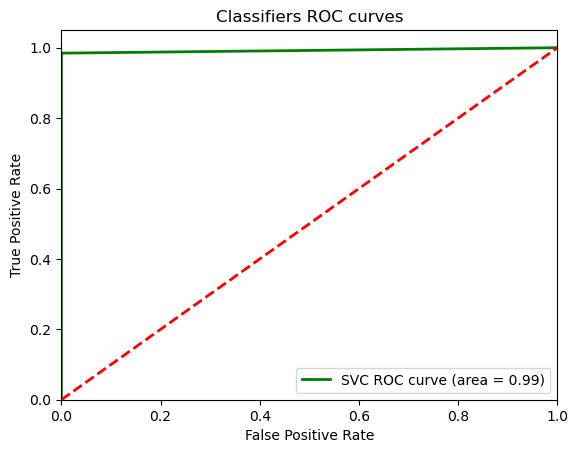

In [79]:
from sklearn.metrics import roc_curve,auc

fpr2, tpr2, threshold2 = roc_curve(y_test, svc.predict(X_test))
roc_auc2 = auc(fpr2, tpr2)

plt.figure()

plt.plot(fpr2, tpr2, color='green', lw=2, label='SVC ROC curve (area = %0.2f)'% roc_auc2)

plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Classifiers ROC curves')
plt.legend(loc = "lower right")
plt.show()

## Naive bayes

In [80]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB

# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
# accuracy score, confusion matrix and classification report of decision tree
nb_acc = accuracy_score(y_test, y_pred)

print(f"Training Accuracy of Naive bayes is {accuracy_score(y_test, y_pred)}")
print(f"Test Accuracy of Naive bayes is {nb_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, y_pred)}\n")
print(f"Classification Report :- \n {classification_report(y_test, y_pred )}")


Training Accuracy of Naive bayes is 0.98
Test Accuracy of Naive bayes is 0.98 

Confusion Matrix :- 
[[35  0]
 [ 2 63]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



### 8.6 Models Comparison

In [81]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier', 'SVM','Naive Byes'],
    'Score' : [knn_acc, dtc_acc, rc_acc,svm_acc,nb_acc]
})
models.sort_values(by = 'Score', ascending = False)

Model  Score
1  Decision Tree Classifier   1.00
2  Random Forest Classifier   1.00
3                       SVM   1.00
0                       KNN   0.98
4                Naive Byes   0.98

##  9. Recursive feature engineering

##### another approach that we could've made is using the recursive feature engineering method to select the most important features and then train our models on those features

In [82]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV
#create a random forest model
rf = RandomForestClassifier(random_state=42)
# # Recursively eliminate features with cross validation
rfecv = RFECV(estimator=rf, cv=5, scoring='accuracy')
rfecv.fit(X, y)
#rfecv.transform(X)

print("Num Features Before:", X.shape[1])
print(f" optimum number of features is {rfecv.n_features_}")
print(f"index of the best features {np.where(rfecv.support_==True)[0]}")
df4 = df3.iloc[:, np.where(rfecv.support_==True)[0]]
df4

Num Features Before: 24
 optimum number of features is 7
index of the best features [ 2  3 11 14 15 17 18]


specific_gravity  albumin  serum_creatinine  haemoglobin  \
0               1.020      1.0               1.2         15.4   
1               1.020      4.0               0.8         11.3   
2               1.010      2.0               1.8          9.6   
3               1.005      4.0               3.8         11.2   
4               1.010      2.0               1.4         11.6   
..                ...      ...               ...          ...   
395             1.020      0.0               0.5         15.7   
396             1.025      0.0               1.2         16.5   
397             1.020      0.0               0.6         15.8   
398             1.025      0.0               1.0         14.2   
399             1.025      0.0               1.1         15.8   

     packed_cell_volume  red_blood_cell_count  hypertension  
0                  44.0              5.200000             1  
1                  38.0              4.707435             0  
2                  31.0              4.707435             0  
3                  32.0              3.900000             1  
4                  35.0              4.600000             0  
..                  ...                   ...           ...  
395                47.0              4.900000             0  
396                52.0              6.105000             0  
397                49.0              5.400000             0  
398                51.0              5.900000             0  
399                52.0              6.100000             0  

[400 rows x 7 columns]

Optimal number of features : 7


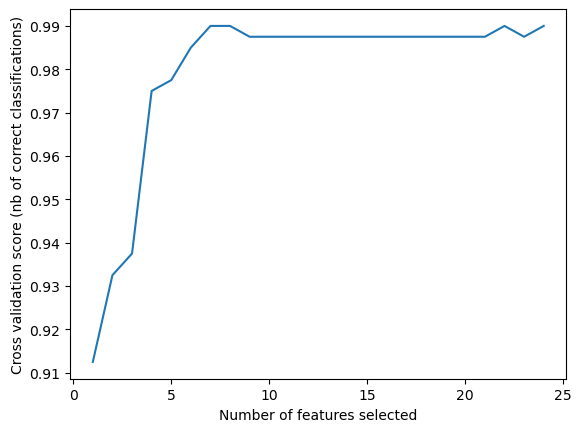

[ 8  7  1  1  6 14 13 16 17  2  4  1  5  9  1  1 12  1  1  3 18 11 10 15]


In [83]:

print("Optimal number of features : %d" % rfecv.n_features_)

# Plotting number of features and cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()
print(rfecv.ranking_)

### 9.1 Modeling with the chosen features

In [84]:
X_train, X_test, y_train, y_test = train_test_split(df4, y, test_size = 0.25, random_state = 42)

## Decision tree + rfe

In [85]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# Cross validation score
scores = cross_val_score(dtc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))

# accuracy score, confusion matrix and classification report of decision tree
dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")
print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Cross-validation scores:[0.96666667 1.         0.96666667 1.         0.96666667 0.9
 1.         1.         0.9        1.        ]
Average cross-validation score: 0.9700000000000001
Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 0.99 

Confusion Matrix :- 
[[35  0]
 [ 1 64]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## Descision tree + RFE + adaboost

In [86]:
#Fit, predict
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

dt1=DecisionTreeClassifier()
# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=dt1, n_estimators=50, learning_rate=1, random_state=0,algorithm = 'SAMME')
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)
dt_adb_acc= accuracy_score(y_test, y_pred)
# calculate and print model accuracy
print("AdaBoost Classifier with Decision Tree Model Accuracy:", accuracy_score(y_test, y_pred))

AdaBoost Classifier with Decision Tree Model Accuracy: 1.0


## RFE + SVM

In [87]:
#SVC
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [88]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(f"Test accuracy with svc {accuracy_score(y_test, y_pred)}")
svm_rfe_acc=accuracy_score(y_test, y_pred)
scores = cross_val_score(rc, X_train, y_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(f"Classification Report :- \n {classification_report(y_test, classifier.predict(X_test))}")

[[35  0]
 [ 1 64]]
Test accuracy with svc 0.99
Cross-validation scores:[0.96666667 1.         1.         1.         1.         1.
 1.         1.         0.93333333 1.        ]
Average cross-validation score: 0.99
Classification Report :- 
               precision    recall  f1-score   support

           0       0.97      1.00      0.99        35
           1       1.00      0.98      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



## SVM + RFE + Adaboost

In [89]:
#Fit, predict
# Import the AdaBoost classifier
from sklearn.ensemble import AdaBoostClassifier

svc1=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=svc1, n_estimators=50, learning_rate=1, random_state=0,algorithm = 'SAMME')
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)
svm_adb_acc= accuracy_score(y_test, y_pred)
# calculate and print model accuracy
print("AdaBoost Classifier with SVM Model Accuracy:", accuracy_score(y_test, y_pred))
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")

AdaBoost Classifier with SVM Model Accuracy: 0.97
Classification Report :- 
               precision    recall  f1-score   support

           0       0.94      0.97      0.96        35
           1       0.98      0.97      0.98        65

    accuracy                           0.97       100
   macro avg       0.96      0.97      0.97       100
weighted avg       0.97      0.97      0.97       100



## Naive bayes +RFE 

In [90]:
# train a Gaussian Naive Bayes classifier on the training set
from sklearn.naive_bayes import GaussianNB
# instantiate the model
gnb = GaussianNB()
# fit the model
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
nb_rfe_acc=accuracy_score(y_test, y_pred)
print('Gaussian Naive Bayes  Model accuracy score: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")



Gaussian Naive Bayes  Model accuracy score: 0.9500
Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.92      0.96        65

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



## Naive bayes +RFE + Adaboost

In [91]:
#Adaboost+NB
# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=gnb, n_estimators=50, learning_rate=1, random_state=0,algorithm = 'SAMME')
# Train Adaboost Classifer
model1 = abc.fit(X_train, y_train)
#Predict the response for test dataset
y_pred = model1.predict(X_test)
nb_adb_acc=accuracy_score(y_test, y_pred)
# calculate and print model accuracy
print("AdaBoost Classifier with Model NB Accuracy:", accuracy_score(y_test, y_pred))
print(f"Classification Report :- \n {classification_report(y_test, y_pred)}")


AdaBoost Classifier with Model NB Accuracy: 0.95
Classification Report :- 
               precision    recall  f1-score   support

           0       0.88      1.00      0.93        35
           1       1.00      0.92      0.96        65

    accuracy                           0.95       100
   macro avg       0.94      0.96      0.95       100
weighted avg       0.96      0.95      0.95       100



## KNN


In [92]:
#Dictionnary of  Hyperparameters that we want to tune.
grid_params = { 'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan'],
                'leaf_size': [1,5,8,10,15],
                'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                'p':[1,2]}
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, grid_params, cv=10,n_jobs=-1,verbose=1)
#Fit the model
best_model = clf.fit(X_train,y_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Best leaf_size: 1
Best p: 1
Best n_neighbors: 3


In [93]:
# best estimator

knn_best = clf.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

knn_acc = accuracy_score(y_test, knn_best.predict(X_test))
print(f"Training Accuracy of knn is {accuracy_score(y_train, knn_best.predict(X_train))}")
print(f"Test Accuracy of knn  is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn_best.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn_best.predict(X_test))}")



Training Accuracy of knn is 0.9666666666666667
Test Accuracy of knn  is 0.98 

Confusion Matrix :- 
[[35  0]
 [ 2 63]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        35
           1       1.00      0.97      0.98        65

    accuracy                           0.98       100
   macro avg       0.97      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100



## Comparaison

In [94]:
models = pd.DataFrame({
    'Model' : [  'Decision Tree Classifier', 'SVM','Naive Byes','KNN'],
    'RFE Score' : [dtc_acc,svm_rfe_acc,nb_rfe_acc,knn_acc],
    'RFE+Adaboost Score' : [dt_adb_acc,svm_adb_acc,nb_adb_acc,0]
    
})
models.sort_values(by = 'RFE Score', ascending = False)

Model  RFE Score  RFE+Adaboost Score
0  Decision Tree Classifier       0.99                1.00
1                       SVM       0.99                0.97
3                       KNN       0.98                0.00
2                Naive Byes       0.95                0.95

In [95]:
data = {"predicted_value" : y_pred,"Original":y_test}
df_compare = pd.DataFrame(data)
df_compare

predicted_value  Original
209                0         1
280                0         0
33                 1         1
210                1         1
93                 1         1
..               ...       ...
314                0         0
373                0         0
380                0         0
239                1         1
75                 1         1

[100 rows x 2 columns]

# Feature selection  with CFS

In [96]:
dfc1=df3.copy()


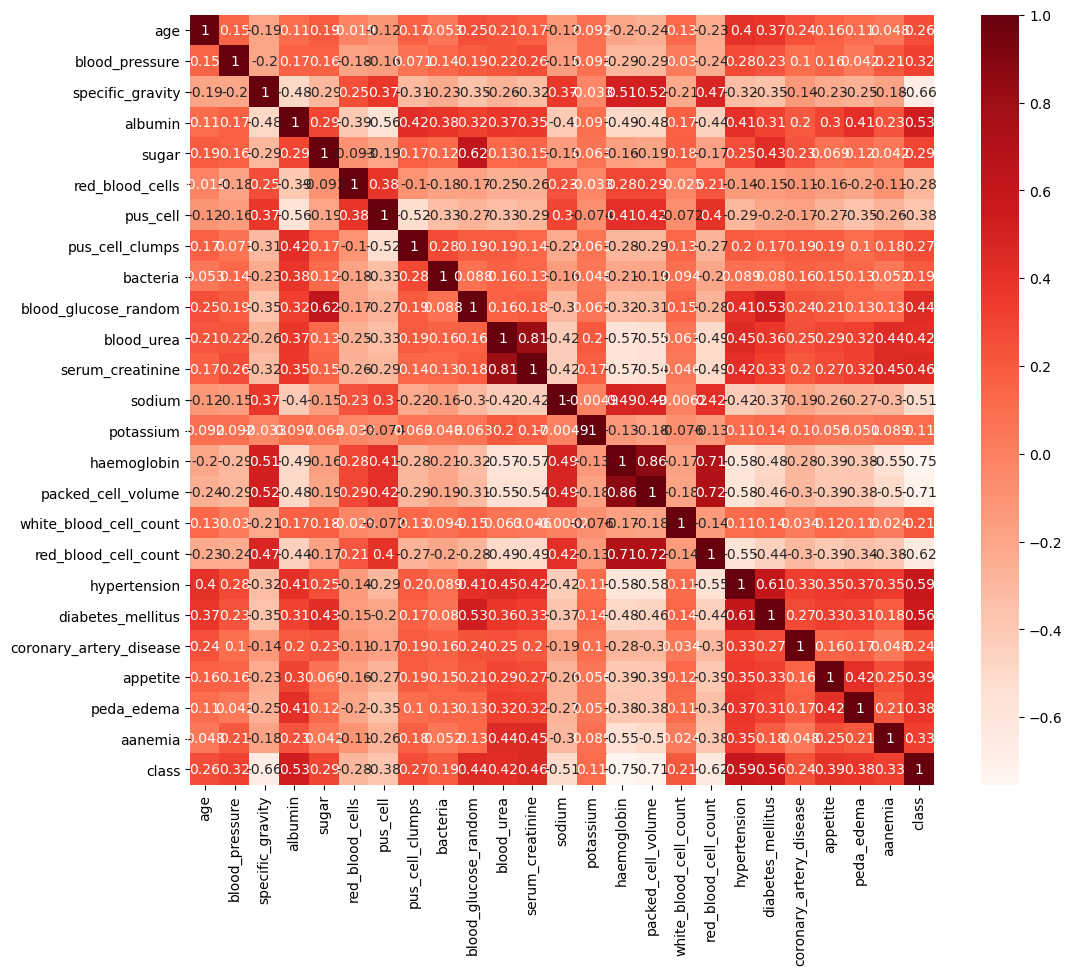

In [97]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dfc1.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [98]:
#Correlation with output variable
cor_target = abs(cor["class"])
#Selecting highly correlated features
relevant_features = cor_target[cor_target>0.5]
relevant_features

specific_gravity        0.659504
albumin                 0.531562
sodium                  0.510439
haemoglobin             0.753794
packed_cell_volume      0.713170
red_blood_cell_count    0.624580
hypertension            0.590438
diabetes_mellitus       0.559060
class                   1.000000
Name: class, dtype: float64

In [99]:
dfc2=dfc1[['specific_gravity','albumin','sodium','haemoglobin','packed_cell_volume','red_blood_cell_count','hypertension','diabetes_mellitus','class']]


In [100]:
#CFS
dfc=df3.copy()

In [101]:
#print highly correlated variables
corr_features =[]

for i , r in dfc.corr().iterrows():
    k=0
    for j in range(len(r)):
        if i!= r.index[k]:
            if r.values[k] >=0.8:
                corr_features.append([i, r.index[k], r.values[k]])
        k += 1
corr_features

[['blood_urea', 'serum_creatinine', 0.805382841419902],
 ['serum_creatinine', 'blood_urea', 0.805382841419902],
 ['haemoglobin', 'packed_cell_volume', 0.8590543975092106],
 ['packed_cell_volume', 'haemoglobin', 0.8590543975092106]]

In [102]:
#highly correlated features that is above 0.8
feat =[]
for i in corr_features:
    if i[2] >= 0.8:
        feat.append(i[0])
        feat.append(i[1])
print(feat)        
print(list(set(feat)))       

['blood_urea', 'serum_creatinine', 'serum_creatinine', 'blood_urea', 'haemoglobin', 'packed_cell_volume', 'packed_cell_volume', 'haemoglobin']
['serum_creatinine', 'packed_cell_volume', 'blood_urea', 'haemoglobin']


In [103]:
dfc.drop(['blood_urea'], axis=1, inplace=True)
dfc.drop(['packed_cell_volume'], axis=1, inplace=True)


## Modeling with CFS

In [104]:
#Splitting the independent features from the dependant feature
Xfc = dfc2.drop(['class'],axis=1)
yfc = dfc2['class']

In [105]:
Xfc_train, Xfc_test, yfc_train, yfc_test = train_test_split(Xfc, yfc, test_size = 0.25, random_state = 42)

In [106]:
#SVC + CFS 
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(Xfc_train, yfc_train)
yy_pred = classifier.predict(Xfc_test)
cm = confusion_matrix(yfc_test, yy_pred)
print(cm)
print(f"Test accuracy with svc {accuracy_score(yfc_test, yy_pred)}")
scores = cross_val_score(classifier, Xfc_train, yfc_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(f"Classification Report :- \n {classification_report(yfc_test, classifier.predict(Xfc_test))}")
svm_acc=accuracy_score(yfc_test, yy_pred)


[[34  1]
 [ 0 65]]
Test accuracy with svc 0.99
Cross-validation scores:[1.         1.         0.93333333 1.         0.96666667 0.93333333
 1.         0.96666667 0.93333333 0.93333333]
Average cross-validation score: 0.9666666666666668
Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99        35
           1       0.98      1.00      0.99        65

    accuracy                           0.99       100
   macro avg       0.99      0.99      0.99       100
weighted avg       0.99      0.99      0.99       100



In [107]:
#NB + CFS
# instantiate the model
gnb1 = GaussianNB()
# fit the model
gnb1.fit(Xfc_train, yfc_train)
ypr = gnb1.predict(Xfc_test)
print(f"Test accuracy with NB {accuracy_score(yfc_test, ypr)}")
scores = cross_val_score(gnb1, Xfc_train, yfc_train, cv = 10, scoring='accuracy')
print('Cross-validation scores:{}'.format(scores))
print('Average cross-validation score: {}'.format(scores.mean()))
print(f"Classification Report :- \n {classification_report(yfc_test, gnb1.predict(Xfc_test))}")
nb_acc=accuracy_score(yfc_test, ypr)

Test accuracy with NB 0.96
Cross-validation scores:[0.9        0.86666667 0.9        0.9        0.93333333 0.96666667
 1.         0.9        0.9        0.93333333]
Average cross-validation score: 0.9199999999999999
Classification Report :- 
               precision    recall  f1-score   support

           0       0.90      1.00      0.95        35
           1       1.00      0.94      0.97        65

    accuracy                           0.96       100
   macro avg       0.95      0.97      0.96       100
weighted avg       0.96      0.96      0.96       100



In [108]:
#svm +cfs
cfs1 = SVC(kernel = 'linear', random_state = 0)
cfs1.fit(Xfc_train, yfc_train)
y_predfc = cfs1.predict(Xfc_test)
print('Model svm+cfs accuracy score: {0:0.4f}'. format(accuracy_score(yfc_test, y_predfc)))

Model svm+cfs accuracy score: 0.9900


In [109]:
#Adaboost+NB+CFS
# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=gnb, n_estimators=50, learning_rate=1, random_state=0,algorithm = 'SAMME')
# Train Adaboost Classifer
model11 = abc.fit(Xfc_train, yfc_train)
#Predict the response for test dataset
y_pred11 = model11.predict(Xfc_test)
ada_nb=accuracy_score(yfc_test, y_pred11)

In [110]:
# calculate and print model accuracy
print("AdaBoost Classifier Model NB+cfs Accuracy:", accuracy_score(yfc_test, y_pred11))

AdaBoost Classifier Model NB+cfs Accuracy: 0.96


In [111]:
svc1=SVC(probability=True, kernel='linear')
# Create adaboost classifer object
abc = AdaBoostClassifier(base_estimator=svc1, n_estimators=50, learning_rate=1, random_state=0,algorithm = 'SAMME')
# Train Adaboost Classifer
model1 = abc.fit(Xfc_train, yfc_train)
#Predict the response for test dataset
y_preds = model1.predict(Xfc_test)
ada_svm= accuracy_score(yfc_test, y_preds)

In [112]:
print("AdaBoost Classifier Model SVM+cfs Accuracy:", accuracy_score(yfc_test, y_preds))

AdaBoost Classifier Model SVM+cfs Accuracy: 0.95


In [113]:
#Dictionnary of  Hyperparameters that we want to tune.
grid_params = { 'weights' : ['uniform','distance'],
                'metric' : ['minkowski','euclidean','manhattan'],
                'leaf_size': [1,5,8,10,15],
                'n_neighbors':[1,2,3,4,5,6,7,8,9,10],
                'p':[1,2]}
#Create new KNN object
knn_2 = KNeighborsClassifier()
#Use GridSearch
clf = GridSearchCV(knn_2, grid_params, cv=10,n_jobs=-1,verbose=1)
#Fit the model
best_model = clf.fit(Xfc_train,yfc_train)
#Print The value of best Hyperparameters
print('Best leaf_size:', best_model.best_estimator_.get_params()['leaf_size'])
print('Best p:', best_model.best_estimator_.get_params()['p'])
print('Best n_neighbors:', best_model.best_estimator_.get_params()['n_neighbors'])


Fitting 10 folds for each of 600 candidates, totalling 6000 fits
Best leaf_size: 1
Best p: 1
Best n_neighbors: 7


In [114]:
# best estimator

knn_best = clf.best_estimator_

# accuracy score, confusion matrix and classification report of decision tree

knn_acc = accuracy_score(yfc_test, knn_best.predict(Xfc_test))
print(f"Training Accuracy of knn is {accuracy_score(yfc_train, knn_best.predict(Xfc_train))}")
print(f"Test Accuracy of knn  is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(yfc_test, knn_best.predict(Xfc_test))}\n")
print(f"Classification Report :- \n {classification_report(yfc_test, knn_best.predict(Xfc_test))}")


Training Accuracy of knn is 0.9666666666666667
Test Accuracy of knn  is 0.97 

Confusion Matrix :- 
[[35  0]
 [ 3 62]]

Classification Report :- 
               precision    recall  f1-score   support

           0       0.92      1.00      0.96        35
           1       1.00      0.95      0.98        65

    accuracy                           0.97       100
   macro avg       0.96      0.98      0.97       100
weighted avg       0.97      0.97      0.97       100



## Comparaison

In [115]:
models = pd.DataFrame({
    'Model' : [' SVM', '  Naive Byes','KNN'],
    'CFS Score' : [svm_acc,nb_acc,knn_acc],
    'CFS + Adaboost Score' : [ada_svm,ada_nb,0]
})
models.sort_values(by = 'CFS Score', ascending = False)

Model  CFS Score  CFS + Adaboost Score
0           SVM       0.99                  0.95
2           KNN       0.97                  0.00
1    Naive Byes       0.96                  0.96

In [116]:
from sklearn.datasets import make_classification
from matplotlib import pyplot

>1, train: 0.911, test: 0.942
>2, train: 0.975, test: 0.992
>3, train: 0.989, test: 0.992
>4, train: 0.989, test: 0.992
>5, train: 0.993, test: 0.958
>6, train: 0.996, test: 0.975
>7, train: 0.996, test: 0.975
>8, train: 1.000, test: 0.958
>9, train: 1.000, test: 0.958
>10, train: 1.000, test: 0.958
>11, train: 1.000, test: 0.958
>12, train: 1.000, test: 0.958
>13, train: 1.000, test: 0.958
>14, train: 1.000, test: 0.958
>15, train: 1.000, test: 0.958
>16, train: 1.000, test: 0.958
>17, train: 1.000, test: 0.958
>18, train: 1.000, test: 0.958
>19, train: 1.000, test: 0.958
>20, train: 1.000, test: 0.958


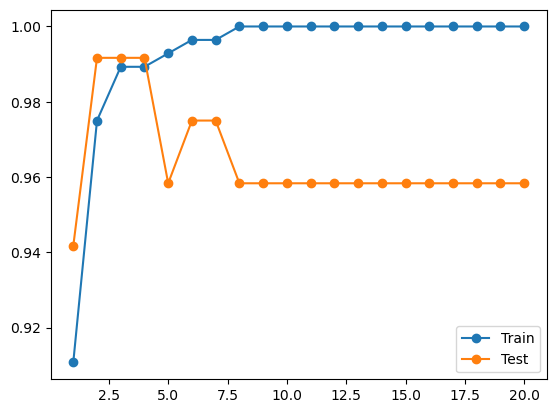

In [117]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(Xfc, yfc, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 21)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = DecisionTreeClassifier(max_depth=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
# evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs tree depth
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

>1, train: 1.000, test: 0.917
>2, train: 0.950, test: 0.933
>3, train: 0.968, test: 0.958
>4, train: 0.961, test: 0.967
>5, train: 0.957, test: 0.942
>6, train: 0.957, test: 0.958
>7, train: 0.961, test: 0.950
>8, train: 0.957, test: 0.942
>9, train: 0.961, test: 0.933
>10, train: 0.964, test: 0.933
>11, train: 0.957, test: 0.942
>12, train: 0.957, test: 0.942
>13, train: 0.950, test: 0.950
>14, train: 0.950, test: 0.942
>15, train: 0.950, test: 0.942
>16, train: 0.950, test: 0.942
>17, train: 0.946, test: 0.942
>18, train: 0.946, test: 0.942
>19, train: 0.939, test: 0.942
>20, train: 0.943, test: 0.942
>21, train: 0.939, test: 0.942
>22, train: 0.936, test: 0.942
>23, train: 0.936, test: 0.933
>24, train: 0.932, test: 0.933
>25, train: 0.936, test: 0.933
>26, train: 0.932, test: 0.933
>27, train: 0.932, test: 0.925
>28, train: 0.932, test: 0.925
>29, train: 0.932, test: 0.917
>30, train: 0.932, test: 0.917
>31, train: 0.932, test: 0.900
>32, train: 0.932, test: 0.908
>33, train: 0.932

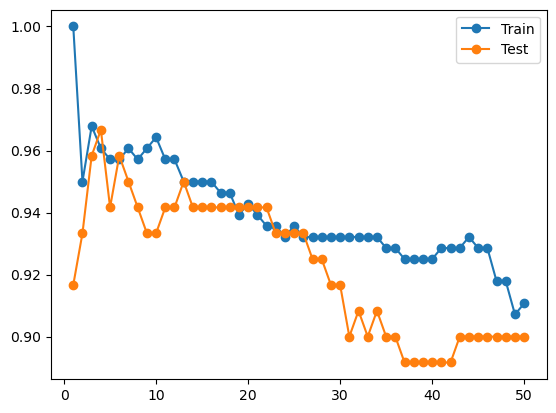

In [118]:

# split into train test sets
X_train, X_test, y_train, y_test = train_test_split(Xfc, yfc, test_size=0.3)
# define lists to collect scores
train_scores, test_scores = list(), list()
# define the tree depths to evaluate
values = [i for i in range(1, 51)]
# evaluate a decision tree for each depth
for i in values:
 # configure the model
 model = KNeighborsClassifier(n_neighbors=i)
 # fit model on the training dataset
 model.fit(X_train, y_train)
 # evaluate on the train dataset
 train_yhat = model.predict(X_train)
 train_acc = accuracy_score(y_train, train_yhat)
 train_scores.append(train_acc)
 # evaluate on the test dataset
 test_yhat = model.predict(X_test)
 test_acc = accuracy_score(y_test, test_yhat)
 test_scores.append(test_acc)
 # summarize progress
 print('>%d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
# plot of train and test scores vs number of neighbors
pyplot.plot(values, train_scores, '-o', label='Train')
pyplot.plot(values, test_scores, '-o', label='Test')
pyplot.legend()
pyplot.show()

In [119]:
clf_svm = SVC(kernel='linear', random_state = 0)
clf_svm.fit(X_train, y_train)
y_pred_svc_1 = clf_svm.predict(X_test)

svm_acc1 = accuracy_score(y_test, y_pred_svc_1)

print(classification_report(y_test, y_pred_svc_1))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        51
           1       0.97      0.99      0.98        69

    accuracy                           0.97       120
   macro avg       0.98      0.97      0.97       120
weighted avg       0.98      0.97      0.97       120



In [120]:
svm = SVC(kernel="poly")
svm.fit(X_train, y_train)
y_pred_svc_3 = svm.predict(X_test)
svm_acc3 = accuracy_score(y_test, y_pred_svc_3)
print(classification_report(y_test, y_pred_svc_3))


              precision    recall  f1-score   support

           0       0.95      0.75      0.84        51
           1       0.84      0.97      0.90        69

    accuracy                           0.88       120
   macro avg       0.89      0.86      0.87       120
weighted avg       0.89      0.88      0.87       120



In [121]:
svm = SVC(kernel="sigmoid")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_4 = svm.predict(X_test)
svm_acc4 = accuracy_score(y_test, y_pred_svc_4)

print(classification_report(y_pred_svc_4, y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.57      0.73       120

    accuracy                           0.57       120
   macro avg       0.50      0.29      0.37       120
weighted avg       1.00      0.57      0.73       120



In [122]:
svm = SVC(kernel="rbf")
svm.fit(X_train, y_train)
from sklearn.metrics import classification_report
y_pred_svc_2 = svm.predict(X_test)
svm_acc2 = accuracy_score(y_test, y_pred_svc_2)

print(classification_report(y_pred_svc_2, y_test))

              precision    recall  f1-score   support

           0       0.65      0.97      0.78        34
           1       0.99      0.79      0.88        86

    accuracy                           0.84       120
   macro avg       0.82      0.88      0.83       120
weighted avg       0.89      0.84      0.85       120



In [123]:
s1=accuracy_score(y_test, y_pred_svc_1)
s2=accuracy_score(y_test, y_pred_svc_2)
s3=accuracy_score(y_test, y_pred_svc_3)
s4=accuracy_score(y_test, y_pred_svc_4)

models = pd.DataFrame({
    'Model': ['Support Vector Machines Linear', 'Support Vector Machines RBF','Support Vector Machines polynomial',
              'Support Vector Machines sigmoïd'],
    'Score': [svm_acc1,svm_acc2, svm_acc3, svm_acc4]})
models.sort_values(by="Score",ascending=False)

Model     Score
0      Support Vector Machines Linear  0.975000
2  Support Vector Machines polynomial  0.875000
1         Support Vector Machines RBF  0.841667
3     Support Vector Machines sigmoïd  0.575000

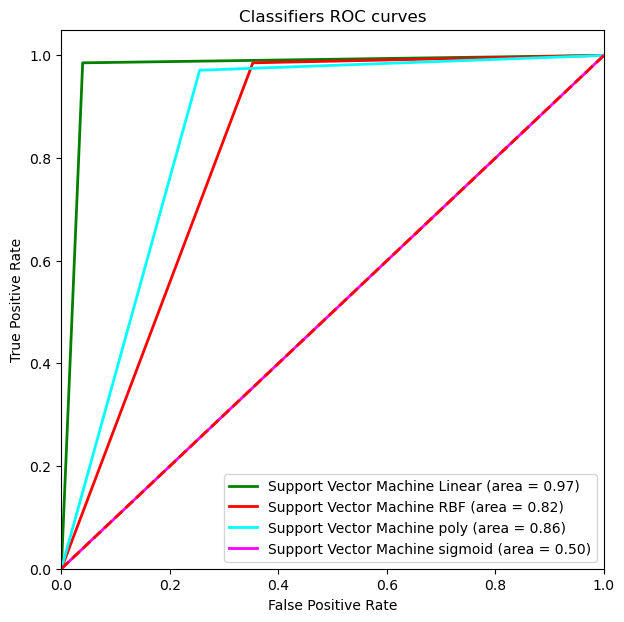

In [124]:
fpr1, tpr1, threshold1 = roc_curve(y_test, y_pred_svc_1) 
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, threshold2 = roc_curve(y_test, y_pred_svc_2) 
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, threshold3 = roc_curve(y_test, y_pred_svc_3)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, threshold4 = roc_curve(y_test, y_pred_svc_4) 
roc_auc4 = auc(fpr4, tpr4)
plt.figure(figsize=(7,7)) 
plt.plot(fpr1, tpr1, color='green', lw=2, label='Support Vector Machine Linear (area = %0.2f)'% roc_auc1)
plt.plot(fpr2, tpr2, color='red', lw=2, label='Support Vector Machine RBF (area = %0.2f)'% roc_auc2)
plt.plot(fpr3, tpr3, color='cyan', lw=2, label='Support Vector Machine poly (area = %0.2f)'% roc_auc3)
plt.plot(fpr4, tpr4, color='magenta', lw=2, label='Support Vector Machine sigmoid (area = %0.2f)'% roc_auc4)
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--') 
plt.xlim([0.0, 1.0]) 
plt.ylim([0.0, 1.05]) 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('Classifiers ROC curves') 
plt.legend(loc = "lower right")
plt.show()